<a href="https://colab.research.google.com/github/younghoonNa/SQL/blob/main/Data_visualization/4_using_dplyr__(2018%EB%85%84%EB%8F%84_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%A3%BC%EC%9A%94_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%ED%86%B5%EA%B3%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 이 부분 설정은 lab 5 참고할 것
install.packages("extrafont")
library(extrafont)
system("sudo apt-get install fonts-nanum-coding")
font_import(pattern = "Nanum")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
Warning message in system2(ttf2pt1, c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf' '/tmp/Rtmp62x7A9/fonts/NanumGothicCoding-Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
Warning message in system2(ttf2pt1, c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf' '/tmp/Rtmp62x7A9/fonts/NanumGothicCoding' 2>&1' had status 139”
 : No FontName. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /usr/local/lib/R/site-library/extrafontdb/metrics



In [5]:
install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
 car <- read.csv('/content/sample_data/car.csv',fileEncoding = 'cp949')

In [7]:
head(car)

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울,종로구,01월,103,0,133,23,90,20
2,서울,종로구,02월,84,1,111,20,77,14
3,서울,종로구,03월,101,0,149,34,91,24
4,서울,종로구,04월,93,0,114,27,78,9
5,서울,종로구,05월,102,1,143,24,96,23
6,서울,종로구,06월,96,1,123,32,84,7


In [8]:
tail(car)

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
2740,세종,세종,07월,62,0,85,24,59,2
2741,세종,세종,08월,52,1,85,26,58,1
2742,세종,세종,09월,50,4,61,14,46,1
2743,세종,세종,10월,65,0,90,22,66,2
2744,세종,세종,11월,65,0,91,17,71,3
2745,세종,세종,12월,57,0,83,13,69,1


In [9]:
names(car)

[1] "시도"     "시군구"   "월"       "발생건수" "사망자수" "부상자수" "중상"    
[8] "경상"     "부상신고"

In [10]:
unique(car$시도)

[1] "서울" "부산" "경기" "강원" "충북" "충남" "전북" "전남" "경북" "경남"
[11] "제주" "대구" "인천" "광주" "대전" "울산" "세종"

In [11]:
unique(car$시군구)

[1] "종로구"       "중구"         "용산구"       "성동구"       "동대문구"    
  [6] "성북구"       "도봉구"       "은평구"       "서대문구"     "마포구"      
 [11] "강서구"       "구로구"       "영등포구"     "동작구"       "관악구"      
 [16] "강남구"       "강동구"       "송파구"       "서초구"       "양천구"      
 [21] "중랑구"       "노원구"       "광진구"       "강북구"       "금천구"      
 [26] "서구"         "동구"         "영도구"       "부산진구"     "동래구"      
 [31] "남구"         "북구"         "해운대구"     "사하구"       "금정구"      
 [36] "연제구"       "수영구"       "사상구"       "기장군"       "수원시"      
 [41] "성남시"       "의정부시"     "안양시"       "부천시"       "안산시"      
 [46] "평택시"       "광명시"       "구리시"       "양주시"       "여주시"      
 [51] "화성시"       "시흥시"       "파주시"       "고양시"       "광주시"      
 [56] "연천군"       "포천시"       "가평군"       "양평군"       "이천시"      
 [61] "용인시"       "안성시"       "김포시"       "동두천시"     "과천시"      
 [66] "군포시"       "남양주시"     "오산시"       "의왕시"       "하남시"      
 [71] "춘천시"       "원주시"       "동해시"       "강릉시"       "속초시"      
 [76] "태백시"       "삼척시"       "홍천군"       "횡성군"       "영월군"      
 [81] "평창군"       "정선군"       "철원군"       "화천군"       "양구군"      
 [86] "인제군"       "고성군"       "양양군"       "청주시"       "충주시"      
 [91] "제천시"       "보은군"       "옥천군"       "영동군"       "진천군"      
 [96] "괴산군"       "음성군"       "단양군"       "증평군"       "천안시"      
[101] "아산시"       "보령시"       "공주시"       "서산시"       "금산군"      
[106] "태안군"       "논산시"       "부여군"       "서천군"       "청양군"      
[111] "홍성군"       "예산군"       "당진시"       "계룡시"       "전주시"      
[116] "군산시"       "정읍시"       "남원시"       "김제시"       "완주군"      
[121] "진안군"       "무주군"       "장수군"       "임실군"       "순창군"      
[126] "고창군"       "부안군"       "익산시"       "목포시"       "여수시"      
[131] "순천시"       "나주시"       "광양시"       "담양군"       "곡성군"      
[136] "구례군"       "고흥군"       "보성군"       "화순군"       "장흥군"      
[141] "강진군"       "해남군"       "영암군"       "무안군"       "함평군"      
[146] "영광군"       "장성군"       "완도군"       "진도군"       "신안군"      
[151] "포항시"       "경주시"       "김천시"       "안동시"       "구미시"      
[156] "영주시"       "영천시"       "문경시"       "상주시"       "군위군"      
[161] "의성군"       "청송군"       "영양군"       "영덕군"       "청도군"      
[166] "고령군"       "성주군"       "칠곡군"       "예천군"       "봉화군"      
[171] "울진군"       "울릉군"       "경산시"       "진주시"       "통영시"      
[176] "김해시"       "밀양시"       "거제시"       "의령군"       "함안군"      
[181] "창녕군"       "양산시"       "사천시"       "남해군"       "하동군"      
[186] "산청군"       "함양군"       "거창군"       "합천군"       "창원시(통합)"
[191] "제주시"       "서귀포시"     "수성구"       "달서구"       "달성군"      
[196] "부평구"       "남동구"       "연수구"       "계양구"       "강화군"      
[201] "옹진군"       "광산구"       "유성구"       "대덕구"       "울주군"      
[206] "세종"

In [12]:
ita <- car[1:12,]
ita

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울,종로구,01월,103,0,133,23,90,20
2,서울,종로구,02월,84,1,111,20,77,14
3,서울,종로구,03월,101,0,149,34,91,24
4,서울,종로구,04월,93,0,114,27,78,9
5,서울,종로구,05월,102,1,143,24,96,23
6,서울,종로구,06월,96,1,123,32,84,7
7,서울,종로구,07월,89,0,128,28,83,17
8,서울,종로구,08월,90,0,127,29,85,13
9,서울,종로구,09월,91,1,133,24,96,13


In [13]:
ita2 <- car[,2]
ita2

[1] "종로구"       "종로구"       "종로구"       "종로구"      
   [5] "종로구"       "종로구"       "종로구"       "종로구"      
   [9] "종로구"       "종로구"       "종로구"       "종로구"      
  [13] "중구"         "중구"         "중구"         "중구"        
  [17] "중구"         "중구"         "중구"         "중구"        
  [21] "중구"         "중구"         "중구"         "중구"        
  [25] "용산구"       "용산구"       "용산구"       "용산구"      
  [29] "용산구"       "용산구"       "용산구"       "용산구"      
  [33] "용산구"       "용산구"       "용산구"       "용산구"      
  [37] "성동구"       "성동구"       "성동구"       "성동구"      
  [41] "성동구"       "성동구"       "성동구"       "성동구"      
  [45] "성동구"       "성동구"       "성동구"       "성동구"      
  [49] "동대문구"     "동대문구"     "동대문구"     "동대문구"    
  [53] "동대문구"     "동대문구"     "동대문구"     "동대문구"    
  [57] "동대문구"     "동대문구"     "동대문구"     "동대문구"    
  [61] "성북구"       "성북구"       "성북구"       "성북구"      
  [65] "성북구"       "성북구"       "성북구"       "성북구"      
  [69] "성북구"       "성북구"       "성북구"       "성북구"      
  [73] "도봉구"       "도봉구"       "도봉구"       "도봉구"      
  [77] "도봉구"       "도봉구"       "도봉구"       "도봉구"      
  [81] "도봉구"       "도봉구"       "도봉구"       "도봉구"      
  [85] "은평구"       "은평구"       "은평구"       "은평구"      
  [89] "은평구"       "은평구"       "은평구"       "은평구"      
  [93] "은평구"       "은평구"       "은평구"       "은평구"      
  [97] "서대문구"     "서대문구"     "서대문구"     "서대문구"    
 [101] "서대문구"     "서대문구"     "서대문구"     "서대문구"    
 [105] "서대문구"     "서대문구"     "서대문구"     "서대문구"    
 [109] "마포구"       "마포구"       "마포구"       "마포구"      
 [113] "마포구"       "마포구"       "마포구"       "마포구"      
 [117] "마포구"       "마포구"       "마포구"       "마포구"      
 [121] "강서구"       "강서구"       "강서구"       "강서구"      
 [125] "강서구"       "강서구"       "강서구"       "강서구"      
 [129] "강서구"       "강서구"       "강서구"       "강서구"      
 [133] "구로구"       "구로구"       "구로구"       "구로구"      
 [137] "구로구"       "구로구"       "구로구"       "구로구"      
 [141] "구로구"       "구로구"       "구로구"       "구로구"      
 [145] "영등포구"     "영등포구"     "영등포구"     "영등포구"    
 [149] "영등포구"     "영등포구"     "영등포구"     "영등포구"    
 [153] "영등포구"     "영등포구"     "영등포구"     "영등포구"    
 [157] "동작구"       "동작구"       "동작구"       "동작구"      
 [161] "동작구"       "동작구"       "동작구"       "동작구"      
 [165] "동작구"       "동작구"       "동작구"       "동작구"      
 [169] "관악구"       "관악구"       "관악구"       "관악구"      
 [173] "관악구"       "관악구"       "관악구"       "관악구"      
 [177] "관악구"       "관악구"       "관악구"       "관악구"      
 [181] "강남구"       "강남구"       "강남구"       "강남구"      
 [185] "강남구"       "강남구"       "강남구"       "강남구"      
 [189] "강남구"       "강남구"       "강남구"       "강남구"      
 [193] "강동구"       "강동구"       "강동구"       "강동구"      
 [197] "강동구"       "강동구"       "강동구"       "강동구"      
 [201] "강동구"       "강동구"       "강동구"       "강동구"      
 [205] "송파구"       "송파구"       "송파구"       "송파구"      
 [209] "송파구"       "송파구"       "송파구"       "송파구"      
 [213] "송파구"       "송파구"       "송파구"       "송파구"      
 [217] "서초구"       "서초구"       "서초구"       "서초구"      
 [221] "서초구"       "서초구"       "서초구"       "서초구"      
 [225] "서초구"       "서초구"       "서초구"       "서초구"      
 [229] "양천구"       "양천구"       "양천구"       "양천구"      
 [233] "양천구"       "양천구"       "양천구"       "양천구"      
 [237] "양천구"       "양천구"       "양천구"       "양천구"      
 [241] "중랑구"       "중랑구"       "중랑구"       "중랑구"      
 [245] "중랑구"       "중랑구"       "중랑구"       "중랑구"      
 [249] "중랑구"       "중랑구"       "중랑구"       "중랑구"      
 [253] "노원구"       "노원구"       "노원구"       "노원구"      
 [257] "노원구"       "노원구"       "노원구"       "노원구"      
 [261] "노원구"       "노원구"       "노원구"       "노원구"      
 [265] "광진구"       "광진구"       "광진구"       "광진구"      
 [269] "광진구"       "광진구"       "광진구"       "광진구"      
 [273] "광진구"       "광진구"       "광진구"       "광진구"      
 [277] "강북구"       "강북구"       "강북구"       "강북구"      
 [281] "강북구"       "강북구"       "강북구"       "강북구"      
 [285] "강북구"       "강북구"       "강북구"       "강북구"      
 [289] "금천구"       "금천구"       "금천구"       "금천구"      
 [293] "금천구"

In [14]:
ita2 <- ita[,3:6]
ita2

,월,발생건수,사망자수,부상자수
,<chr>,<int>,<int>,<int>
1,01월,103,0,133
2,02월,84,1,111
3,03월,101,0,149
4,04월,93,0,114
5,05월,102,1,143
6,06월,96,1,123
7,07월,89,0,128
8,08월,90,0,127
9,09월,91,1,133


In [15]:
df1 <- ita2[,2]
df1

[1] 103  84 101  93 102  96  89  90  91 113  75  97

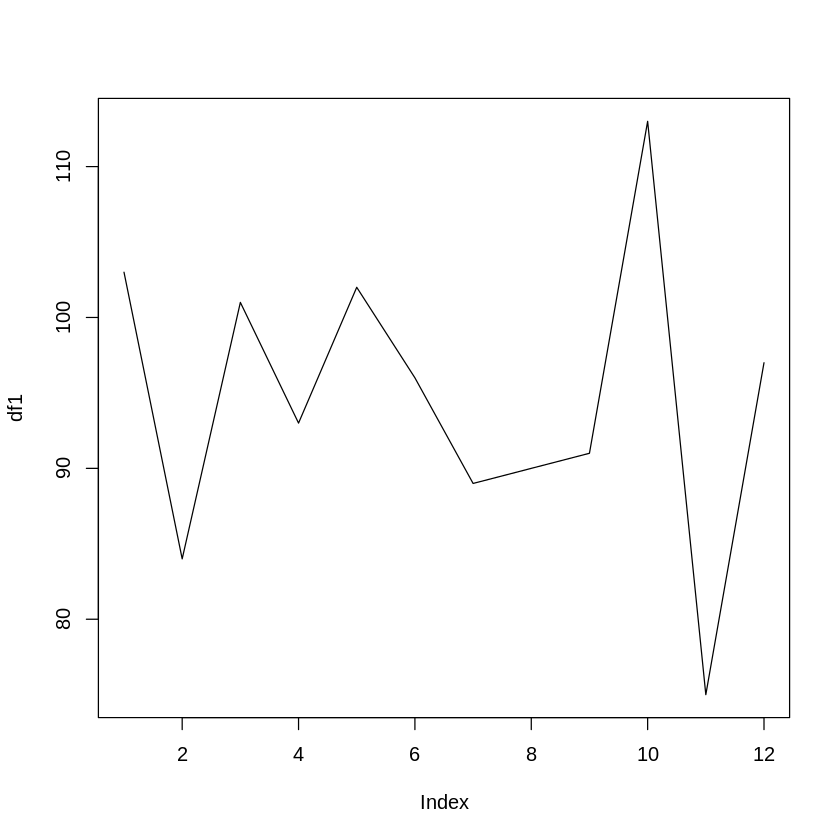

In [16]:
plot(df1, type='l')

In [17]:
name01 <- ita$월
name01

[1] "01월" "02월" "03월" "04월" "05월" "06월" "07월" "08월" "09월" "10월"
[11] "11월" "12월"

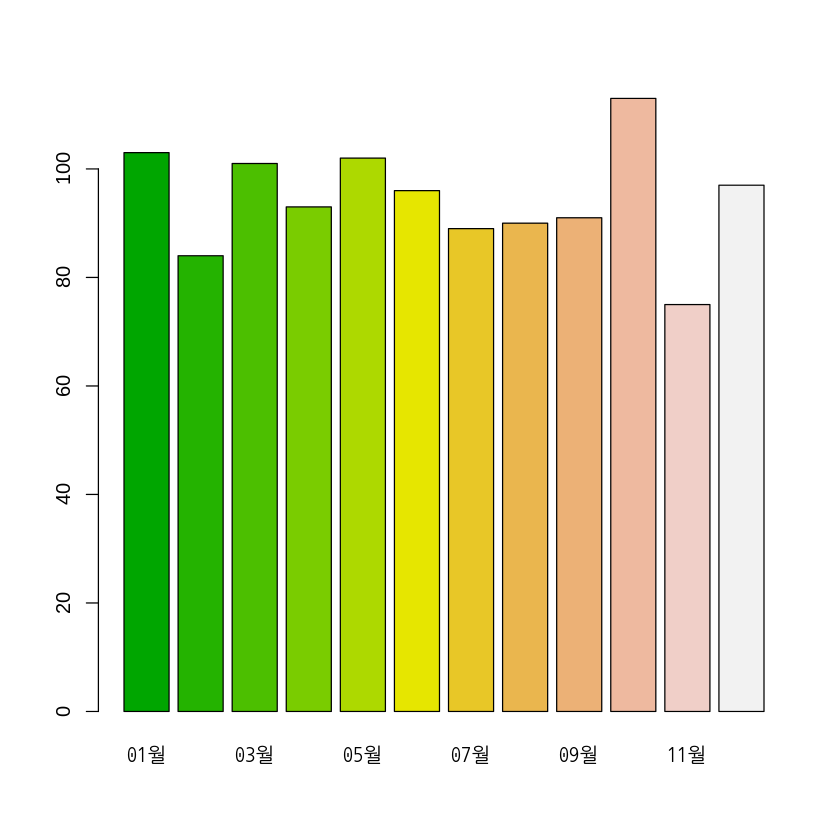

In [18]:
barplot(df1, names.arg = name01, col = terrain.colors(12))

In [19]:
sta2 <- subset(car, 시군구 =='종로구')
sta2

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울,종로구,01월,103,0,133,23,90,20
2,서울,종로구,02월,84,1,111,20,77,14
3,서울,종로구,03월,101,0,149,34,91,24
4,서울,종로구,04월,93,0,114,27,78,9
5,서울,종로구,05월,102,1,143,24,96,23
6,서울,종로구,06월,96,1,123,32,84,7
7,서울,종로구,07월,89,0,128,28,83,17
8,서울,종로구,08월,90,0,127,29,85,13
9,서울,종로구,09월,91,1,133,24,96,13


In [20]:
sta3 <- subset(sta2, 시군구 =='종로구', select = c(월, 발생건수, 사망자수, 부상자수, 중상, 경상, 부상신고))
sta3

,월,발생건수,사망자수,부상자수,중상,경상,부상신고
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,01월,103,0,133,23,90,20
2,02월,84,1,111,20,77,14
3,03월,101,0,149,34,91,24
4,04월,93,0,114,27,78,9
5,05월,102,1,143,24,96,23
6,06월,96,1,123,32,84,7
7,07월,89,0,128,28,83,17
8,08월,90,0,127,29,85,13
9,09월,91,1,133,24,96,13


In [21]:
df2 <- sta3$발생건수
df2

[1] 103  84 101  93 102  96  89  90  91 113  75  97

In [22]:
df3 <- subset(sta3, select = c(발생건수))
df3

,발생건수
,<int>
1,103
2,84
3,101
4,93
5,102
6,96
7,89
8,90
9,91


In [23]:
dim(df3)

[1] 12  1

In [24]:
df04 <- df3[,1]
df04

[1] 103  84 101  93 102  96  89  90  91 113  75  97

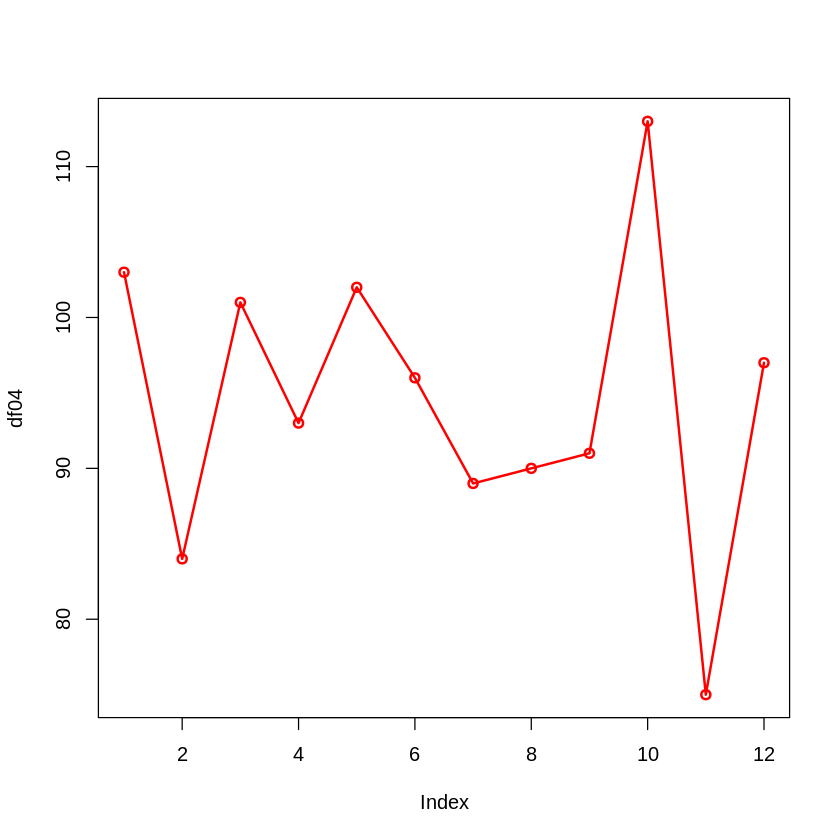

In [25]:
plot(df04, type = 'o', lwd = 2, col = 'red')

In [26]:
name02 <- sta2$월
name02

[1] "01월" "02월" "03월" "04월" "05월" "06월" "07월" "08월" "09월" "10월"
[11] "11월" "12월"

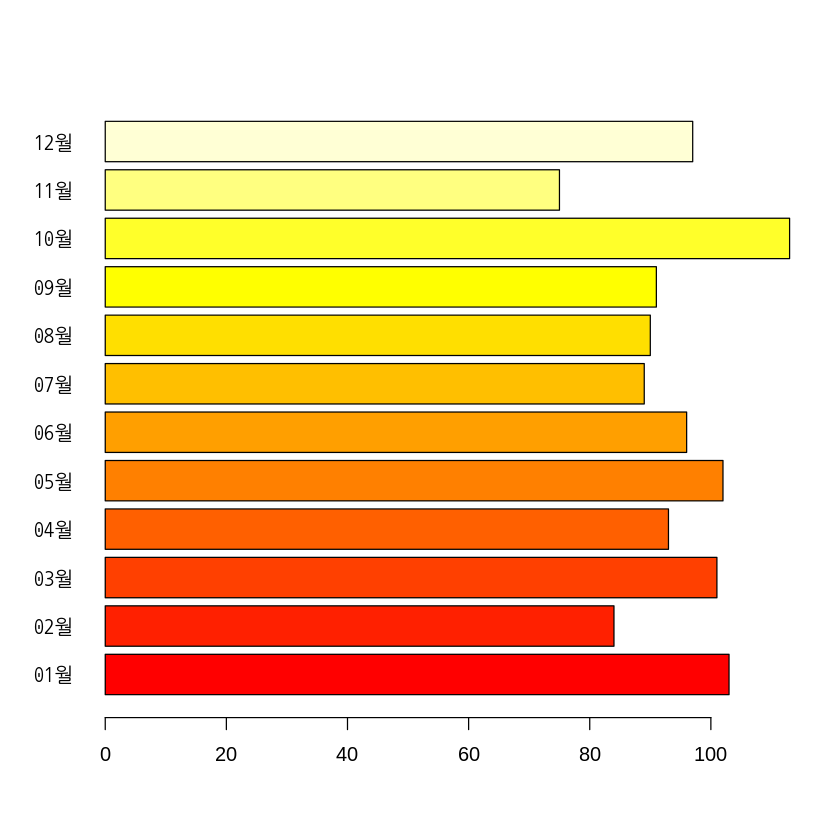

In [27]:
barplot(df04, names.arg = name02, col = heat.colors(12), horiz=T, las=1)

In [28]:
df <- filter(car, car$시군구 == "종로구") 
df

시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
서울,종로구,01월,103,0,133,23,90,20
서울,종로구,02월,84,1,111,20,77,14
서울,종로구,03월,101,0,149,34,91,24
서울,종로구,04월,93,0,114,27,78,9
서울,종로구,05월,102,1,143,24,96,23
서울,종로구,06월,96,1,123,32,84,7
서울,종로구,07월,89,0,128,28,83,17
서울,종로구,08월,90,0,127,29,85,13
서울,종로구,09월,91,1,133,24,96,13


In [29]:
df3 <- select(car, c(월, 발생건수, 사망자수, 부상자수))
df3

월,발생건수,사망자수,부상자수
<chr>,<int>,<int>,<int>
01월,103,0,133
02월,84,1,111
03월,101,0,149
04월,93,0,114
05월,102,1,143
06월,96,1,123
07월,89,0,128
08월,90,0,127
09월,91,1,133


In [30]:
d1 <- car$발생건수
d1

[1] 103  84 101  93 102  96  89  90  91 113  75  97 104  95 106  84 105 103
  [19]  80  85  77 102  93  94 100 104 102 123 134 105 114 118 102 125 100 103
  [37]  81  91  99  88 112  92 103  91  94 113 104  75 142 131 128 135 150 146
  [55] 152 135 148 151 133 148 147 116 117 109 139 108 107 105 117 131 104 127
  [73]  67  61  53  63  86  78  76  77  69  82  53  59  79  81  73  92  90 102
  [91] 101 107 112 102  94 101  71  79  83 101  87  83  86  81  86 102  82  92
 [109] 153 137 127 129 144 141 140 124 153 148 148 127 134 134 109 124 103 131
 [127] 115 141 116 122 146 127 103 118 124 114 137 126 148 117 142 147 128 128
 [145] 222 185 193 197 196 221 195 223 221 207 220 213  92 109  89 133 125 133
 [163] 110 134 122 126 113 126 102 108 107 113 119 100 107 115 103 106 115 105
 [181] 316 249 278 283 288 288 326 301 249 297 292 292  85 100 118 124 123 119
 [199] 124 120 121 138 114 132 224 191 212 265 266 248 288 220 202 273 236 235
 [217] 229 187 227 180 203 185 208 200 210 213 223 213 114 106 128 115 137 130
 [235] 125 123  87 140 113 110 125 125 116 121 151 130 144 112 124 154 139 124
 [253] 132 125 125 141 142 126 115 111 140 128 130 154  90  84  73 100 101 109
 [271]  95 101  82  92 111  70 102 103  96  99 125  93  89 102 104 107  97  99
 [289]  75  70  88  93  89  60  84  70  72  81  80  70  29  23  23  31  45  38
 [307]  37  29  37  35  23  43  41  35  40  37  31  47  43  22  28  40  51  37
 [325]  45  34  50  43  46  51  42  56  58  66  53  43  26  23  26  23  23  29
 [343]  28  32  22  31  34  35 154 127 144 118 138 130 140 142 161 134 119 118
 [361]  77  84  81  67 103  78  87  77  77  84  66  71  73  54  74  71  71  60
 [379]  57  73  62  58  72  72  53  53  52  66  54  53  70  52  53  66  62  54
 [397]  84  72  93  89  90  74  90  95  74 103  73  81  80  70  88  90  85  74
 [415]  79  87  89  68  93 100  45  50  59  62  75  63  66  74  67  62  96  73
 [433]  45  37  53  56  41  39  51  44  50  54  63  51  53  49  65  51  50  61
 [451]  61  56  47  49  63  52  49  58  60  49  59  50  74  62  67  60  62  60
 [469]  73  58  76  74  69  80  74  83  83  84  77  83  38  32  35  36  36  42
 [487]  31  37  32  35  32  47 406 470 385 392 463 416 390 382 425 464 425 379
 [505] 392 338 261 350 315 315 333 287 295 337 302 309 191 146  98 137 138 130
 [523] 129 103 143 151 161 155 139 126 130 135 133 141 132 123 145 146 146 122
 [541] 228 224 254 244 271 270 296 296 270 293 295 295 352 322 278 302 336 295
 [559] 321 329 338 331 356 318 248 245 275 278 267 298 291 277 271 325 303 310
 [577]  78  85  84 100  78  85  85 100  98  87  97  99  53  48  50  46  64  49
 [595]  71  56  61  50  56  64  79  63  83  91  92  90 114  79  86 116 102  99
 [613]  46  29  40  45  32  41  34  41  43  67  43  52 219 181 207 208 220 217
 [631] 258 217 237 240 279 233 184 177 184 204 204 219 214 187 197 223 219 222
 [649] 155 170 121 131 128 129 140 147 119 145 160 148 388 410 298 321 289 299
 [667] 311 321 317 326 335 335 131 131 112 134 134 132 148 137 158 154 163 157
 [685]  15  16  13  12  14  20  17  13  21  19   6  23  63  48  68  70  61  73
 [703]  82  81  71  82  70  63  21  24  27  28  43  31  47  56  30  28  24  21
 [721]  28  44  30  43  43  40  57  54  63  53  51  26  81  74  85  86  73  93
 [739]  86  89  96  75 101  77 216 277 235 279 268 240 268 251 276 307 288 300
 [757]  87  80  75  87  73  91  74  84  79 103  99  94 122 136 113 118 137 129
 [775] 158 149 151 168 173 128  28  30  31  22  35  35  40  37  43  38  38  29
 [793]  14  19  21  21  24  16  21  22  21  21  23  16  51  56  36  54  62  56
 [811]  57  48  56  67  63  53 199 180 172 204 218 227 230 213 194 197 197 200
 [829]  82  68  72  68  85  85  89  67  83 104  64  95  42  45  23  33  33  38
 [847]  38  44  45  31  36  36  67  65  71  84 112  97  79  69  72  97  90  74
 [865] 101  96 117 128 138 152 131 135 148 165 124 123 181 144 138 152 161 147
 [883] 151 168 172 173 179 139  26  26  18  22  42  34  31  32  33  31  27  34
 [901]  76  78  73  74  74  79  85  72  75  84  82  6

In [31]:
d2 <- car$사망자수
d2

[1]  0  1  0  0  1  1  0  0  1  0  1  1  1  2  1  1  1  0  0  1  0  0  1  1
  [25]  3  1  0  0  2  3  1  1  1  1  0  1  3  0  2  0  0  1  1  0  1  0  1  0
  [49]  0  1  3  2  0  1  0  0  2  2  2  1  0  2  1  1  0  2  0  2  1  3  0  2
  [73]  0  1  0  0  1  1  1  0  0  2  0  0  1  1  1  1  0  0  1  1  3  1  0  2
  [97]  0  1  0  2  2  0  0  0  0  0  0  0  0  1  1  1  3  0  0  2  0  2  1  0
 [121]  3  0  0  0  1  2  0  2  1  0  0  2  3  1  0  1  0  0  1  1  1  0  2  3
 [145]  2  3  2  1  2  1  2  3  1  3  2  0  1  2  0  3  1  1  1  0  0  0  0  0
 [169]  1  0  2  0  0  0  0  3  1  0  0  1  1  1  3  1  0  0  2  3  2  2  2  3
 [193]  1  1  2  2  1  0  2  0  0  0  3  0  4  2  2  4  2  2  5  2  0  1  3  0
 [217]  1  2  1  1  3  0  1  1  4  0  2  2  0  1  1  0  1  1  1  0  1  1  3  1
 [241]  1  1  3  0  1  0  0  2  0  0  2  0  2  1  1  1  0  4  2  1  0  1  1  0
 [265]  1  0  1  0  0  0  3  1  0  0  1  3  0  2  1  1  0  1  3  1  0  2  1  1
 [289]  1  0  0  1  0  0  2  0  0  0  2  0  0  0  0  1  0  0  0  0  1  1  0  0
 [313]  1  0  1  0  1  0  0  0  1  2  0  0  0  0  0  0  1  0  1  1  0  0  0  0
 [337]  0  1  1  1  0  0  0  0  1  1  0  0  2  2  1  0  4  2  1  0  2  2  0  2
 [361]  0  0  1  0  0  1  2  1  0  1  0  0  0  0  2  3  0  1  0  1  0  2  0  0
 [385]  0  2  0  0  1  0  0  3  0  0  0  0  1  1  1  3  1  1  1  1  0  1  1  0
 [409]  1  0  0  1  0  0  0  0  0  0  0  1  0  1  3  1  0  0  0  0  1  1  0  0
 [433]  0  1  4  0  2  0  3  1  3  0  1  0  0  0  1  0  0  1  1  0  0  0  0  2
 [457]  1  0  0  0  0  0  0  0  0  0  0  1  3  1  0  2  0  0  3  0  3  1  2  0
 [481]  1  0  0  0  1  0  2  1  1  1  0  1  1  2  2  3  2  4  2  4  4  6  7  2
 [505]  5  2  4  4  1  4  1  3  2  5  3  3  0  4  3  2  0  2  1  0  1  1  1  4
 [529]  0  2  3  1  2  0  1  0  1  1  2  1  1  1  2  0  2  0  3  4  4  2  0  3
 [553]  9  4  2  4  4  2  3  4  3  3  1  3  4  3  5  6  3  3  3  7  4  4  3  6
 [577]  0  3  2  1  0  2  0  0  0  2  2  0  0  0  1  1  2  0  1  2  1  0  0  3
 [601]  3  1  2  0  0  0  2  3  2  2  1  3  1  1  2  1  1  2  0  2  1  1  0  2
 [625]  8  2  7  6  7  1  2  6  6  9  5  0  2  1  0  4  5  6  2  4  2  1  1  1
 [649]  0  3  2  2  2  0  1  3  0  3  3  3  6  2  0  2  3  3  3  4  4  6  2  3
 [673]  0  0  4  0  2  1  3  3  3  1  1  1  0  0  0  0  2  1  0  1  0  1  0  1
 [697]  2  1  1  2  1  3  1  0  3  1  1  0  2  1  2  1  2  1  1  1  0  0  0  0
 [721]  2  0  1  0  3  2  2  0  3  0  0  2  4  1  1  2  0  0  2  2  1  2  3  1
 [745]  0  3  3  5  4  4  7  2  1  2  3  3  2  2  1  0  2  6  2  1  0  3  0  0
 [769]  1  1  0  2  0  3  1  2  6  3  1  4  2  0  1  0  1  2  0  3  1  1  0  0
 [793]  0  0  0  1  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  2  3  0  0  0
 [817]  4  1  4  1  3  4  4  1  2  1  4 12  1  1  0  0  1  0  2  1  0  0  0  4
 [841]  1  0  0  0  0  0  0  2  1  0  1  0  0  0  1  1  5  0  1  0  0  0  1  0
 [865]  0  1  1  1  0  1  4  4  1  2  1  2  2  2  2  3  0  1  1  0  1  3  2  3
 [889]  0  1  0  0  1  0  1  0  0  1  1  0  1  0  3  3  2  2  0  3  2  2  1  3
 [913]  2  0  0  0  1  1  0  0  0  1  1  0  1  1  2  0  0  1  0  1  2  0  2  0
 [937]  1  0  0  0  1  0  0  0  1  0  1  2  1  0  6  0  3  1  0  0  0  0  1  1
 [961]  1  0  0  5  1  2  0  1  0  4  0  0  0  0  1  2  0  2  4  1  1  0  0  0
 [985]  1  1  1  0  0  0  1  0  3  3  2  3  2  1  0  1  0  0  0  1  0  2  0  1
[1009]  0  1  0  0  3  1  0  0  0  0  0  0  1  0  0  0  1  0  0  1  1  1  0  4
[1033]  0  0  1  0  1  0  0  0  1  0  2  0  0  0  2  2  0  0  2  2  1  0  0  1
[1057]  0  1  0  2  0  0  1  4  3  0  0  1  0  0  0  0  0  1  0  2  3  2  0  0
[1081]  6 12  2 10  8  9  6  8  6  6  6  7  2  3  1  0  5  5  3  0  3  0  2  3
[1105]  1  2  2  0  0  1  4  2  2  2  2  3  0  0  0  0  1  1  0  1  1  1  1  0
[1129]  1  0  0  1  0  1  2  1  1  2  2  0  0  1  0  1  1  0  2  1  2  2  0  0
[1153]  0  2  0  4  1  1  2  4  2  2  1  1  0  4  0  2  2  0  0  3  0  0  1  2
[1177]  2  4  1  0  1  1  0  2  3  1  3  2  0  2  1  0  1  1  1  1  0  1  0  0
[1201]  0  0  1  0  0  0  0  0  0  0  0  0  3  3  4  

In [32]:
d3 <- car$부상자수
d3

[1] 133 111 149 114 143 123 128 127 133 166 100 119 143 116 141 130 134 129
  [19] 116 117  93 128 131 128 140 149 160 162 182 142 145 169 137 185 132 149
  [37] 110 122 144 113 166 124 135 129 121 157 134 106 185 162 163 166 205 184
  [55] 182 185 175 184 181 188 194 168 160 178 210 152 142 161 152 162 128 173
  [73]  84  76  59  84 102  90  93 102  90 109  89  83 106 146 104 119 123 133
  [91] 138 149 135 136 126 165 106 110 101 137 120 106 114 109 118 141 123 118
 [109] 229 217 178 181 193 215 228 185 227 202 203 171 210 177 164 206 155 189
 [127] 173 228 169 156 208 173 162 182 167 159 176 177 206 150 209 195 179 167
 [145] 316 261 274 269 277 309 283 310 325 279 313 316 109 148 126 179 176 179
 [163] 150 169 167 174 144 171 130 138 139 148 155 126 148 161 144 149 144 135
 [181] 456 369 393 411 404 436 427 438 356 403 447 427 101 136 157 152 190 178
 [199] 171 161 159 189 135 193 320 266 290 365 352 336 396 309 283 364 333 318
 [217] 321 297 331 246 310 271 312 296 287 313 337 319 179 140 171 141 201 180
 [235] 166 176 112 181 141 151 183 169 140 159 213 180 188 153 183 227 182 158
 [253] 176 164 217 180 193 155 178 169 218 179 172 226 119 111 101 126 134 140
 [271] 130 136 107 135 148  87 160 139 135 136 158 118 133 136 129 128 123 138
 [289] 118 104 124 114 123  80 106 103 106 110 146  92  38  27  25  45  59  42
 [307]  61  48  50  41  34  53  53  49  60  47  54  66  63  25  34  51  67  58
 [325]  60  51  58  58  75  63  58  79  89  87  73  61  41  26  31  26  36  37
 [343]  38  34  24  36  52  42 212 180 216 174 183 172 176 170 223 172 156 145
 [361] 110 120 107  76 162 114 133 103  97 103  85  93  98  79  94  95  85  82
 [379]  75  87  78  75  93  97  70  64  80  93  62  74 117  63  68  89  79  75
 [397] 123 102 125 131 141  98 129 136 113 133  98 123 101  95 137 117 112  99
 [415] 112 143 130  82 118 132  64  70  71  83  98  85  89  94  93  99 127  92
 [433]  70  55  80  71  63  53  84  63  95  70  97  76  64  68  85  68  67  78
 [451]  79  68  65  68  92  61  71  90  90  71  76  68 112  84  88  85  90  79
 [469]  87  84 114 105 119 103 114 110 134 122 110 118  63  55  52  57  64  63
 [487]  47  47  47  56  51  68 556 709 520 543 676 598 560 533 616 664 616 557
 [505] 569 541 398 513 461 440 475 393 424 514 491 416 308 214 124 171 192 171
 [523] 202 170 235 211 210 193 209 166 185 213 195 183 198 194 232 220 186 175
 [541] 329 324 397 333 378 367 423 433 391 372 403 400 559 513 444 430 522 416
 [559] 475 479 516 511 558 486 410 441 465 456 422 463 509 448 450 475 465 461
 [577] 102 121 125 142 105 122 128 154 136 120 132 133  76  80  69  70  84  79
 [595] 102  80  81  66  88  91 109  83 110 133 151 136 164 139 149 178 142 135
 [613]  69  48  64  90  51  62  48  59  74  94  77  78 345 268 310 330 350 331
 [631] 400 346 362 363 471 381 265 270 264 303 308 331 322 275 296 344 310 364
 [649] 245 272 183 190 219 184 229 229 192 197 212 233 569 639 428 517 397 416
 [667] 450 508 474 497 515 479 208 219 169 236 206 191 224 235 239 213 248 234
 [685]  30  23  16  25  15  31  43  21  35  31   9  34 124  66 117 113 118 123
 [703] 138 146 121 123 115 109  41  44  45  47  81  52  93 101  51  55  38  34
 [721]  40  84  40  78  60  56  87  86  99  83  80  33 126 116 147 140 131 142
 [739] 121 149 139 127 169 119 335 471 352 459 463 377 424 426 461 458 423 467
 [757] 139 143 153 151 111 146 134 132 137 164 161 169 209 216 178 189 212 179
 [775] 263 228 232 272 270 216  38  40  38  29  54  47  57  47  59  60  56  51
 [793]  26  37  31  31  37  35  37  29  35  24  33  30  91  81  53  83  78  89
 [811]  84  56  73  92  87  87 342 301 254 301 330 378 411 360 321 316 296 293
 [829] 129 105 103  95 114 120 136  96 115 158  87 151  64  79  34  58  49  49
 [847]  65  67 116  40  60  45  98  90 109 124 181 127 130 105 109 136 133 101
 [865] 166 154 181 200 214 233 190 212 238 248 217 167 280 244 220 225 239 227
 [883] 242 289 294 264 299 219  35  39  23  40  59  51  63  48  44  40  35  44
 [901] 128 126 106 100 116 115 134 103 141 132 106 10

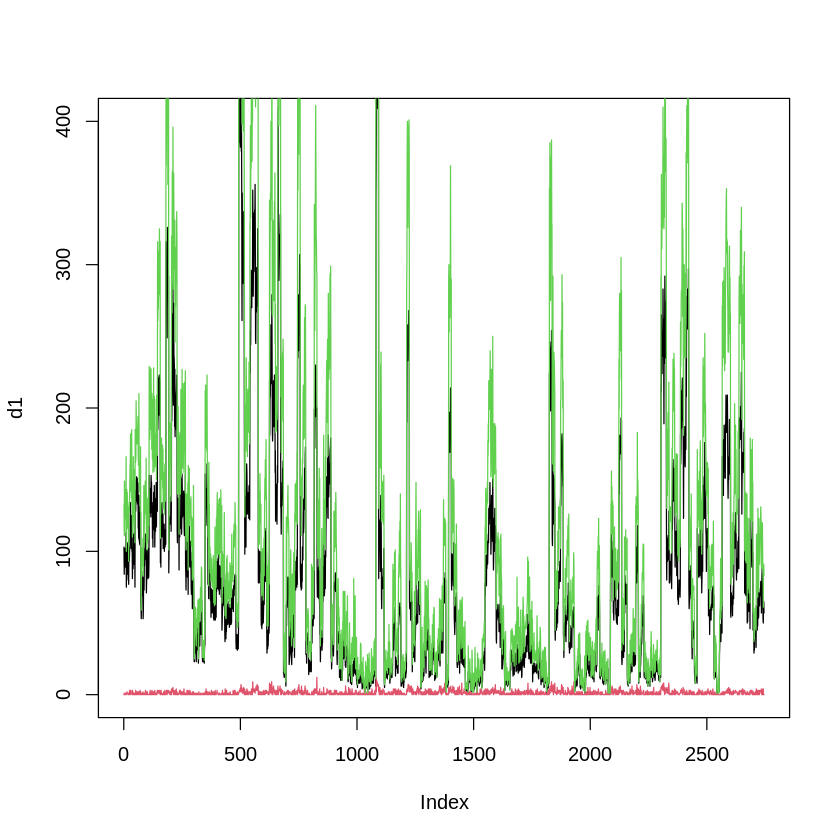

In [33]:
plot(d1, type = 'l', col = 1, ylim = c(0, 400))
lines(d2, col = 2)
lines(d3, col = 3)

In [34]:
df <- data.frame(d1=d1 ,d2=d2, d3=d3)
df

d1,d2,d3
<int>,<int>,<int>
103,0,133
84,1,111
101,0,149
93,0,114
102,1,143
96,1,123
89,0,128
90,0,127
91,1,133


In [35]:
mdf <- as.matrix(df)
mdf

d1,d2,d3
103,0,133
84,1,111
101,0,149
93,0,114
102,1,143
96,1,123
89,0,128
90,0,127
91,1,133
113,0,166


In [36]:
name02 <- names(df)
name02

[1] "d1" "d2" "d3"

In [37]:
name02[-1]

[1] "d2" "d3"

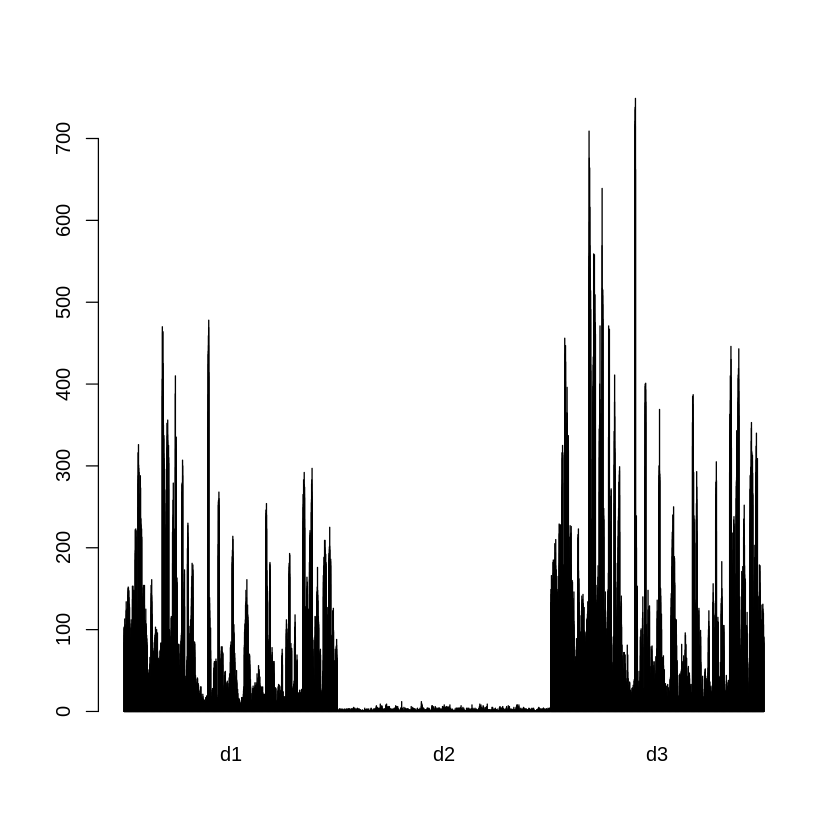

In [38]:
barplot(mdf, beside=T, col = rainbow(12), names.arg = name02)

In [39]:
pta2 <- car %>% filter(시군구 == '종로구')
pta2

시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
서울,종로구,01월,103,0,133,23,90,20
서울,종로구,02월,84,1,111,20,77,14
서울,종로구,03월,101,0,149,34,91,24
서울,종로구,04월,93,0,114,27,78,9
서울,종로구,05월,102,1,143,24,96,23
서울,종로구,06월,96,1,123,32,84,7
서울,종로구,07월,89,0,128,28,83,17
서울,종로구,08월,90,0,127,29,85,13
서울,종로구,09월,91,1,133,24,96,13


In [40]:
pta3 <- car %>% filter(시군구 == '종로구') %>% select(월, 발생건수, 사망자수, 부상자수)
pta3

월,발생건수,사망자수,부상자수
<chr>,<int>,<int>,<int>
01월,103,0,133
02월,84,1,111
03월,101,0,149
04월,93,0,114
05월,102,1,143
06월,96,1,123
07월,89,0,128
08월,90,0,127
09월,91,1,133


In [41]:
d1 <- pta3$발생건수
d1

[1] 103  84 101  93 102  96  89  90  91 113  75  97

In [42]:
d2 <- pta3$사망자수
d2

[1] 0 1 0 0 1 1 0 0 1 0 1 1

In [43]:
d3 <- pta3$부상자수
d3

[1] 133 111 149 114 143 123 128 127 133 166 100 119

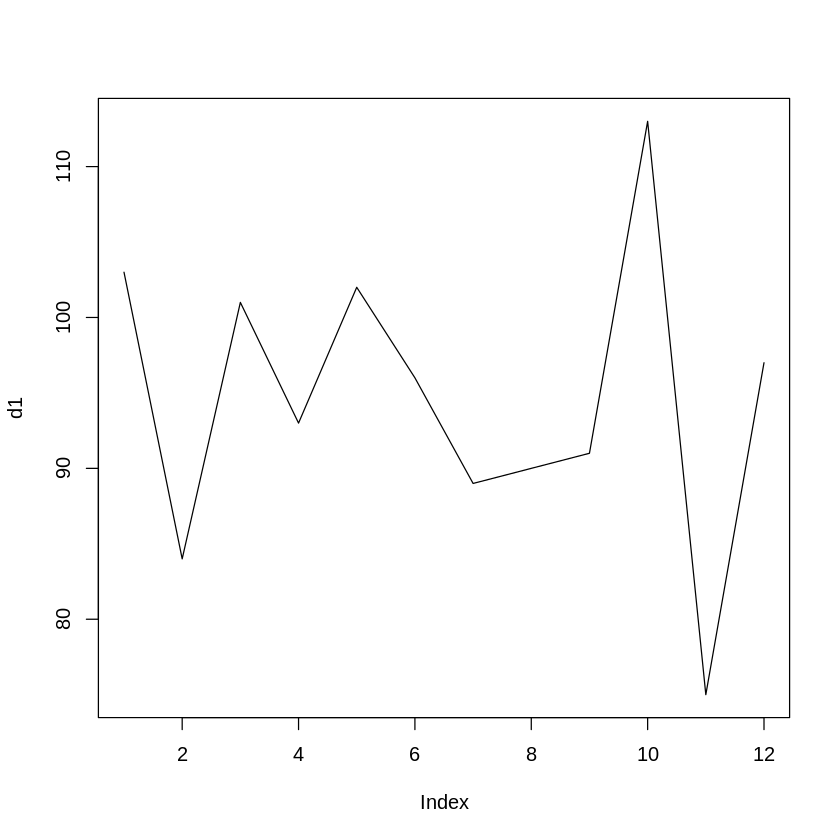

In [44]:
plot(d1, type = 'l')

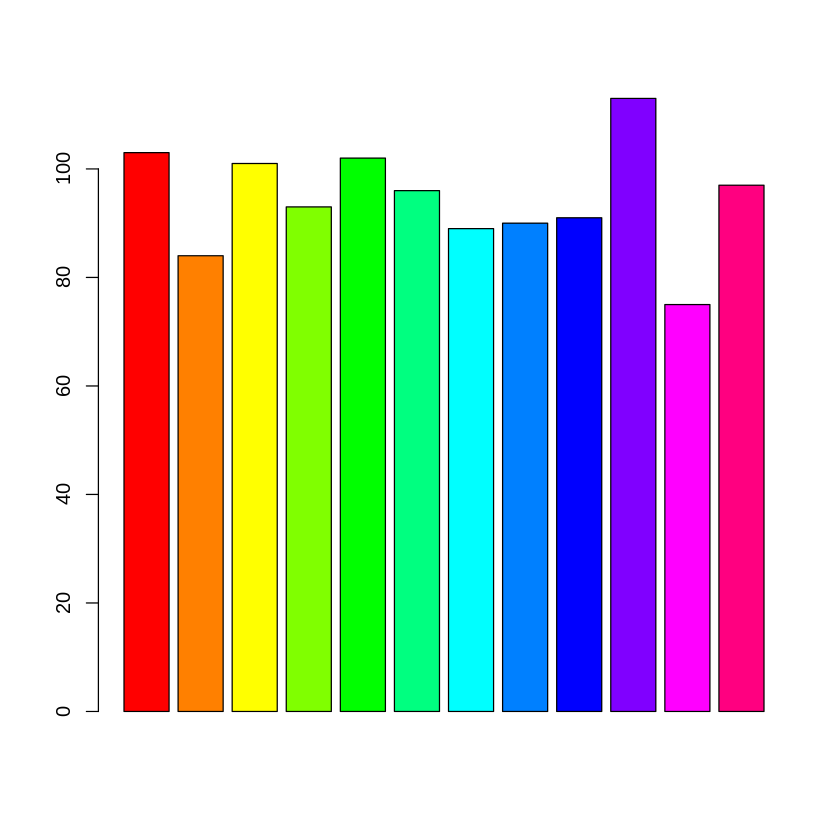

In [45]:
barplot(d1, col = rainbow(12))

In [46]:
pta3 %>% summarise(mean_d1 = mean(발생건수))

mean_d1
<dbl>
94.5


In [47]:
pta3 %>% summarise(mean_d1 = mean(사망자수))

mean_d1
<dbl>
0.5


In [48]:
pta3%>% summarise(mean_d1 = mean(부상자수))

mean_d1
<dbl>
128.8333


In [49]:
car_mean1 <- car %>% group_by(시군구) %>% summarise(mean_d1 = mean(발생건수)) 
car_mean1

시군구,mean_d1
<chr>,<dbl>
가평군,31.666667
강남구,288.250000
강동구,118.166667
강릉시,76.500000
강북구,101.333333
강서구,86.916667
강진군,25.166667
강화군,16.833333
거제시,71.333333


In [50]:
car_mean1$시군구

[1] "가평군"       "강남구"       "강동구"       "강릉시"       "강북구"      
  [6] "강서구"       "강진군"       "강화군"       "거제시"       "거창군"      
 [11] "경산시"       "경주시"       "계룡시"       "계양구"       "고령군"      
 [16] "고성군"       "고양시"       "고창군"       "고흥군"       "곡성군"      
 [21] "공주시"       "과천시"       "관악구"       "광명시"       "광산구"      
 [26] "광양시"       "광주시"       "광진구"       "괴산군"       "구례군"      
 [31] "구로구"       "구리시"       "구미시"       "군산시"       "군위군"      
 [36] "군포시"       "금산군"       "금정구"       "금천구"       "기장군"      
 [41] "김제시"       "김천시"       "김포시"       "김해시"       "나주시"      
 [46] "남구"         "남동구"       "남양주시"     "남원시"       "남해군"      
 [51] "노원구"       "논산시"       "단양군"       "달서구"       "달성군"      
 [56] "담양군"       "당진시"       "대덕구"       "도봉구"       "동구"        
 [61] "동대문구"     "동두천시"     "동래구"       "동작구"       "동해시"      
 [66] "마포구"       "목포시"       "무안군"       "무주군"       "문경시"      
 [71] "밀양시"       "보령시"       "보성군"       "보은군"       "봉화군"      
 [76] "부산진구"     "부안군"       "부여군"       "부천시"       "부평구"      
 [81] "북구"         "사상구"       "사천시"       "사하구"       "산청군"      
 [86] "삼척시"       "상주시"       "서구"         "서귀포시"     "서대문구"    
 [91] "서산시"       "서천군"       "서초구"       "성남시"       "성동구"      
 [96] "성북구"       "성주군"       "세종"         "속초시"       "송파구"      
[101] "수성구"       "수영구"       "수원시"       "순창군"       "순천시"      
[106] "시흥시"       "신안군"       "아산시"       "안동시"       "안산시"      
[111] "안성시"       "안양시"       "양구군"       "양산시"       "양양군"      
[116] "양주시"       "양천구"       "양평군"       "여수시"       "여주시"      
[121] "연수구"       "연제구"       "연천군"       "영광군"       "영덕군"      
[126] "영도구"       "영동군"       "영등포구"     "영암군"       "영양군"      
[131] "영월군"       "영주시"       "영천시"       "예산군"       "예천군"      
[136] "오산시"       "옥천군"       "옹진군"       "완도군"       "완주군"      
[141] "용산구"       "용인시"       "울릉군"       "울주군"       "울진군"      
[146] "원주시"       "유성구"       "은평구"       "음성군"       "의령군"      
[151] "의성군"       "의왕시"       "의정부시"     "이천시"       "익산시"      
[156] "인제군"       "임실군"       "장성군"       "장수군"       "장흥군"      
[161] "전주시"       "정선군"       "정읍시"       "제주시"       "제천시"      
[166] "종로구"       "중구"         "중랑구"       "증평군"       "진도군"      
[171] "진안군"       "진주시"       "진천군"       "창녕군"       "창원시(통합)"
[176] "천안시"       "철원군"       "청도군"       "청송군"       "청양군"      
[181] "청주시"       "춘천시"       "충주시"       "칠곡군"       "태백시"      
[186] "태안군"       "통영시"       "파주시"       "평창군"       "평택시"      
[191] "포천시"       "포항시"       "하남시"       "하동군"       "함안군"      
[196] "함양군"       "함평군"       "합천군"       "해남군"       "해운대구"    
[201] "홍성군"       "홍천군"       "화성시"       "화순군"       "화천군"      
[206] "횡성군"

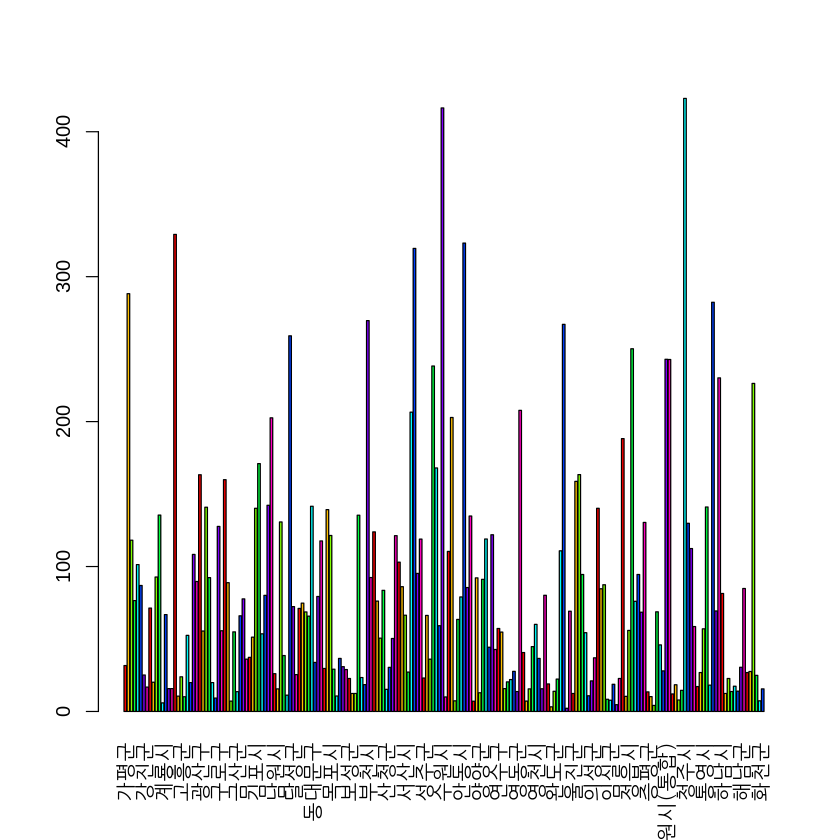

In [51]:
barplot(car_mean1$mean_d1, names.arg = car_mean1$시군구, las=3, col = rainbow(8))

In [52]:
y <- d1
x <- c(1:12)

y
x

[1] 103  84 101  93 102  96  89  90  91 113  75  97

[1]  1  2  3  4  5  6  7  8  9 10 11 12

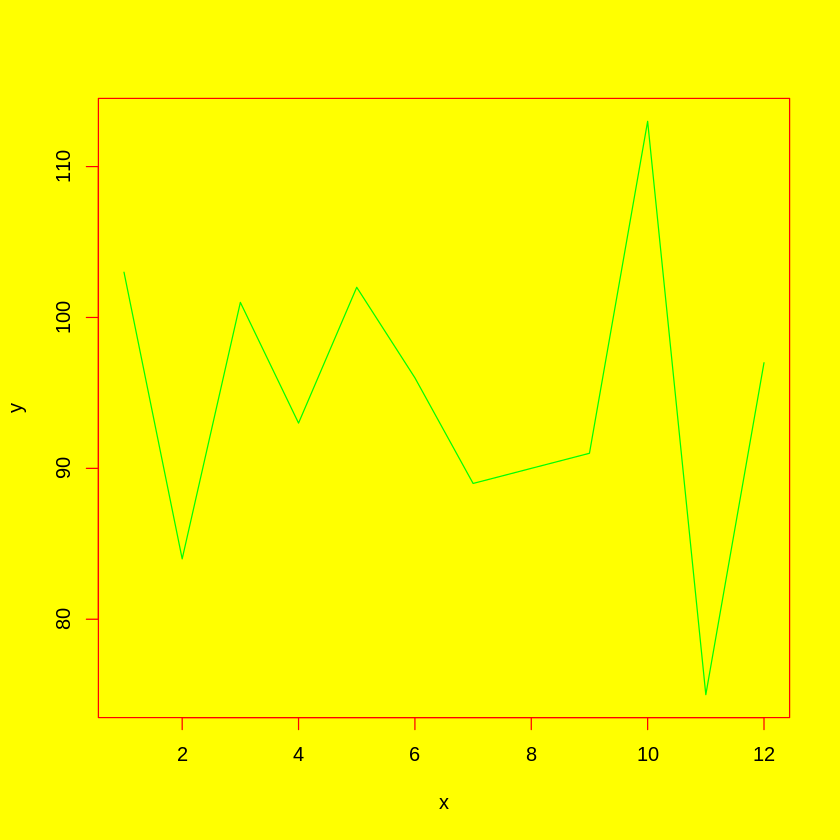

In [53]:
par(bg = 'yellow')
plot(x, y, type= 'l', bg = 'blue', fg = 'red', col = 'green')

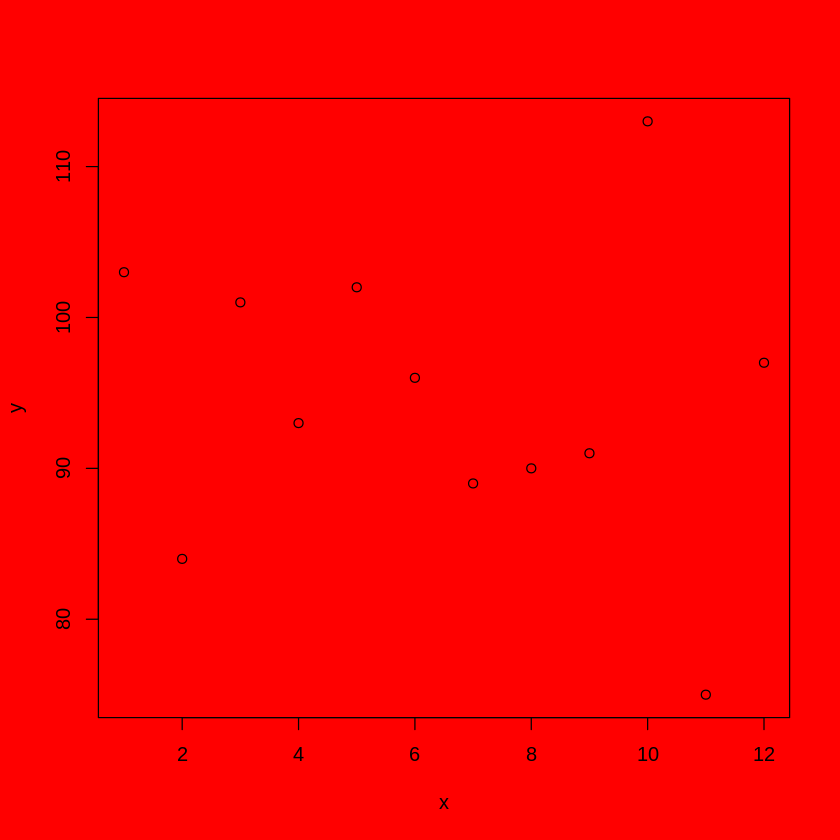

In [54]:
par(bg = 'red')
plot(x,y)

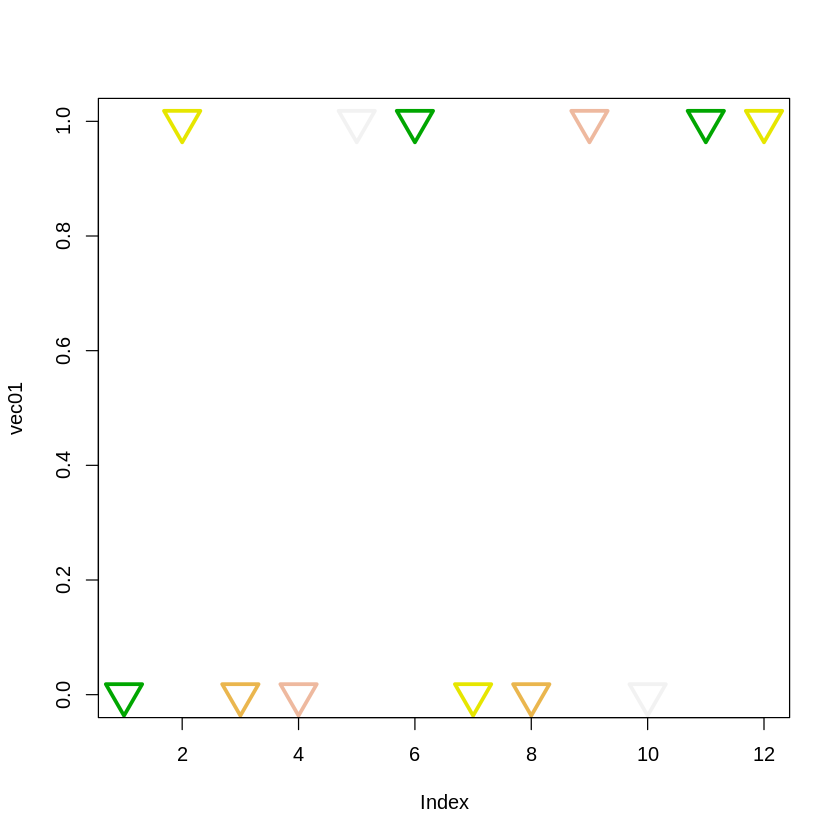

In [55]:
par(bg = 'white')
vec01 <- d2
plot(vec01, pch = 25, cex = 3, lwd = 3, col = terrain.colors(5))

In [56]:
par(mfrow = c(1,1))
y <- d1
x <- c(1:12)


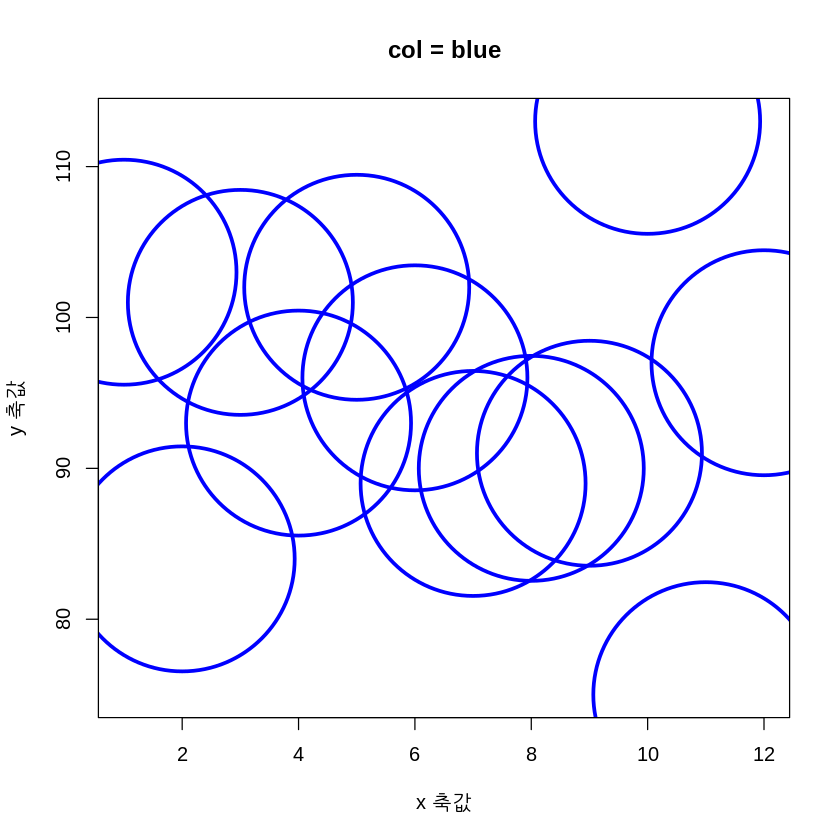

In [57]:
plot(x,y, bg = 'yellow', cex = 25, col = 'blue', lwd = 3, main = 'col = blue', xlab = 'x 축값', ylab = 'y 축값')

In [58]:
col <- colors()
col

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

In [59]:
length(col)

[1] 657

In [60]:
grep('blue', col, value = T)

[1] "aliceblue"       "blue"            "blue1"           "blue2"          
 [5] "blue3"           "blue4"           "blueviolet"      "cadetblue"      
 [9] "cadetblue1"      "cadetblue2"      "cadetblue3"      "cadetblue4"     
[13] "cornflowerblue"  "darkblue"        "darkslateblue"   "deepskyblue"    
[17] "deepskyblue1"    "deepskyblue2"    "deepskyblue3"    "deepskyblue4"   
[21] "dodgerblue"      "dodgerblue1"     "dodgerblue2"     "dodgerblue3"    
[25] "dodgerblue4"     "lightblue"       "lightblue1"      "lightblue2"     
[29] "lightblue3"      "lightblue4"      "lightskyblue"    "lightskyblue1"  
[33] "lightskyblue2"   "lightskyblue3"   "lightskyblue4"   "lightslateblue" 
[37] "lightsteelblue"  "lightsteelblue1" "lightsteelblue2" "lightsteelblue3"
[41] "lightsteelblue4" "mediumblue"      "mediumslateblue" "midnightblue"   
[45] "navyblue"        "powderblue"      "royalblue"       "royalblue1"     
[49] "royalblue2"      "royalblue3"      "royalblue4"      "skyblue"        
[53] "skyblue1"        "skyblue2"        "skyblue3"        "skyblue4"       
[57] "slateblue"       "slateblue1"      "slateblue2"      "slateblue3"     
[61] "slateblue4"      "steelblue"       "steelblue1"      "steelblue2"     
[65] "steelblue3"      "steelblue4"

In [61]:
length(grep('blue', col, value=T))

[1] 66

In [62]:
grep('red', col , value=T)

[1] "darkred"         "indianred"       "indianred1"      "indianred2"     
 [5] "indianred3"      "indianred4"      "mediumvioletred" "orangered"      
 [9] "orangered1"      "orangered2"      "orangered3"      "orangered4"     
[13] "palevioletred"   "palevioletred1"  "palevioletred2"  "palevioletred3" 
[17] "palevioletred4"  "red"             "red1"            "red2"           
[21] "red3"            "red4"            "violetred"       "violetred1"     
[25] "violetred2"      "violetred3"      "violetred4"

In [63]:
length(grep('red', col, value =T))

[1] 27

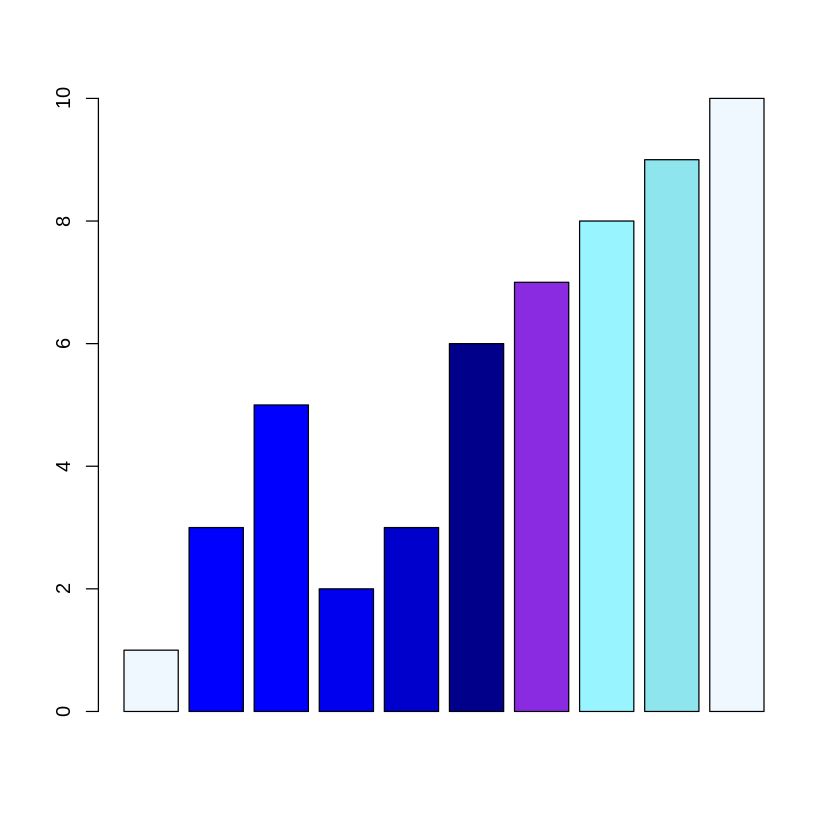

In [64]:
vec01 <- c(1,3,5,2,3,6,7,8,9,10)
colnames <- c('aliceblue', 'blue', 'blue1', 'blue2', 'blue3', 'blue4', 'blueviolet', 'cadetblue1', 'cadetblue2')
barplot(vec01, col = colnames)

In [65]:
length(grep('green', col, value=T))

[1] 40

In [66]:
gre = grep('green', col, value =T)
gre

[1] "darkgreen"         "darkolivegreen"    "darkolivegreen1"  
 [4] "darkolivegreen2"   "darkolivegreen3"   "darkolivegreen4"  
 [7] "darkseagreen"      "darkseagreen1"     "darkseagreen2"    
[10] "darkseagreen3"     "darkseagreen4"     "forestgreen"      
[13] "green"             "green1"            "green2"           
[16] "green3"            "green4"            "greenyellow"      
[19] "lawngreen"         "lightgreen"        "lightseagreen"    
[22] "limegreen"         "mediumseagreen"    "mediumspringgreen"
[25] "palegreen"         "palegreen1"        "palegreen2"       
[28] "palegreen3"        "palegreen4"        "seagreen"         
[31] "seagreen1"         "seagreen2"         "seagreen3"        
[34] "seagreen4"         "springgreen"       "springgreen1"     
[37] "springgreen2"      "springgreen3"      "springgreen4"     
[40] "yellowgreen"

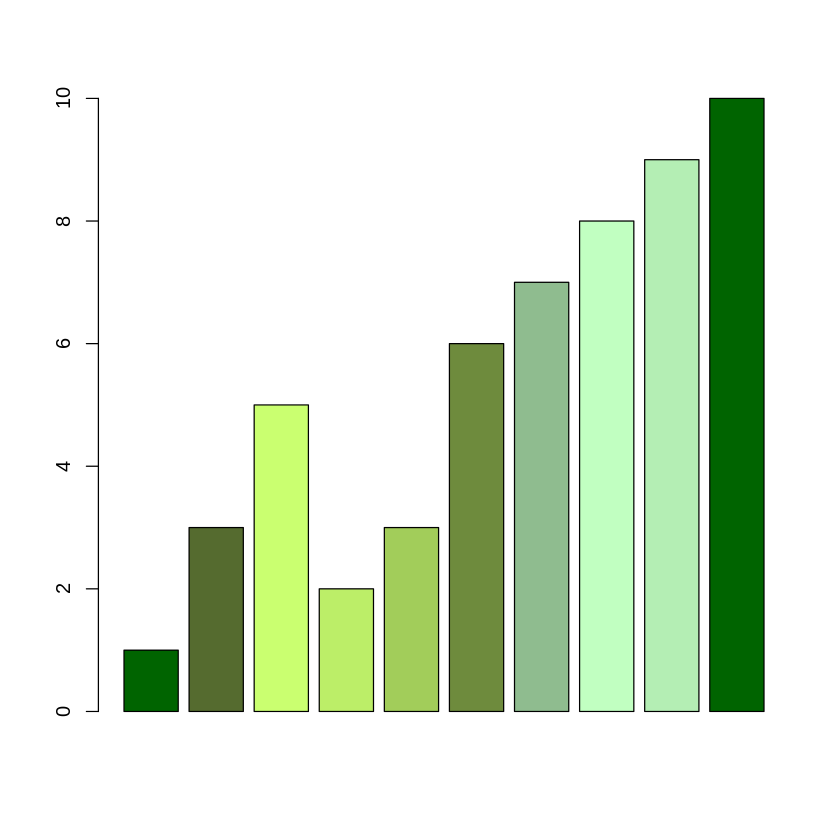

In [67]:
barplot(vec01, col = gre[0:9])

In [68]:
df <- car %>% filter(시군구 == "중랑구") %>% select(월, 발생건수, 사망자수, 부상자수, 중상, 경상 ,부상신고)
df

월,발생건수,사망자수,부상자수,중상,경상,부상신고
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
01월,125,1,183,35,141,7
02월,125,1,169,34,127,8
03월,116,3,140,31,95,14
04월,121,0,159,35,112,12
05월,151,1,213,57,132,24
06월,130,0,180,40,119,21
07월,144,0,188,53,112,23
08월,112,2,153,38,103,12
09월,124,0,183,38,127,18


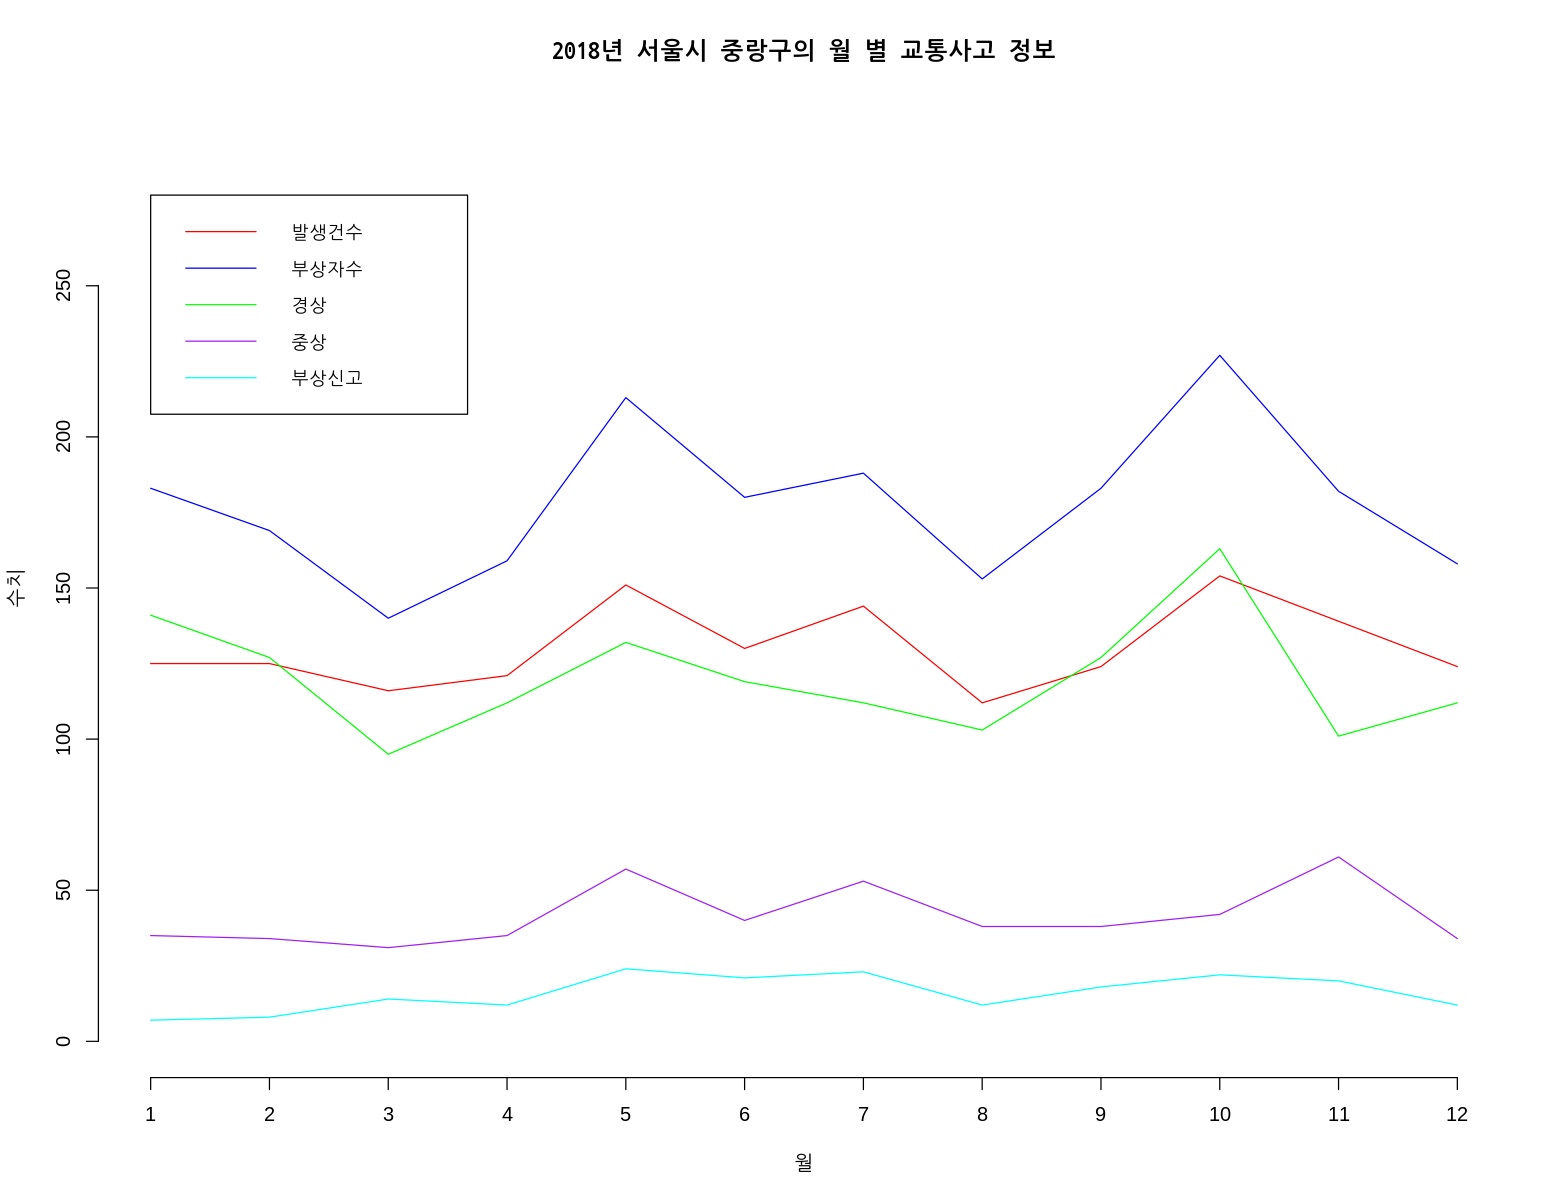

In [92]:
options(repr.plot.width=13, repr.plot.height=10)

par(bg = 'white')
plot(df$발생건수, type = 'l', col = 'red', ann = F, axes = F, ylim = c(0, 300))
lines(df$부상자수, col = 'blue')
lines(df$경상, col = 'green')
lines(df$중상, col = 'purple')
lines(df$부상신고, col = 'cyan')
title ("2018년 서울시 중랑구의 월 별 교통사고 정보", xlab = "월", ylab = "수치", cex = 1.5)
axis(1, at = 1:12)
axis(2, at = c(0, 50, 100, 150, 200, 250))
legend(1 ,280, cex = 0.9, c("발생건수", "부상자수", "경상", "중상", "부상신고"), col = c("red", ' blue', 'green', 'purple', 'cyan'), lty = 1, lwd=1)

Warning message in par(bg = "white", mar = c(4, 5, 5, 5), bty = "n", cex = 1.1, :
“`mgp[1:3]' are of differing sign”


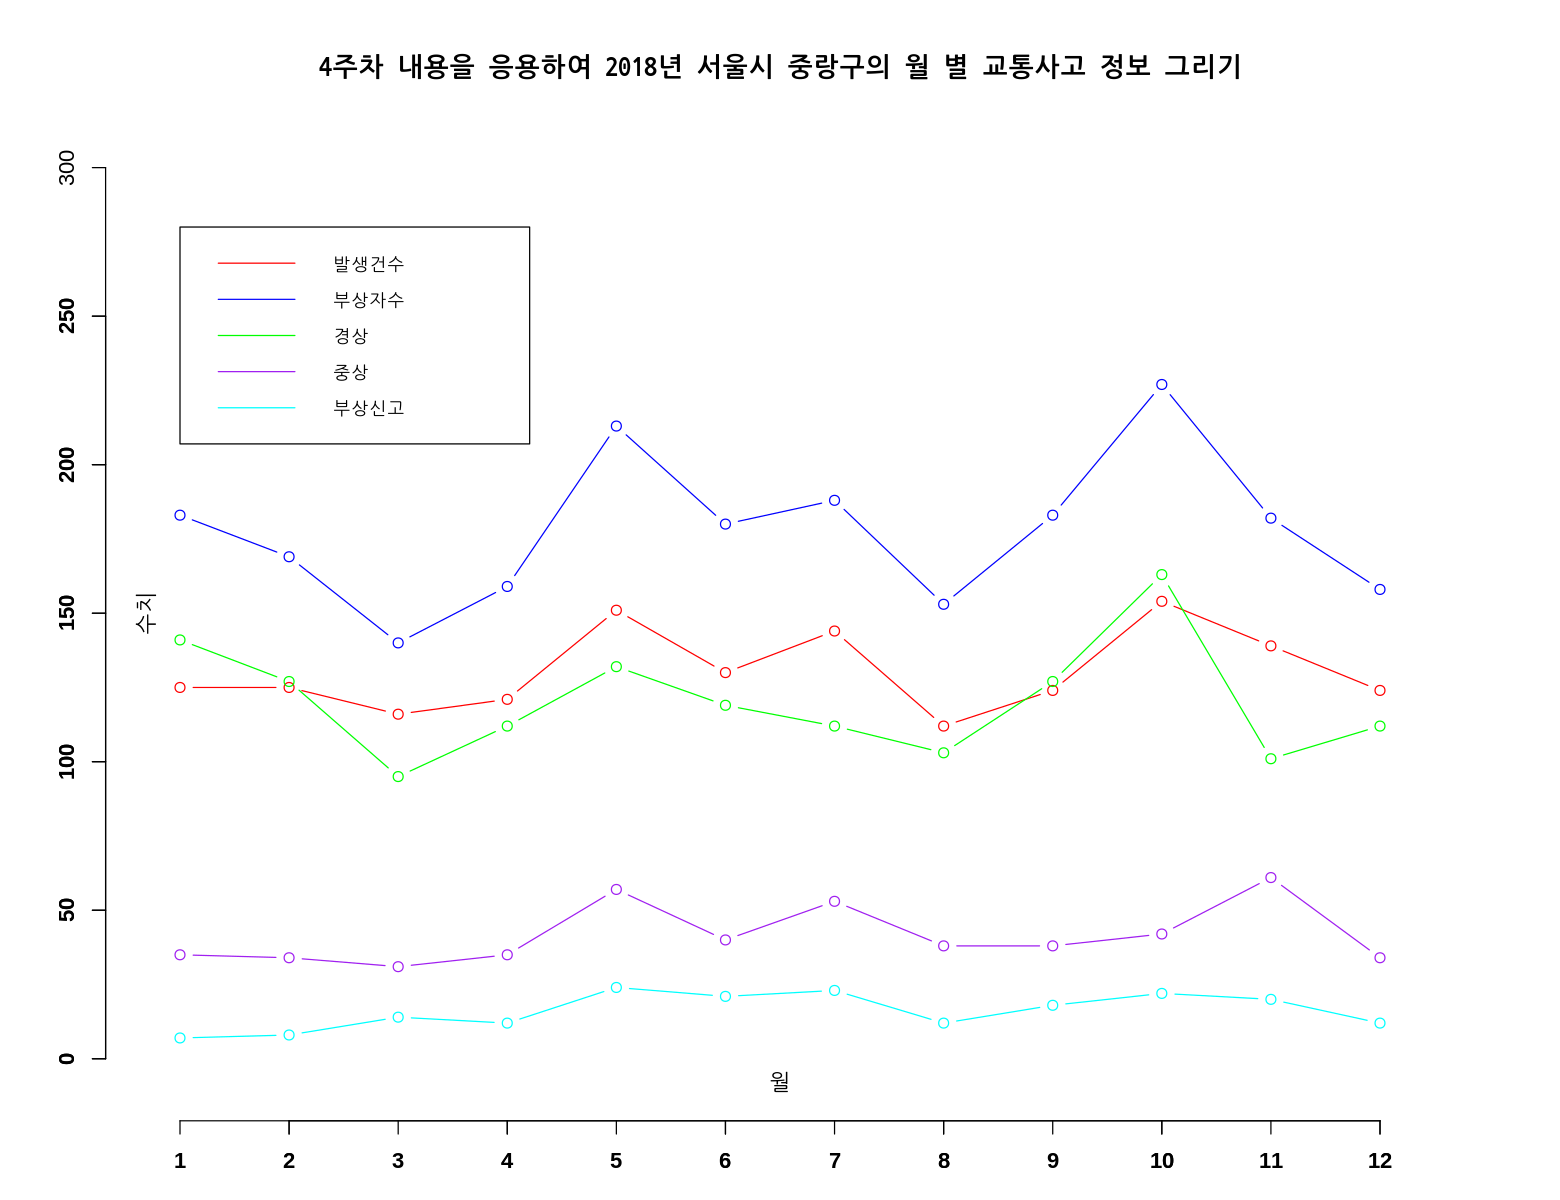

In [70]:
options(repr.plot.width=13, repr.plot.height=10)

par(bg = 'white', mar = c(4,5,5,5), bty = 'n', cex = 1.1, mgp = c(-1,2,1))
plot(df$발생건수, type = 'b', col = 'red', ann = F, ylim = c(0, 300), oma = c(2,2,2,2))
lines(df$부상자수, col = 'blue', type = 'b')
lines(df$경상, col = 'green', type = 'b')
lines(df$중상, col = 'purple', type = 'b')
lines(df$부상신고, col = 'cyan', type = 'b')
title ("4주차 내용을 응용하여 2018년 서울시 중랑구의 월 별 교통사고 정보 그리기", xlab = "월", ylab = "수치", cex = 3)
axis(1, at = 1:12, font = 2)
axis(2, at = c(0, 50, 100, 150, 200, 250), font = 2)
legend(1 ,280, cex = 0.8, c("발생건수", "부상자수", "경상", "중상", "부상신고"), col = c("red", ' blue', 'green', 'purple', 'cyan'), lty = 1, lwd=1)

Warning message in par(bg = "yellow", mar = c(4, 5, 10, 5), bty = "7", cex = 1.1, :
“`mgp[1:3]' are of differing sign”


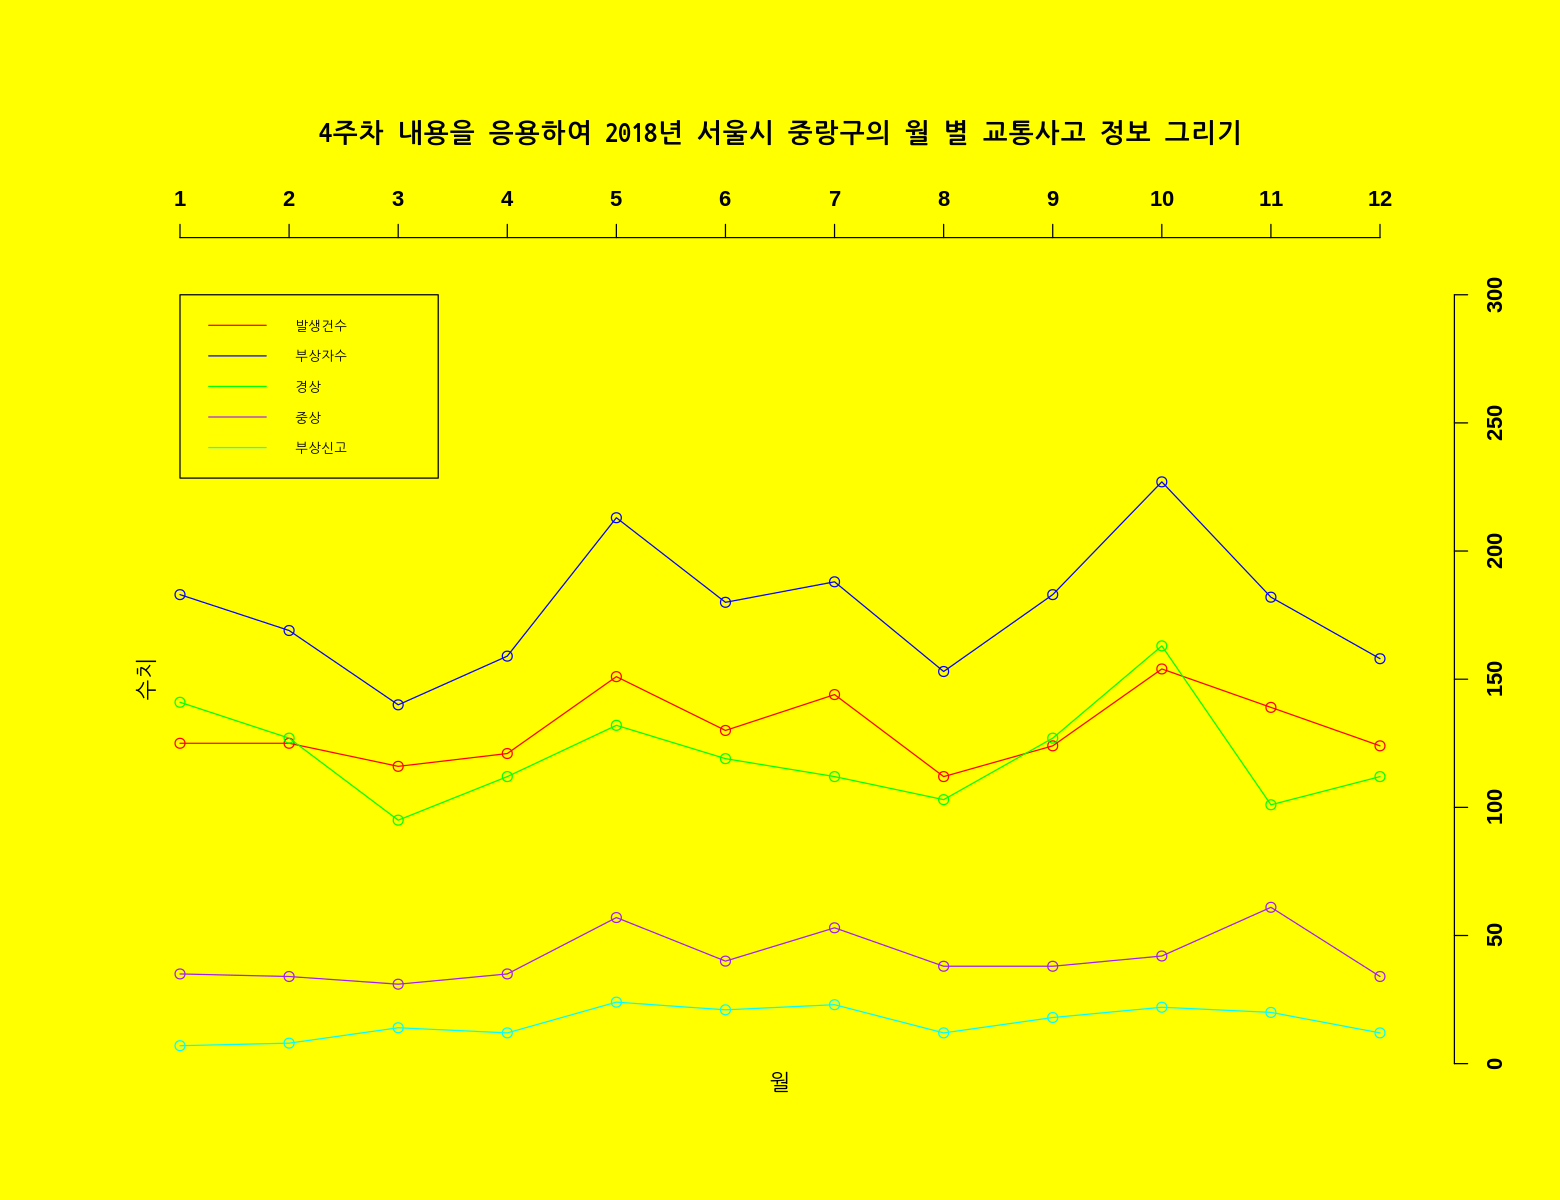

In [71]:
options(repr.plot.width=13, repr.plot.height=10)

par(bg = 'yellow', mar = c(4,5,10,5), bty = '7', cex = 1.1, mgp = c(-1,2,1))
plot(df$발생건수, type = 'o', col = 'red', ann = F, axes = F, ylim = c(0, 300))
par(new=T)
plot(df$부상자수, type = 'o', col = 'blue', ann = F, axes = F, ylim = c(0, 300))
par(new=T)
plot(df$경상, type = 'o', col = 'green', ann = F, axes = F, ylim = c(0, 300))
par(new=T)
plot(df$중상, type = 'o', col = 'purple', ann = F, axes = F, ylim = c(0, 300))
par(new=T)
plot(df$부상신고, type = 'o', col = 'cyan', ann = F, axes = F, ylim = c(0, 300))

title ("4주차 내용을 응용하여 2018년 서울시 중랑구의 월 별 교통사고 정보 그리기", xlab = "월", ylab = "수치", cex = 3)
axis(3, at = 1:12, font = 2)
axis(4, at = c(0, 50, 100, 150, 200, 250, 300), font = 2)
legend(1 ,300, cex = 0.6, c("발생건수", "부상자수", "경상", "중상", "부상신고"), col = c("red", ' blue', 'green', 'purple', 'cyan'), lty = 1, lwd=1)

Warning message in par(bg = "white", mar = c(4, 5, 10, 5), bty = "7", cex = 1.1, :
“`mgp[1:3]' are of differing sign”


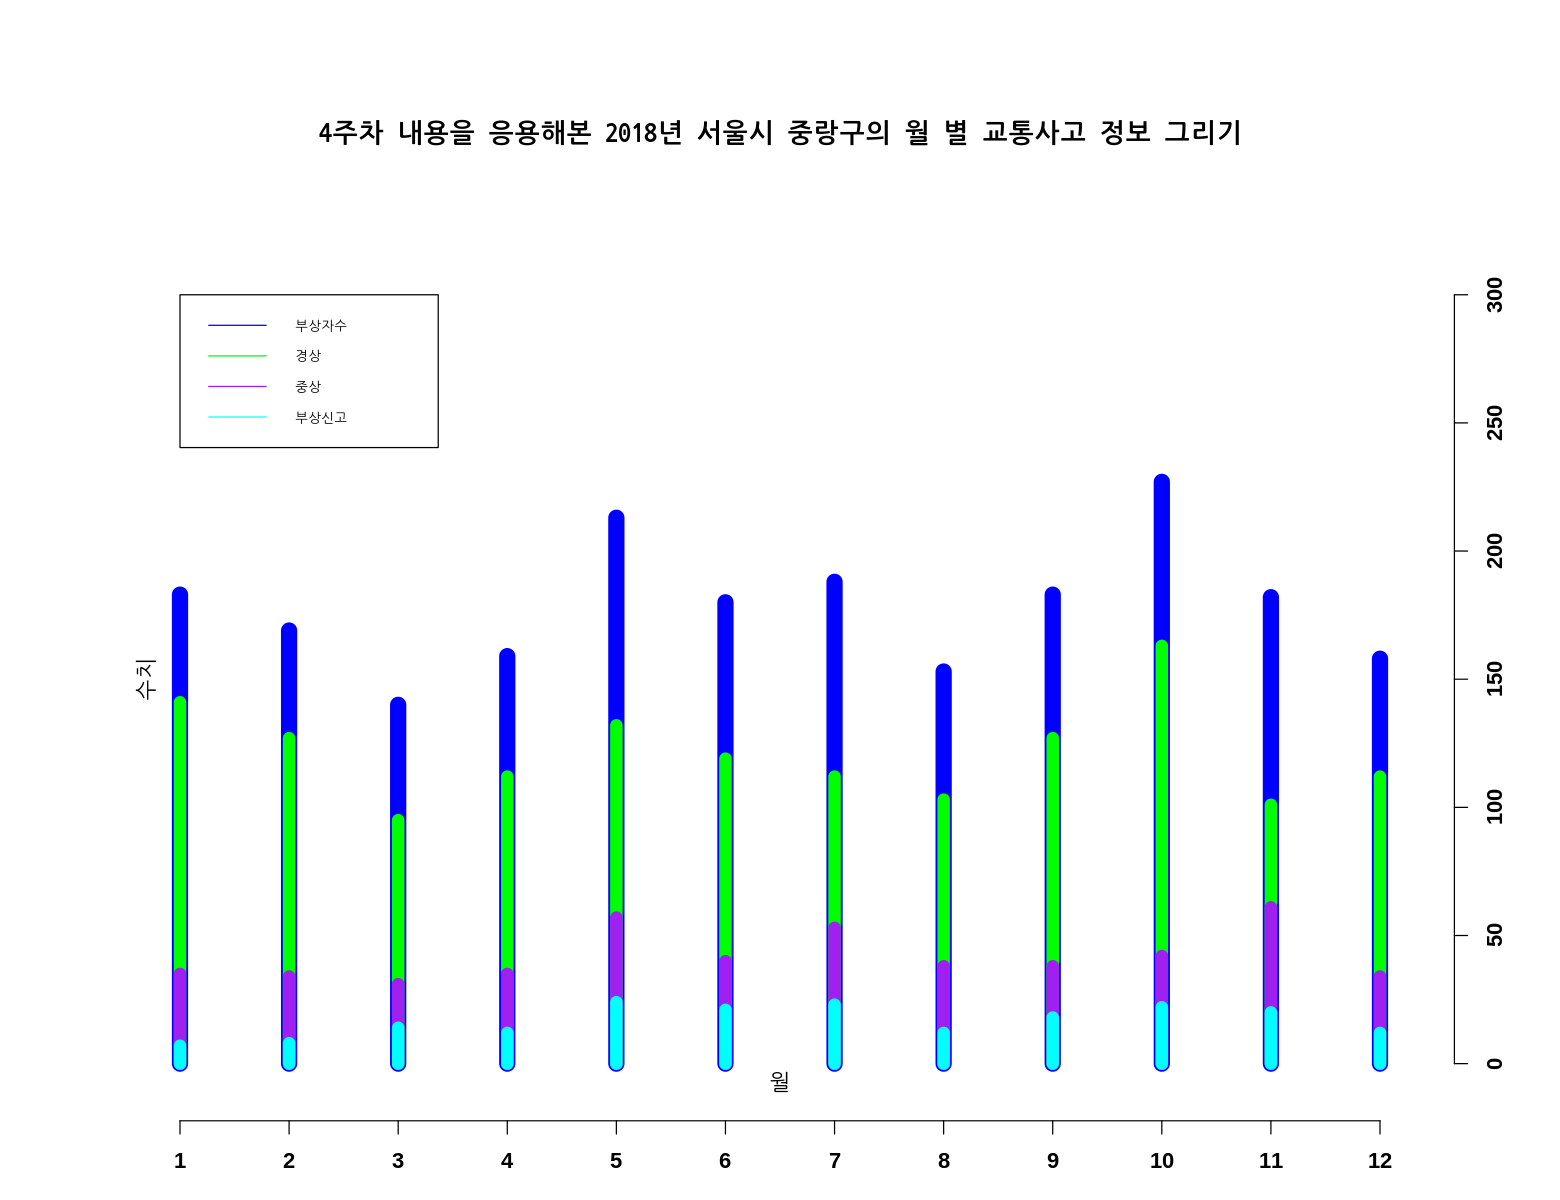

In [72]:
options(repr.plot.width=13, repr.plot.height=10)

par(bg = 'white', mar = c(4,5,10,5), bty = '7', cex = 1.1, mgp = c(-1,2,1))
plot(df$부상자수, type = 'h', col = 'blue', ann = F, axes = F, ylim = c(0, 300), lwd= 13)
par(new=T)
plot(df$경상, type = 'h', col = 'green', ann = F, axes = F, ylim = c(0, 300), lwd= 10)
par(new=T)
plot(df$중상, type = 'h', col = 'purple', ann = F, axes = F, ylim = c(0, 300), lwd= 10)
par(new=T)
plot(df$부상신고, type = 'h', col = 'cyan', ann = F, axes = F, ylim = c(0, 300), lwd= 10)

title ("4주차 내용을 응용해본 2018년 서울시 중랑구의 월 별 교통사고 정보 그리기", xlab = "월", ylab = "수치", cex = 3)
axis(1, at = 1:12, font = 2)
axis(4, at = c(0, 50, 100, 150, 200, 250, 300), font = 2)
legend(1 ,300, cex = 0.6, c("부상자수", "경상", "중상", "부상신고"), col = c('blue', 'green', 'purple', 'cyan'), lty = 1, lwd=1)

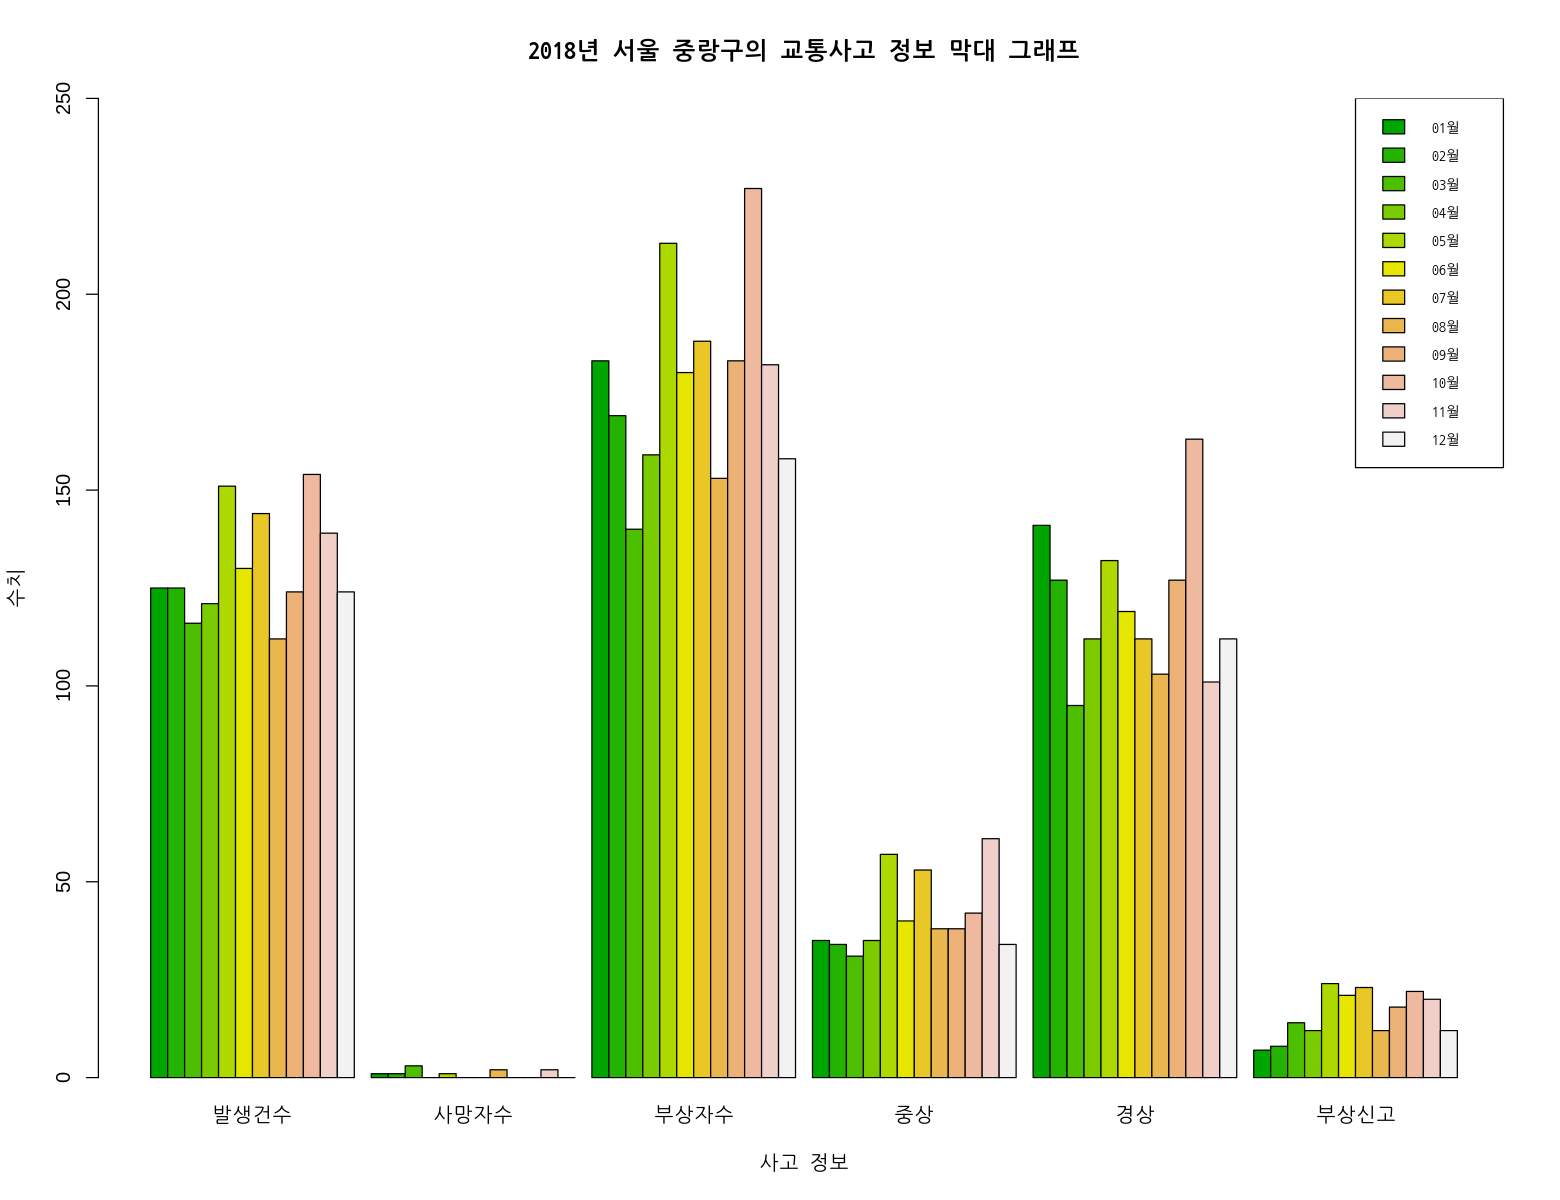

In [93]:
mdf <- as.matrix(df[-1])

barplot(mdf, col = terrain.colors(12), beside = T, ylim = c(0,250),
       main = "2018년 서울 중랑구의 교통사고 정보 막대 그래프", xlab = "사고 정보", ylab = "수치")
legend(72 , 250, unique(df$월) , cex=0.7, fill = terrain.colors(12)) 

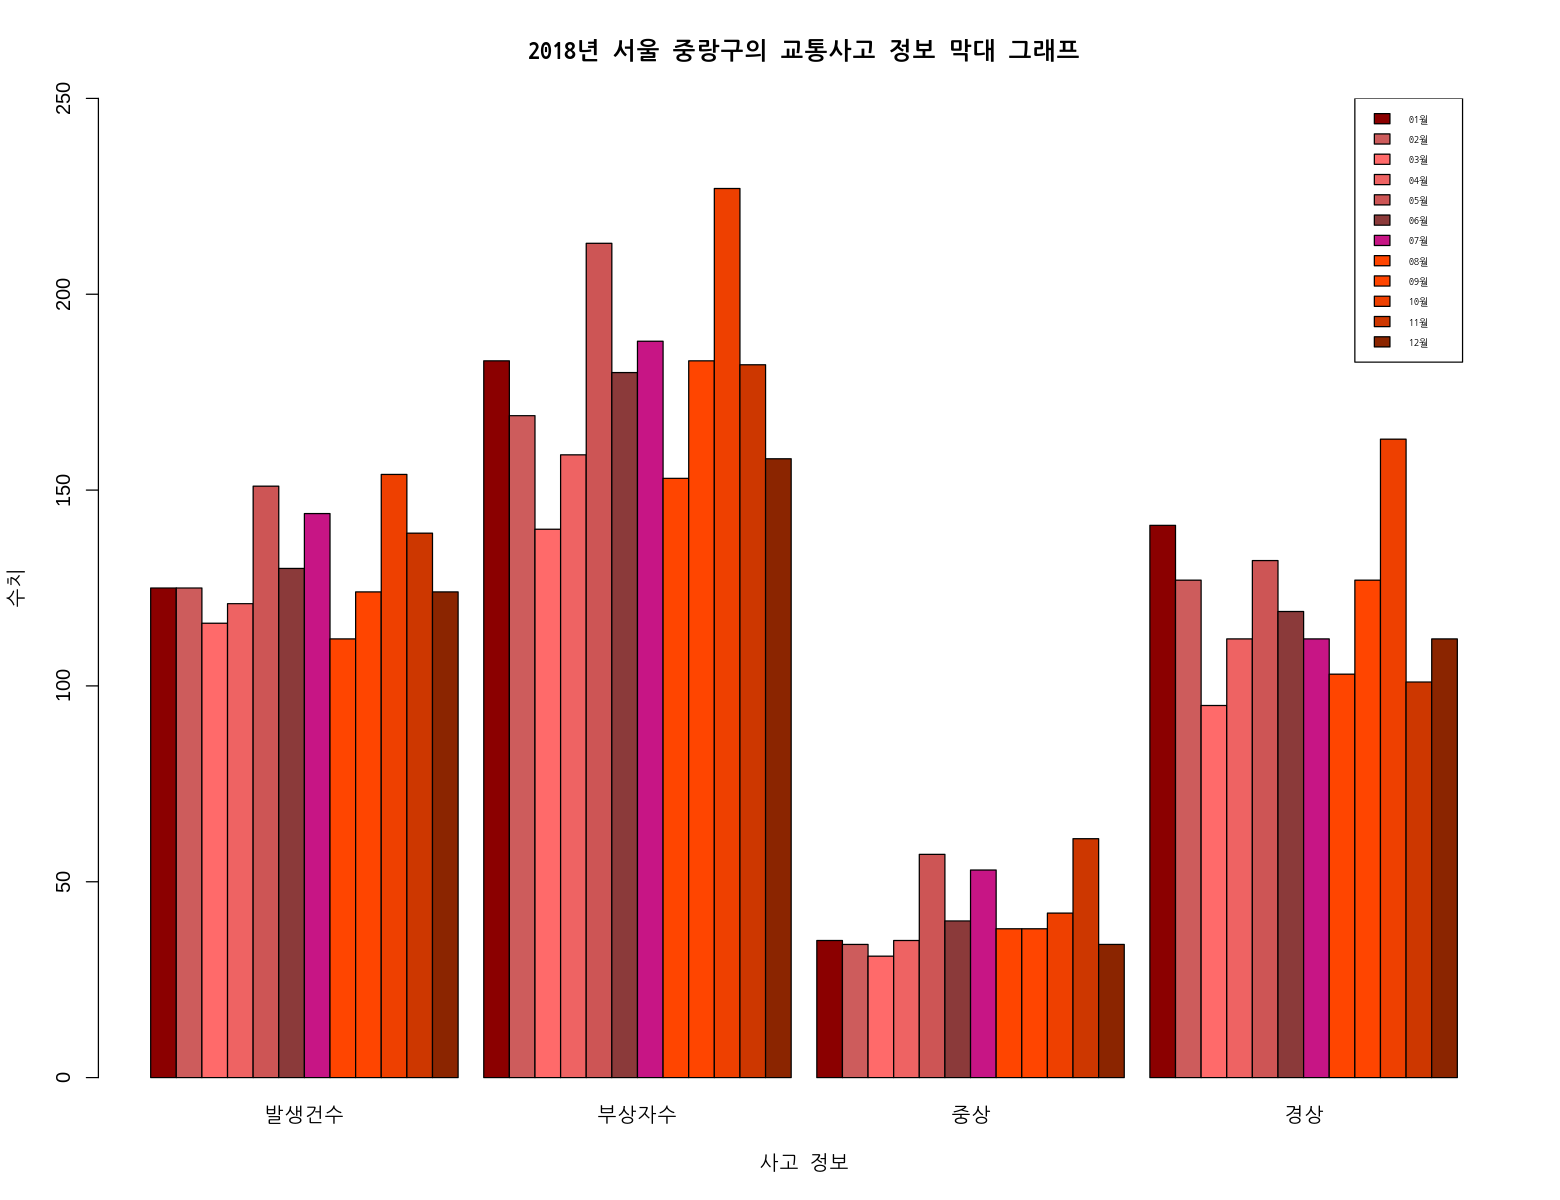

In [74]:
df_2456 <- df[c(2,4,5,6)]

mdf_2456 <- as.matrix(df_2456)
col = grep('red', colors(), value=T)
barplot(mdf_2456, col = col[1:12], beside=T, 
      main = "2018년 서울 중랑구의 교통사고 정보 막대 그래프", xlab = "사고 정보", ylab = "수치", ylim = c(0,250))
legend(48 , 250, unique(df$월) , cex=0.5, fill = col[1:12]) 

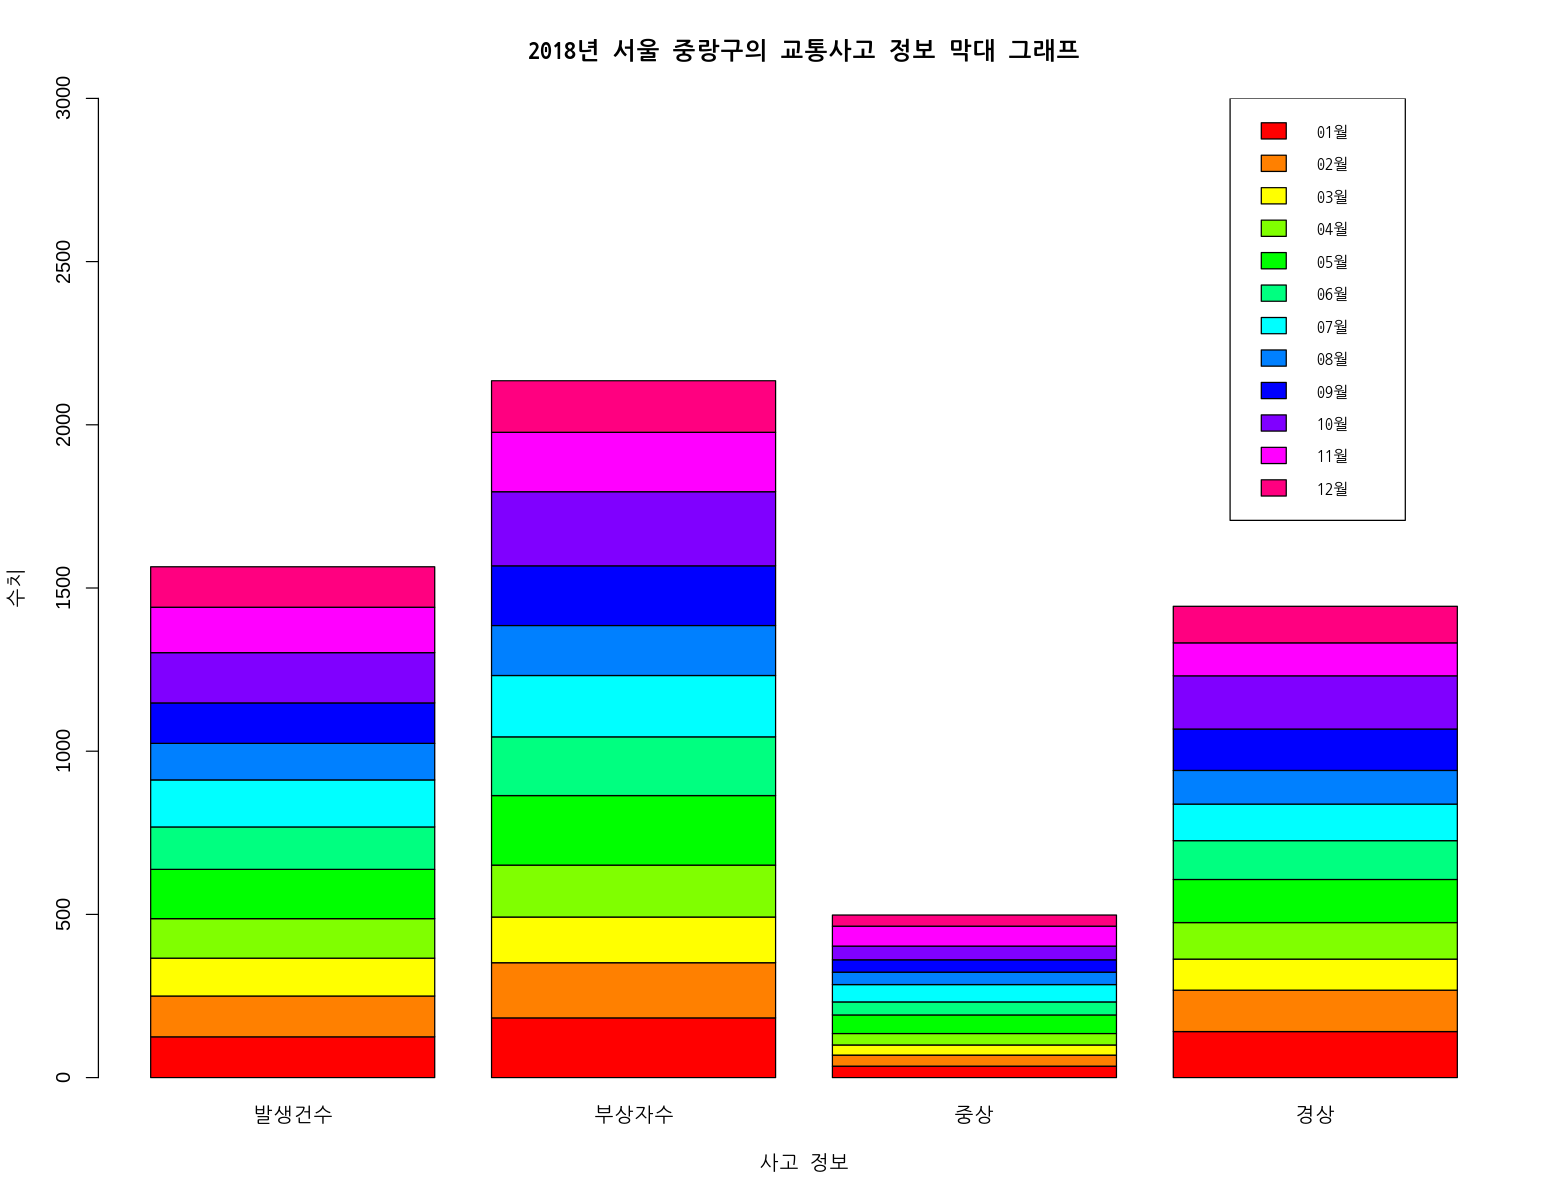

In [75]:
df_2456 <- df[c(2,4,5,6)]

mdf_2456 <- as.matrix(df_2456)
barplot(mdf_2456, col = rainbow(12), 
    main = "2018년 서울 중랑구의 교통사고 정보 막대 그래프", xlab = "사고 정보", ylab = "수치", ylim = c(0,3000))
legend(4 ,3000, unique(df$월) , cex=0.8, fill = rainbow(12)) 

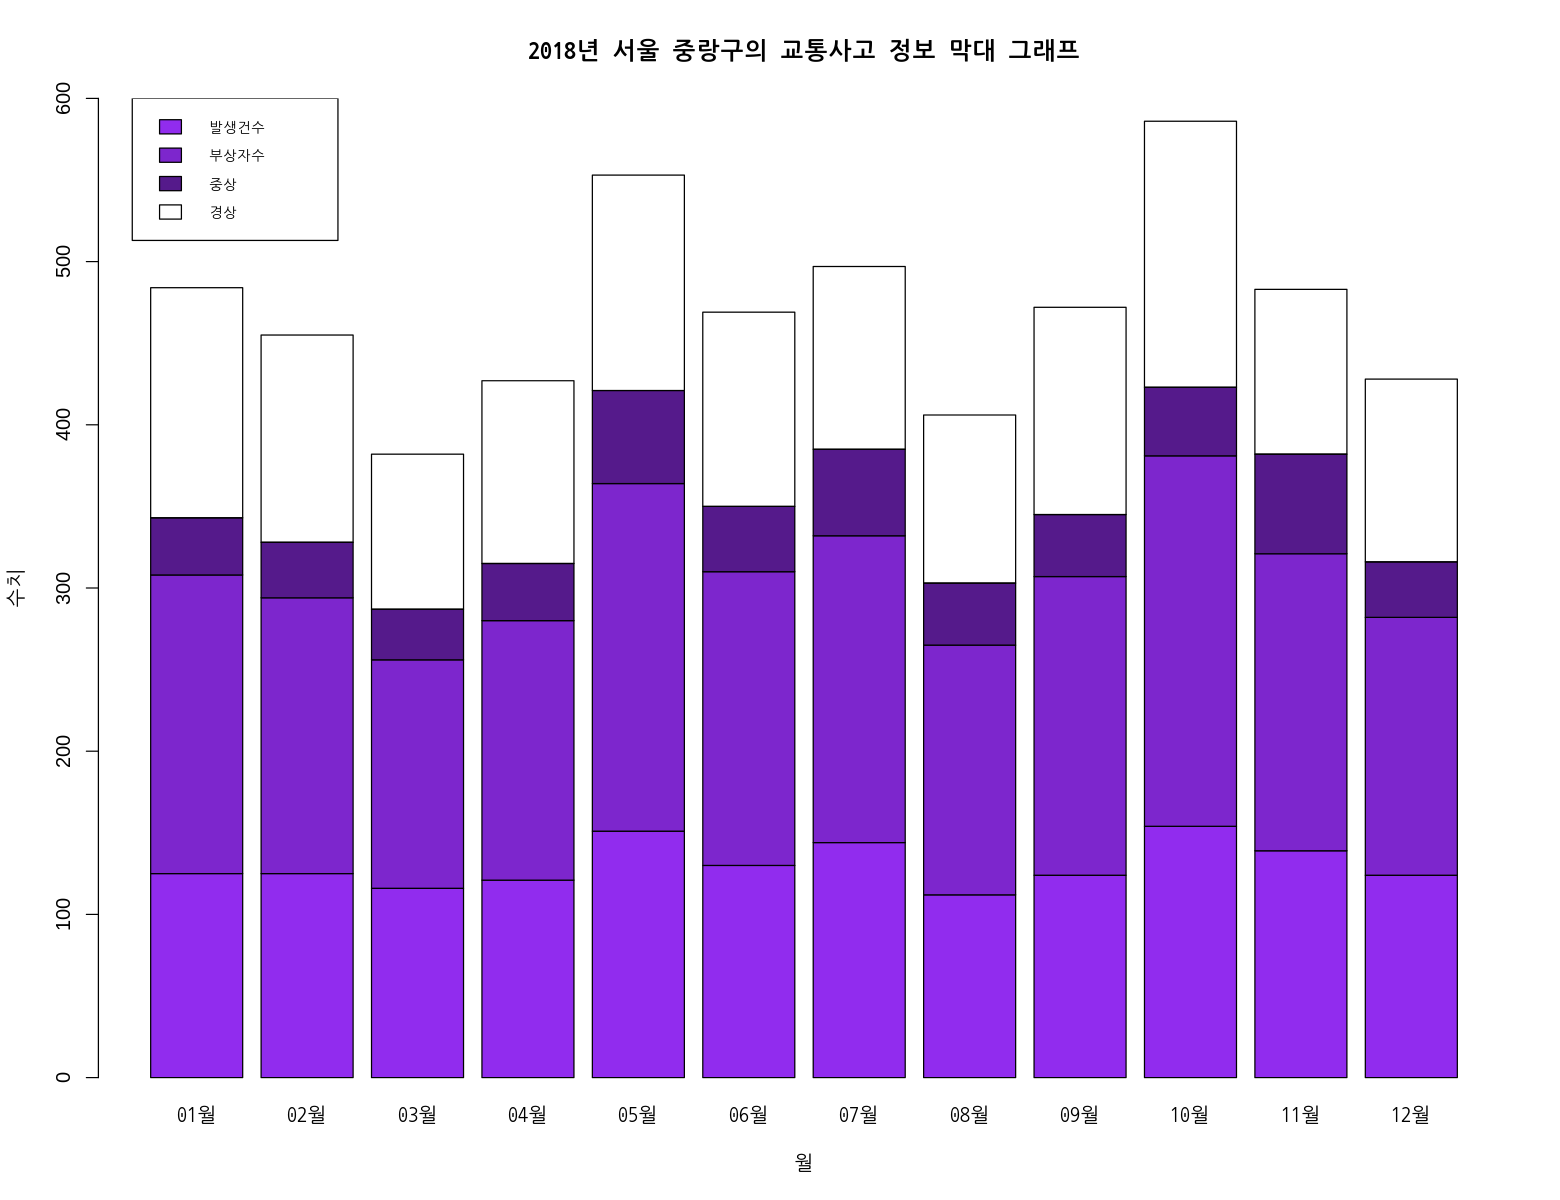

In [76]:
df_2456 <- df[c(2,4,5,6)]

mdf_2456 <- as.matrix(df_2456)
col = grep('purple', colors(), value=T)
barplot(t(mdf_2456), col = col[8:12], names.arg = df$월, 
    main = "2018년 서울 중랑구의 교통사고 정보 막대 그래프", xlab = "월", ylab = "수치", ylim = c(0,600))
legend(0 ,600, names(df_2456) , cex=0.7, fill = col[8:12]) 

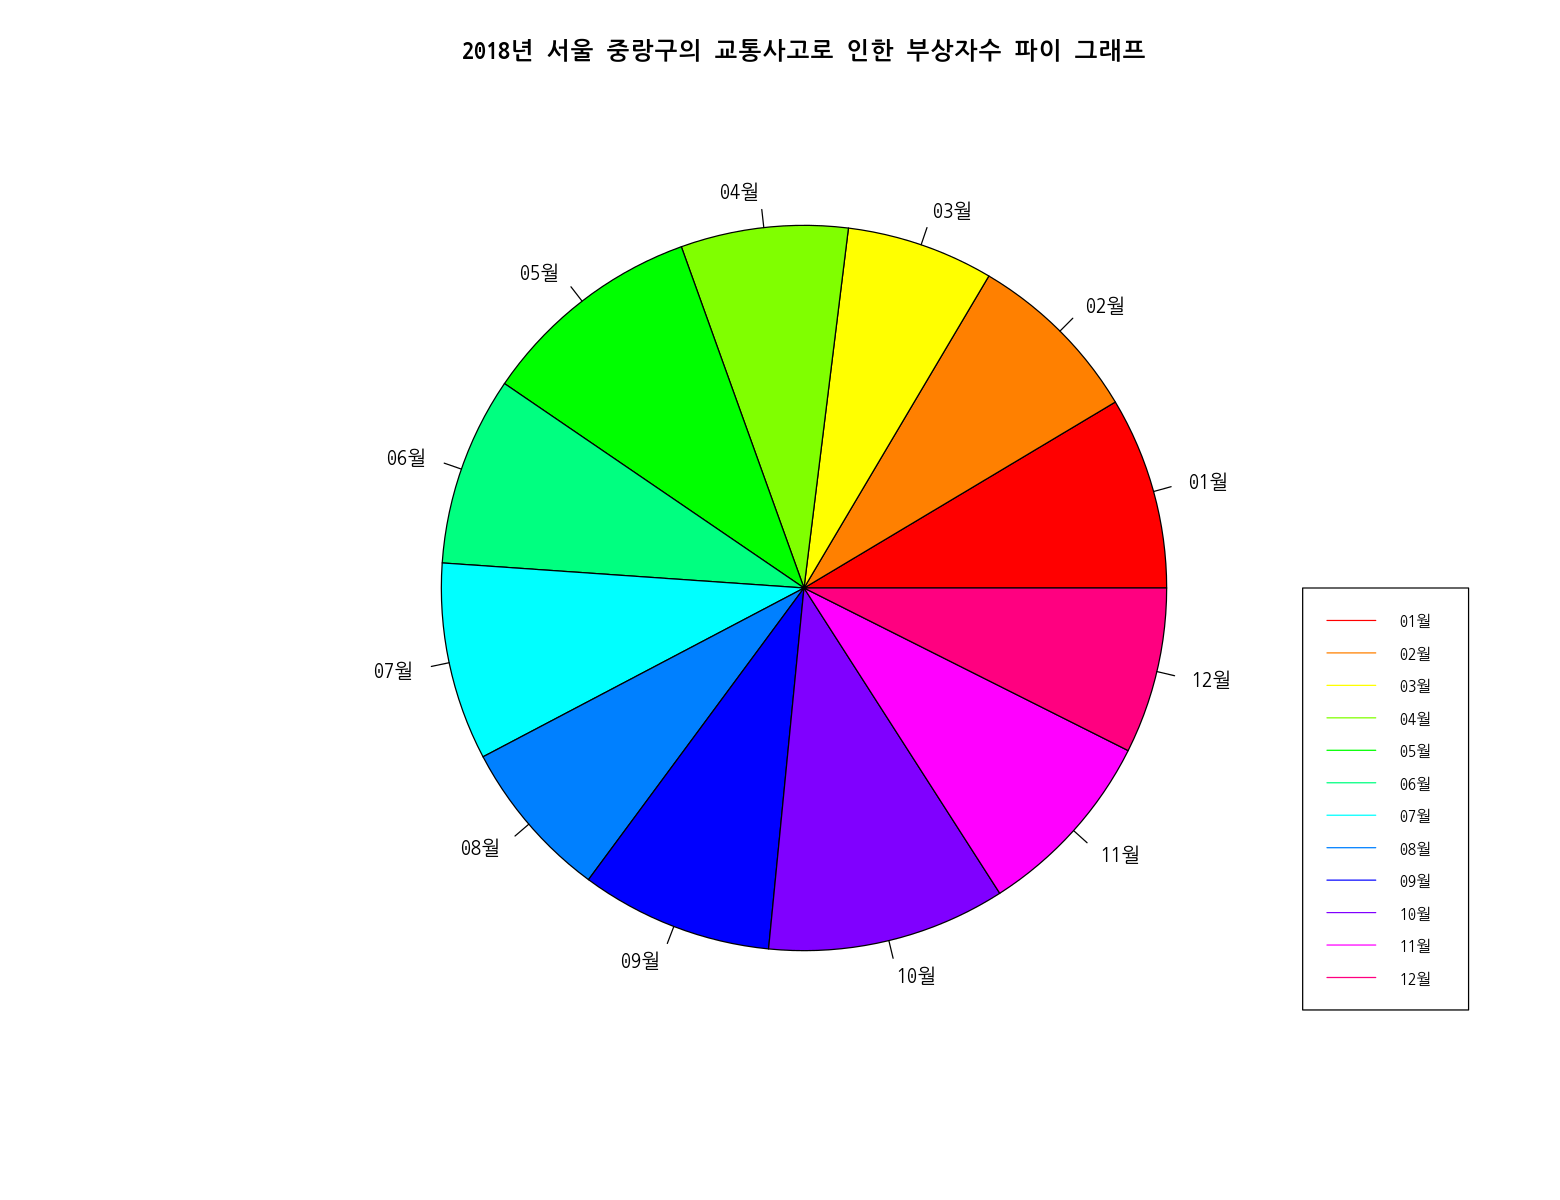

In [94]:
pie(df$부상자수, labels = unique(df$월), col = rainbow(12), main = "2018년 서울 중랑구의 교통사고로 인한 부상자수 파이 그래프")
legend(1.1 , 0, cex = 0.8,  unique(df$월), col = rainbow(12), lty = 1, lwd=1)

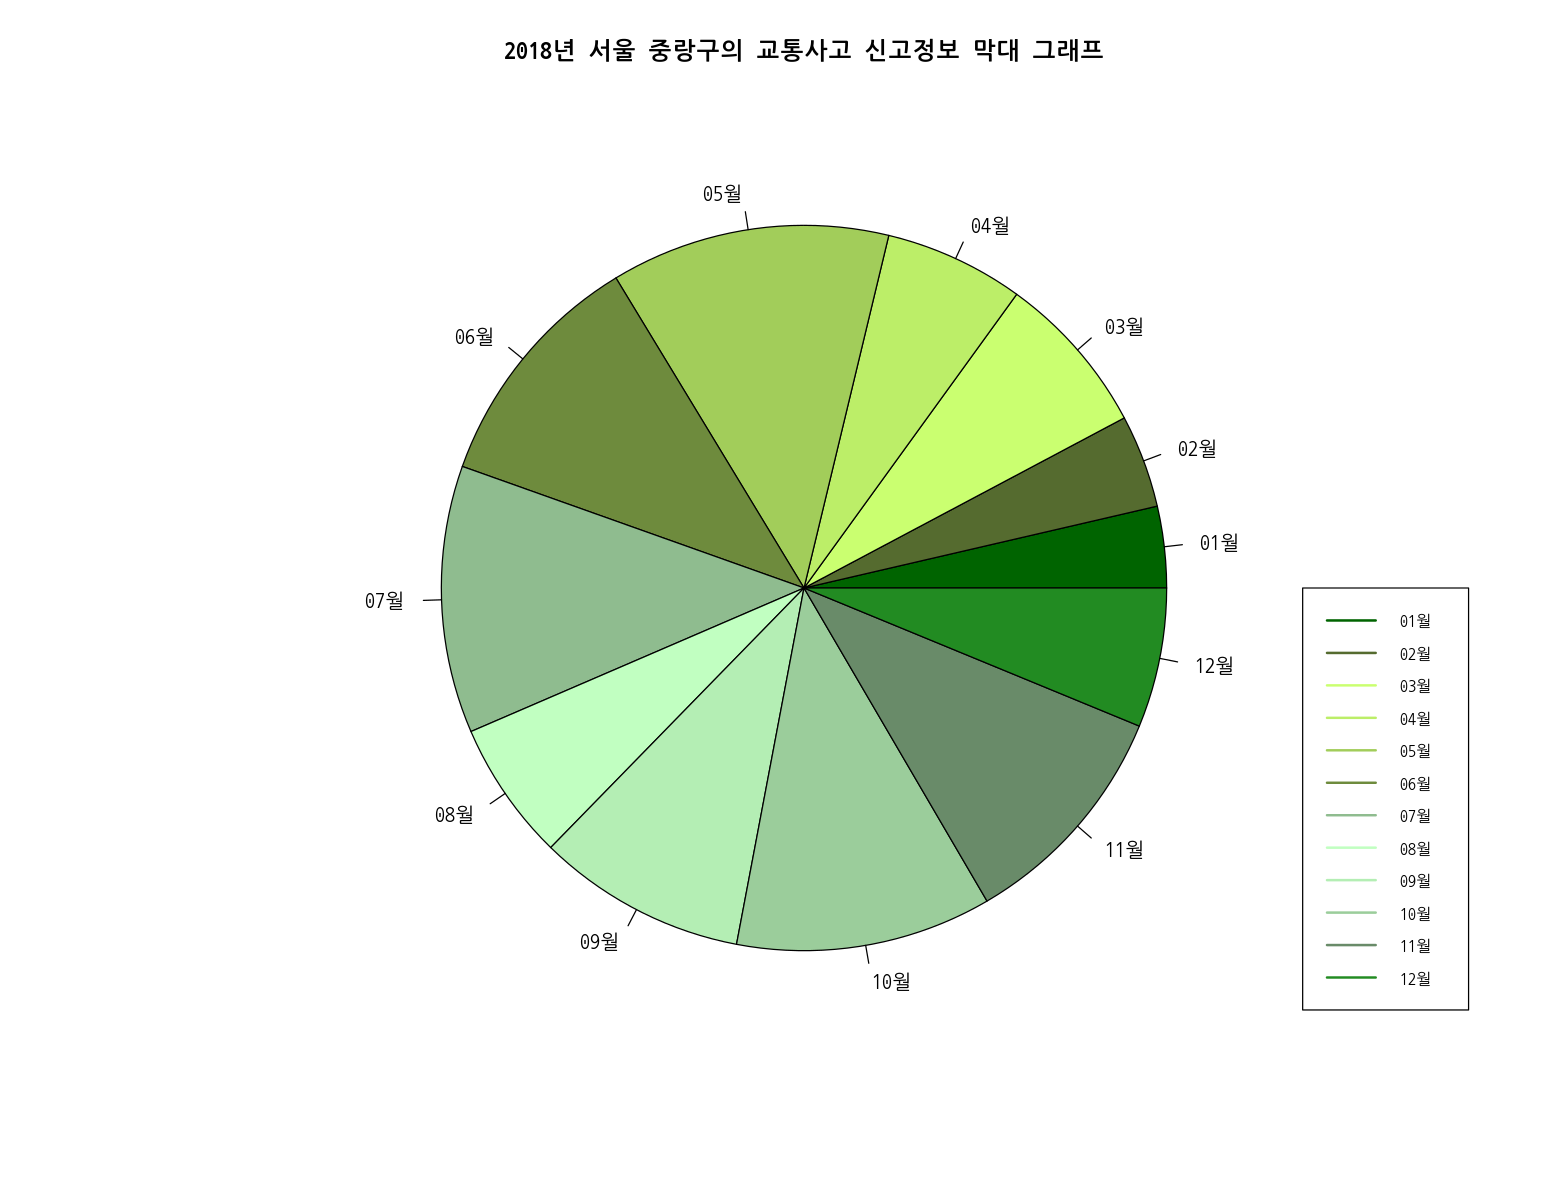

In [95]:
gre <- grep('green', colors(), value=T)
gre <- gre[0:12]

pie(df$부상신고, labels = unique(df$월), col = gre, main = "2018년 서울 중랑구의 교통사고 신고정보 막대 그래프")
legend(1.1 , 0, cex = 0.8,  unique(df$월), col = gre, lty = 1, lwd=2)

In [80]:
unique(car$시도)

[1] "서울" "부산" "경기" "강원" "충북" "충남" "전북" "전남" "경북" "경남"
[11] "제주" "대구" "인천" "광주" "대전" "울산" "세종"

In [81]:
df2 <- car %>% filter(시도 == "전북")
df3 <- df2 %>% group_by(시군구) %>% summarise(평균부상자수 = mean(부상자수))
df3

시군구,평균부상자수
<chr>,<dbl>
고창군,15.50000
군산시,126.75000
김제시,57.58333
남원시,35.41667
무주군,16.91667
부안군,37.41667
순창군,14.08333
완주군,35.33333
익산시,127.25000


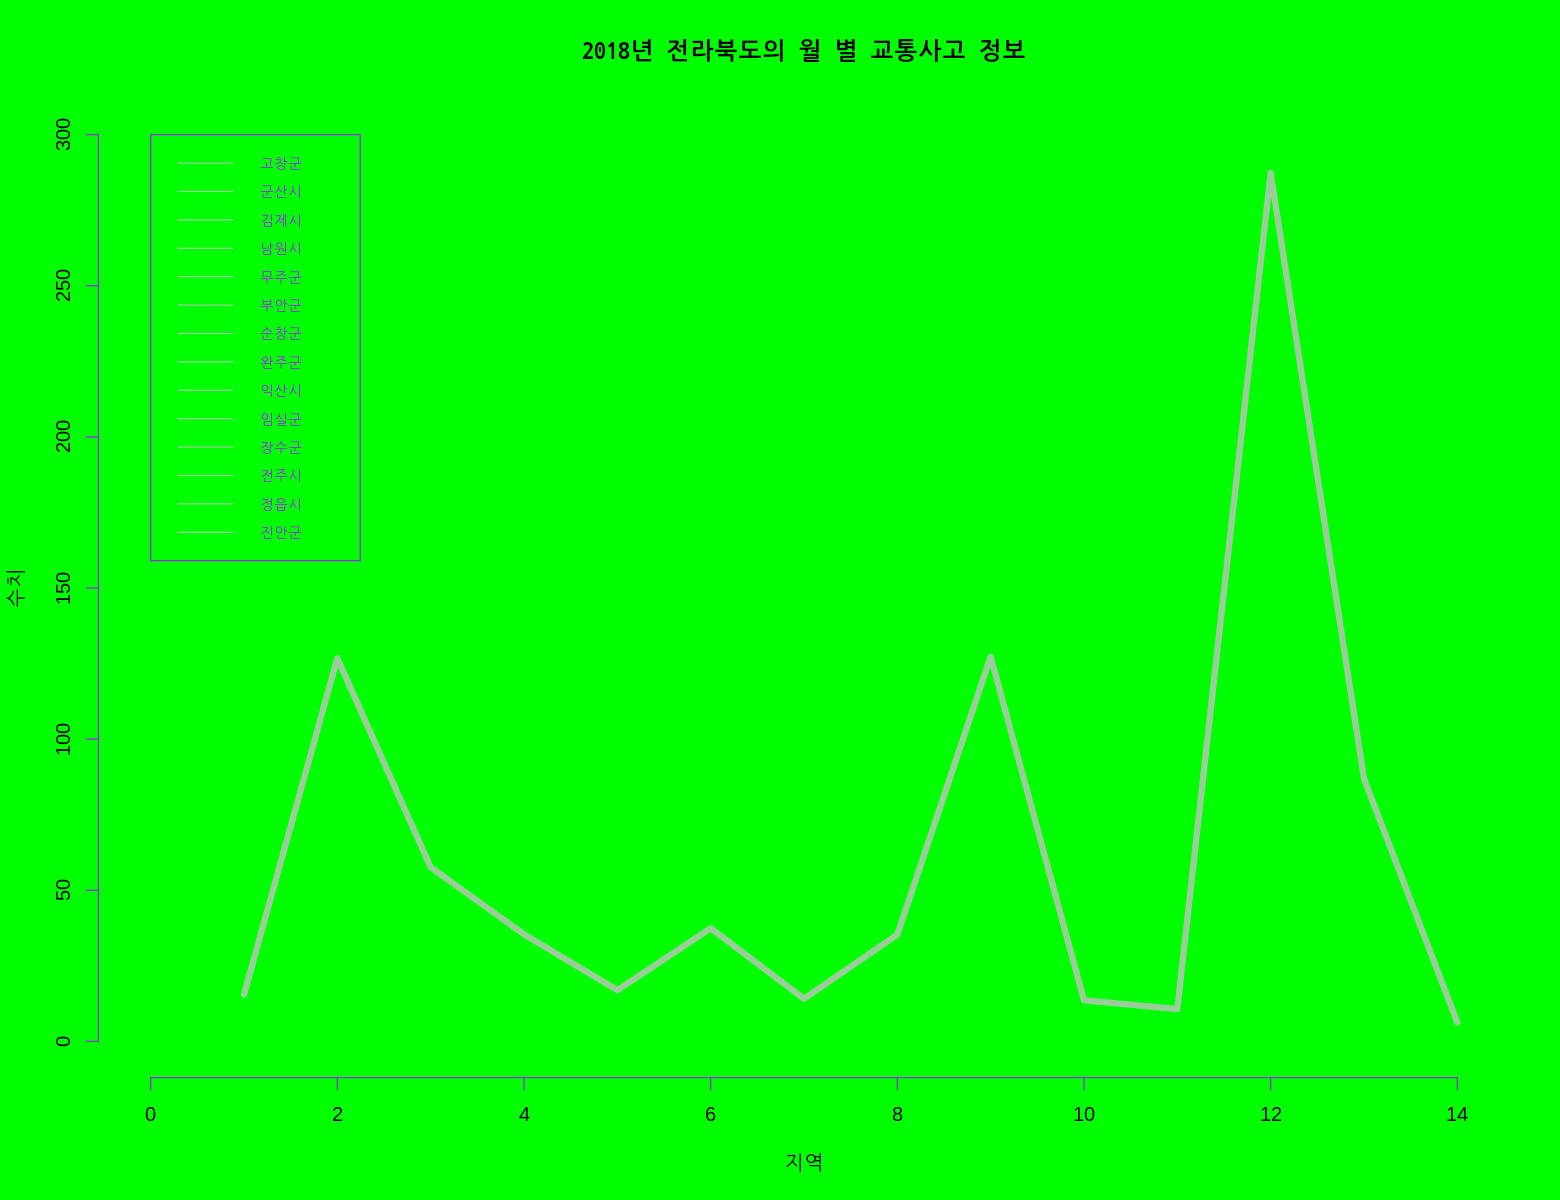

In [82]:
col = grep('green', colors(), value=T)

par(bg = 'green', bty = 'n', fg = 'purple')
plot(df3$평균부상자수, type = 'l', col = col[10], ylim = c(0, 300), xlim = c(0,14), lwd = 5, xlab = "지역", ylab = "수치",)
title ("2018년 전라북도의 월 별 교통사고 정보")
legend(0 ,300, cex = 0.7, unique(df3$시군구), col = col[10], lty = 1, lwd=1)

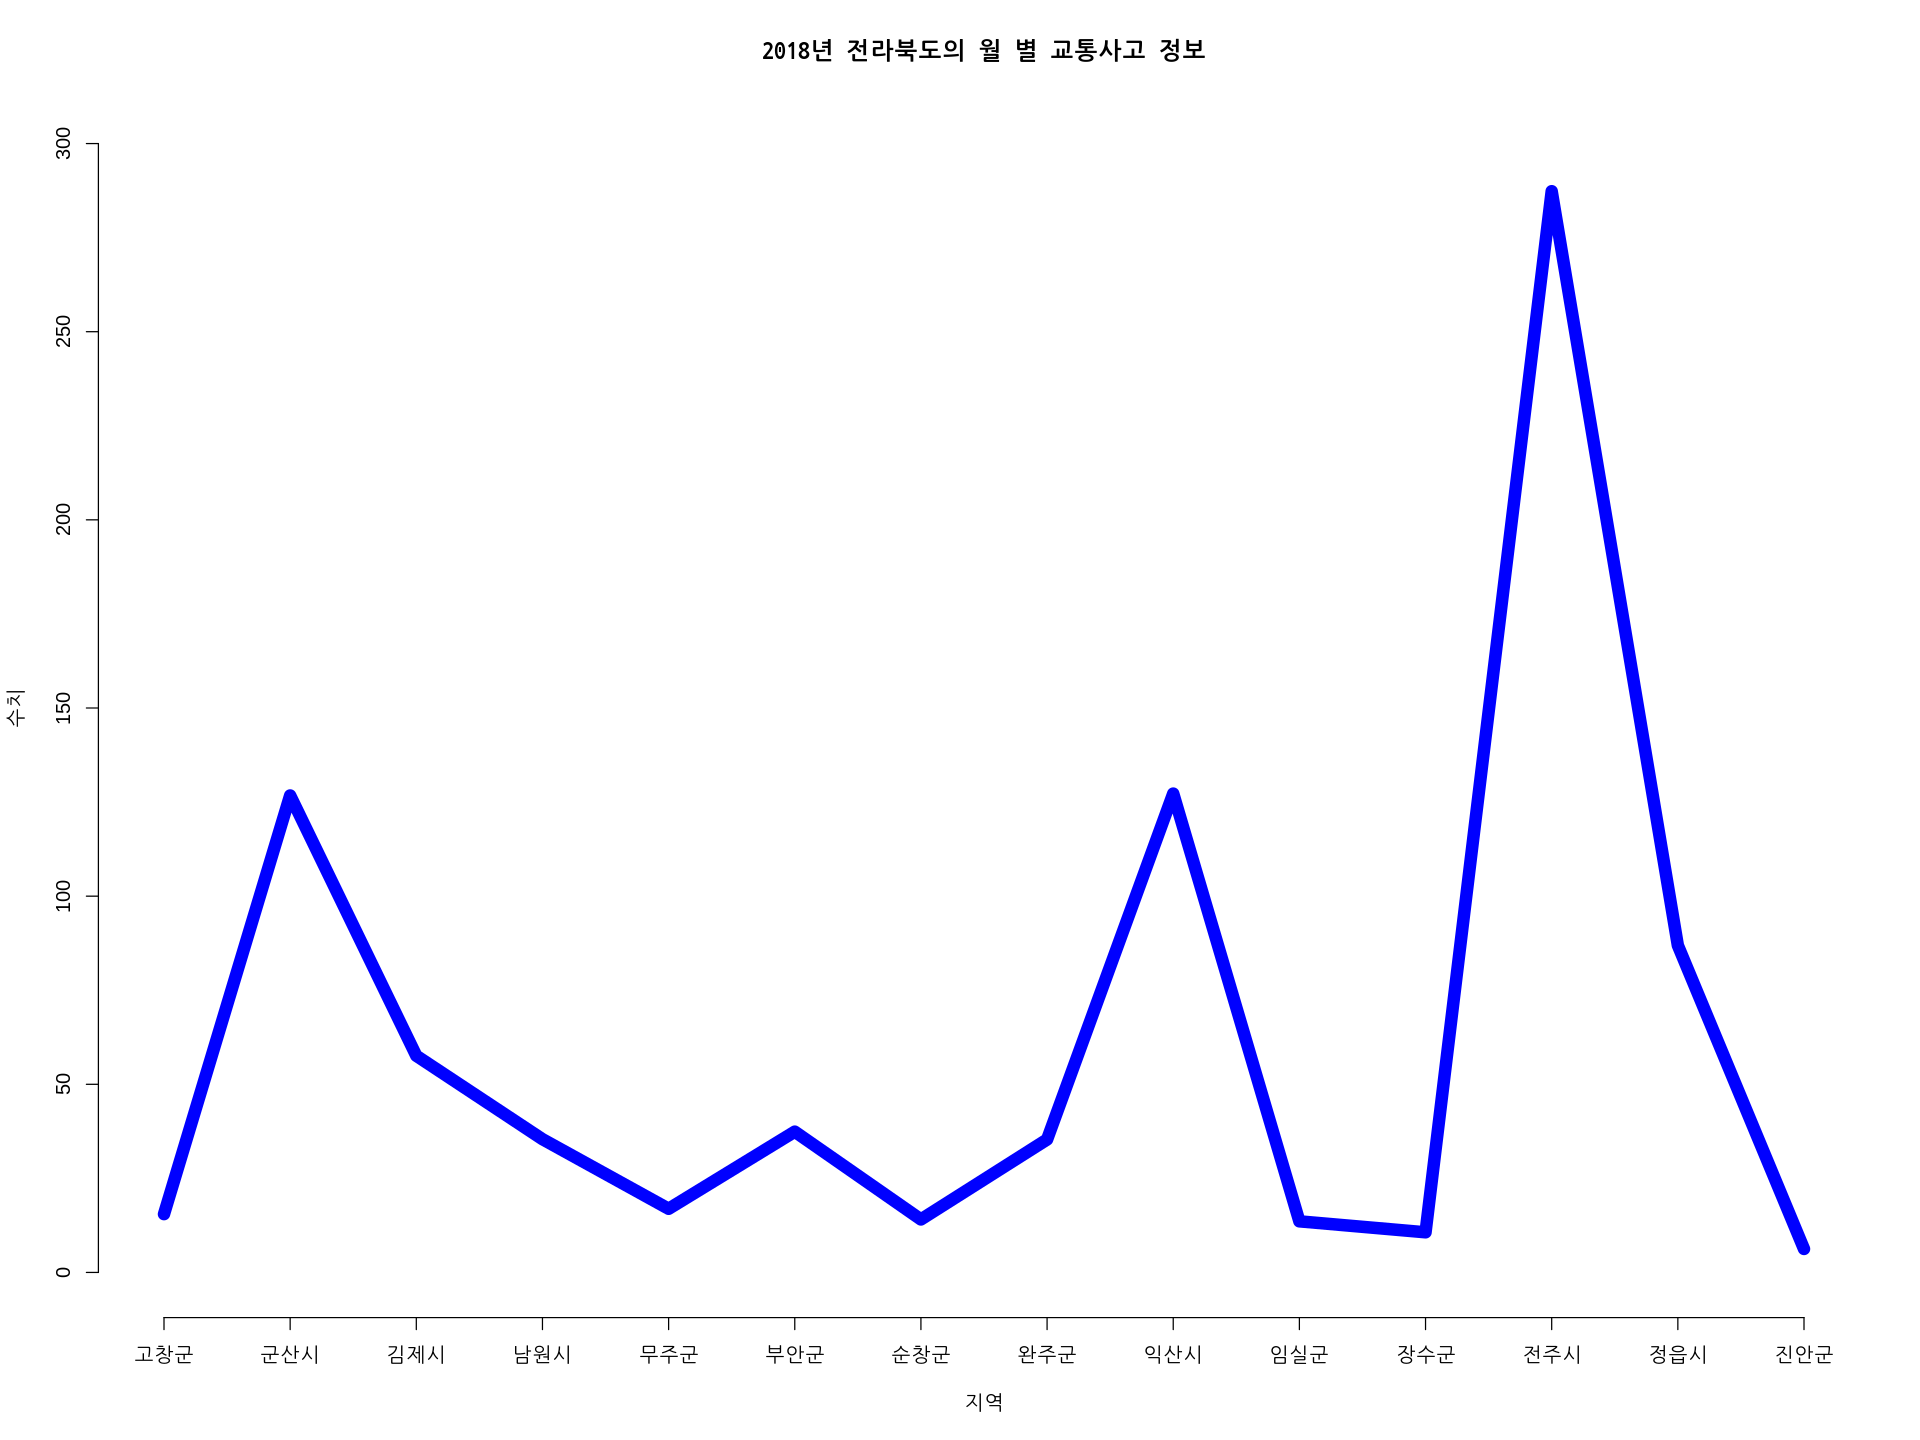

In [115]:
par(bg = 'white', bty = 'n')
plot(df3$평균부상자수, type = 'l', col = 'blue', axes=F, ann = F, ylim = c(0, 300), lwd = 10,)
title ("2018년 전라북도의 월 별 교통사고 정보", xlab = "지역", ylab = "수치", cex = 1.5)
axis(1, at = 1:14, labels = df3$시군구)
axis(2, at = c(0, 50, 100, 150, 200, 250, 300))

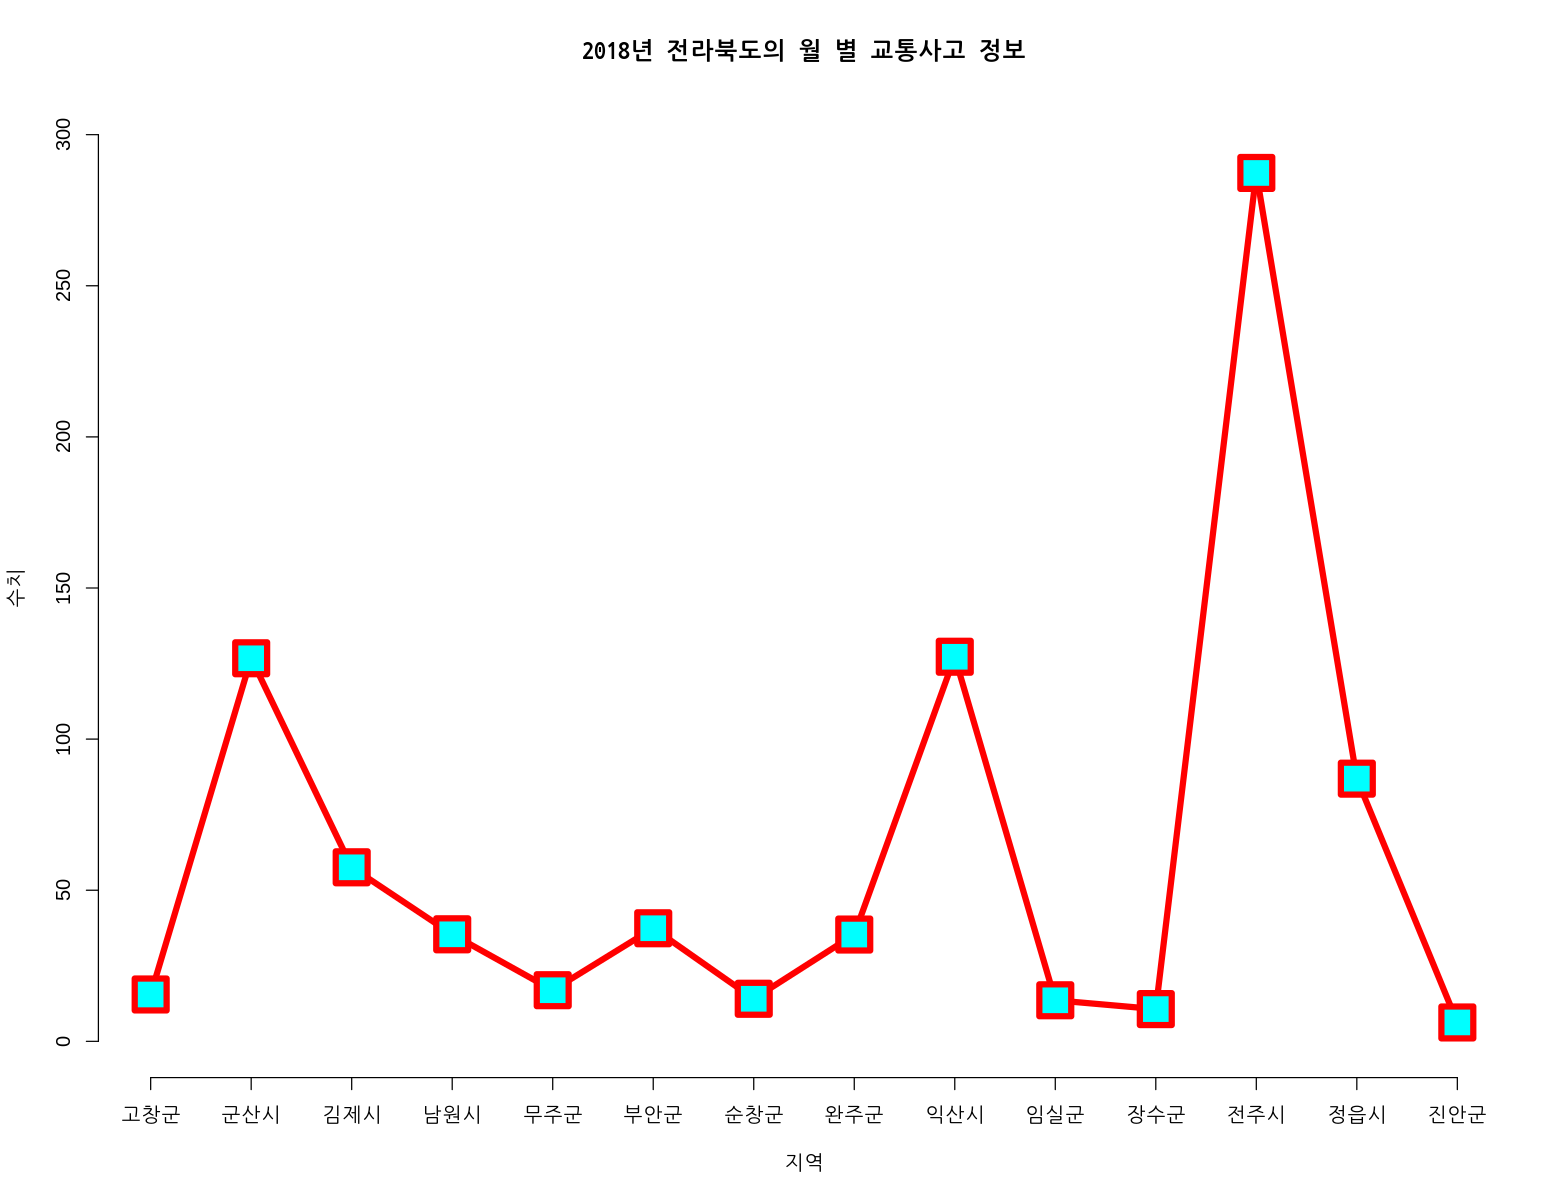

In [83]:
par(bg = 'white', bty = 'n')
plot(df3$평균부상자수, type = 'b', col = 'red', axes=F, ann = F, ylim = c(0, 300), lwd = 5, cex = 4, pch = 22, bg = 'cyan')
title ("2018년 전라북도의 월 별 교통사고 정보", xlab = "지역", ylab = "수치", cex = 1.5)
axis(1, at = 1:14, labels = df3$시군구)
axis(2, at = c(0, 50, 100, 150, 200, 250, 300))

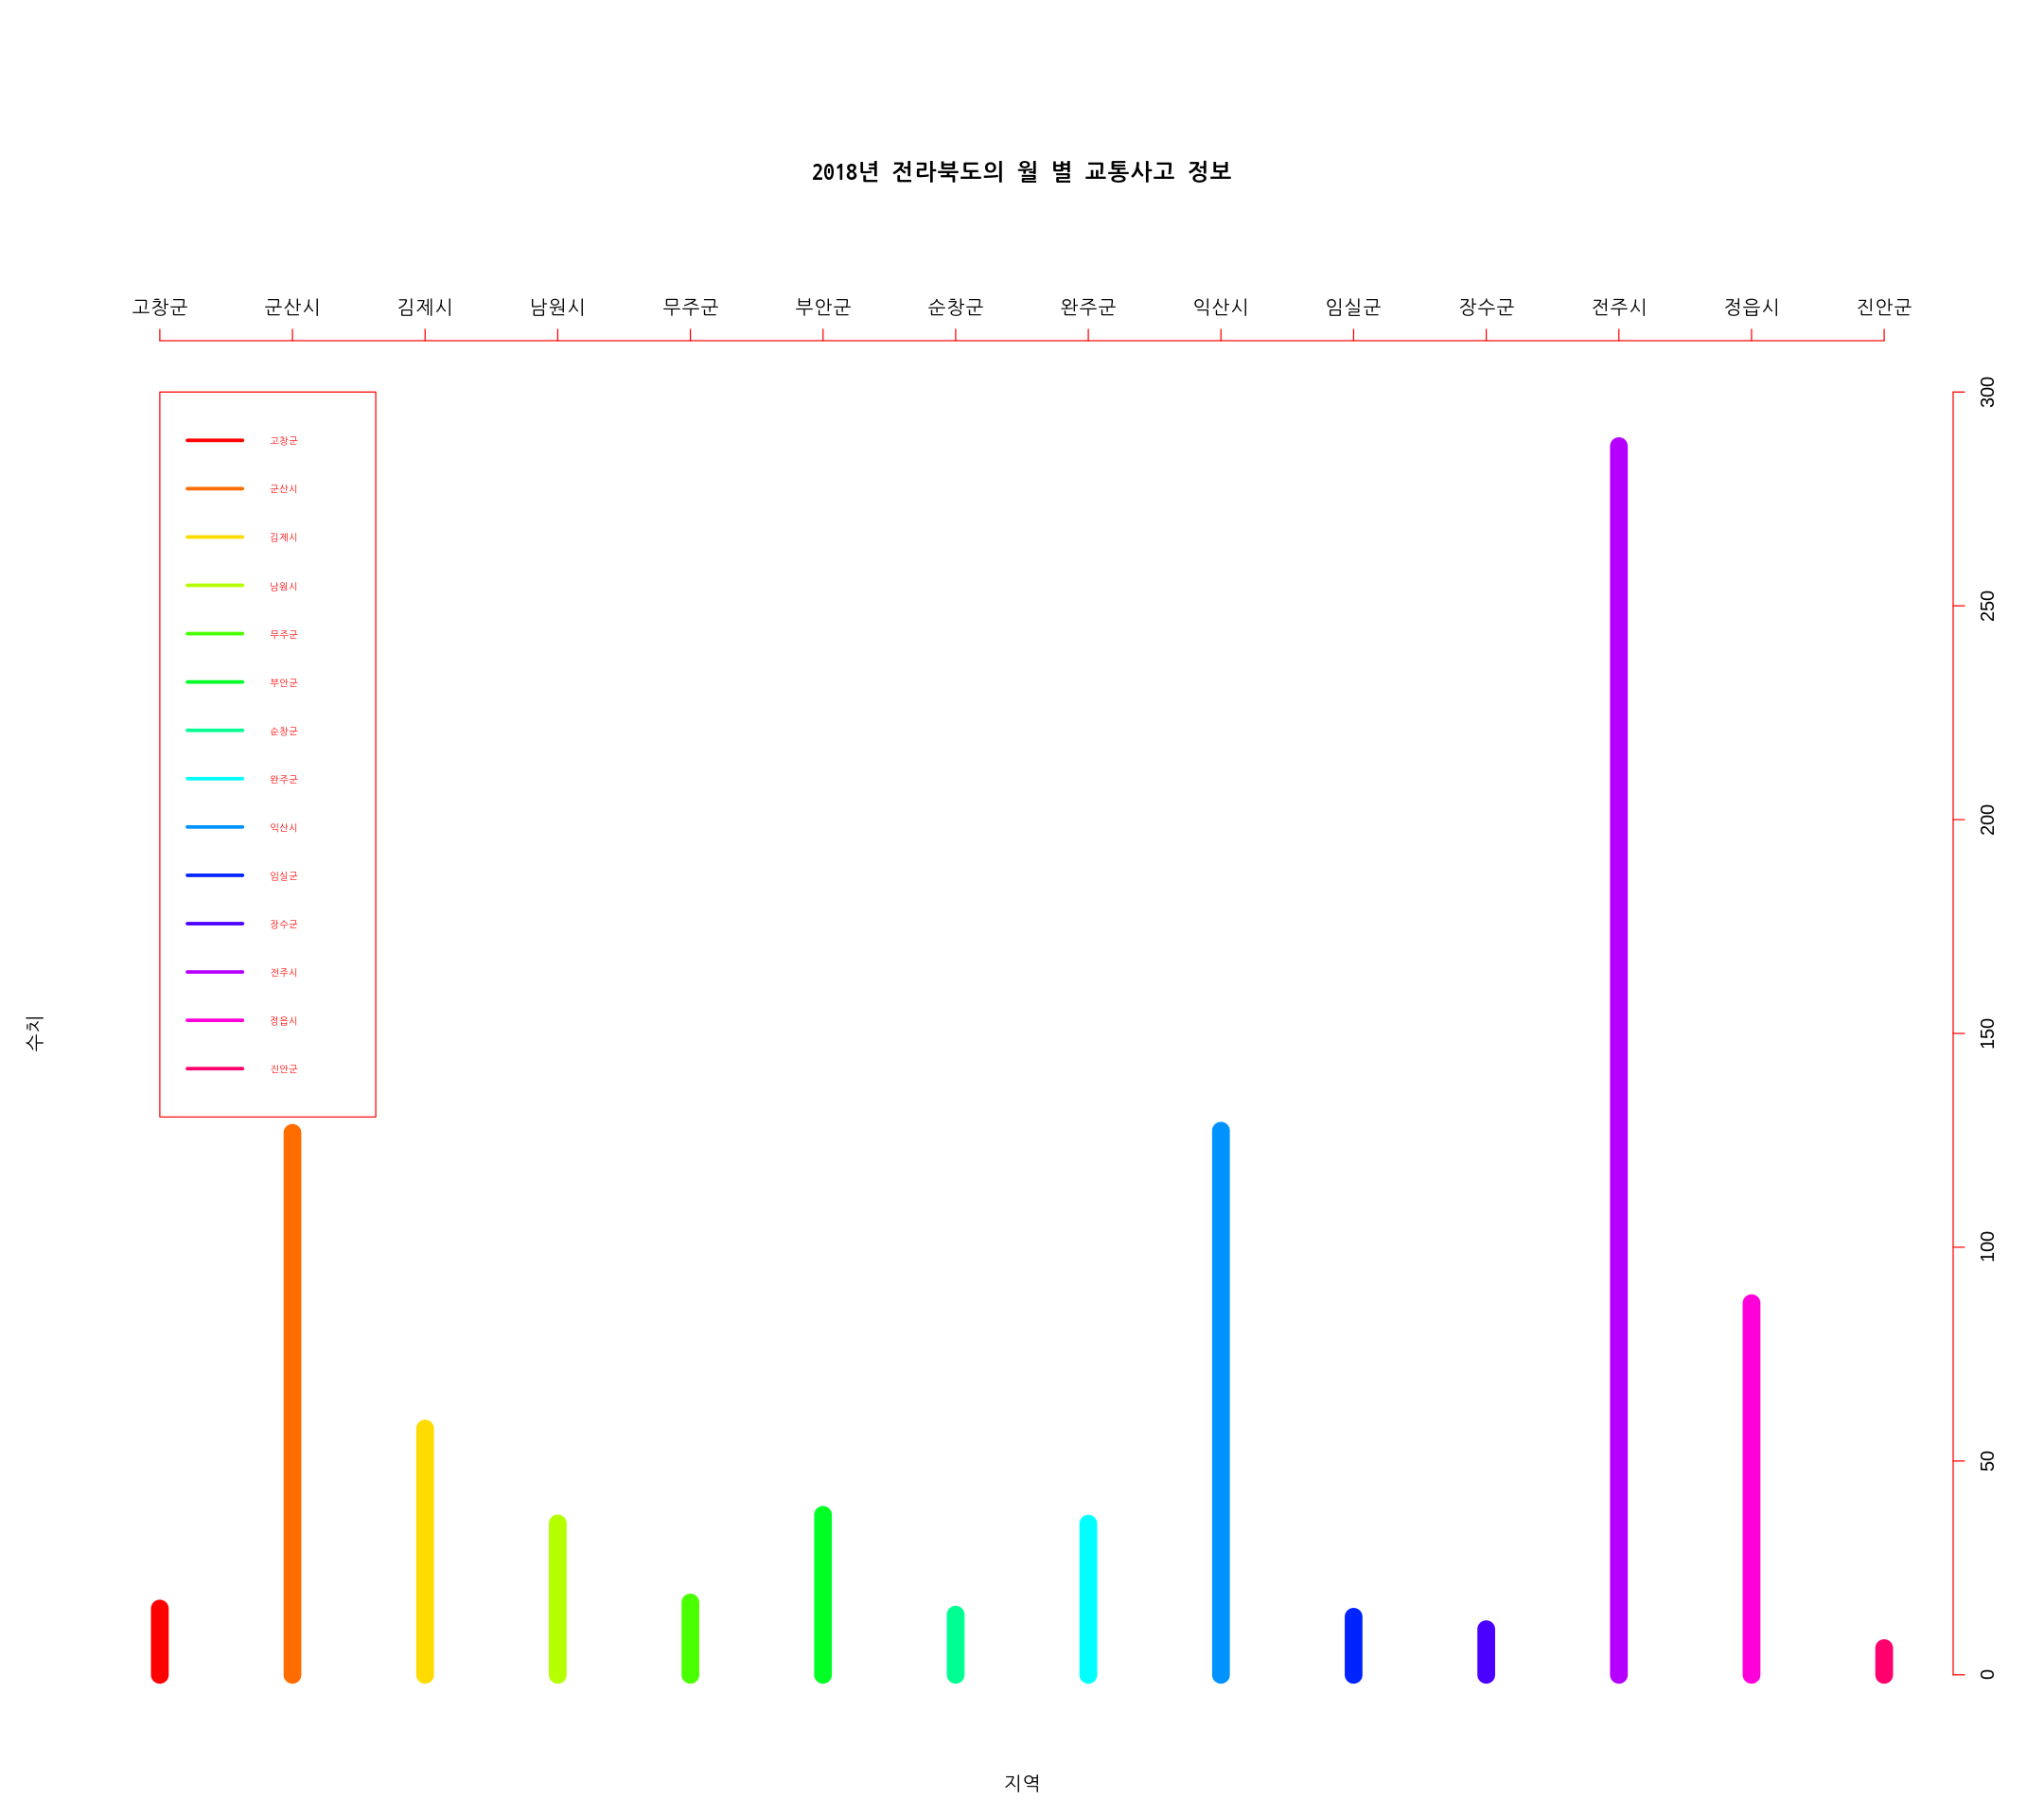

In [110]:
options(repr.plot.width=18, repr.plot.height=16)

par(bg = 'white', bty = 'n', fg = 'red', mar = c(4,4,15,4), mgp = c(2,1,0))
plot(df3$평균부상자수, type = 'h', col = rainbow(14), axes=F, ann = T, ylim = c(0, 300), lwd = 15, xlab = "지역", ylab = "수치")
title ("2018년 전라북도의 월 별 교통사고 정보")
axis(3, at = 1:14, labels = df3$시군구)
axis(4, at = c(0, 50, 100, 150, 200, 250, 300))
legend(1 ,300, cex = 0.5, unique(df3$시군구), col = rainbow(14), lty = 1, lwd=3)

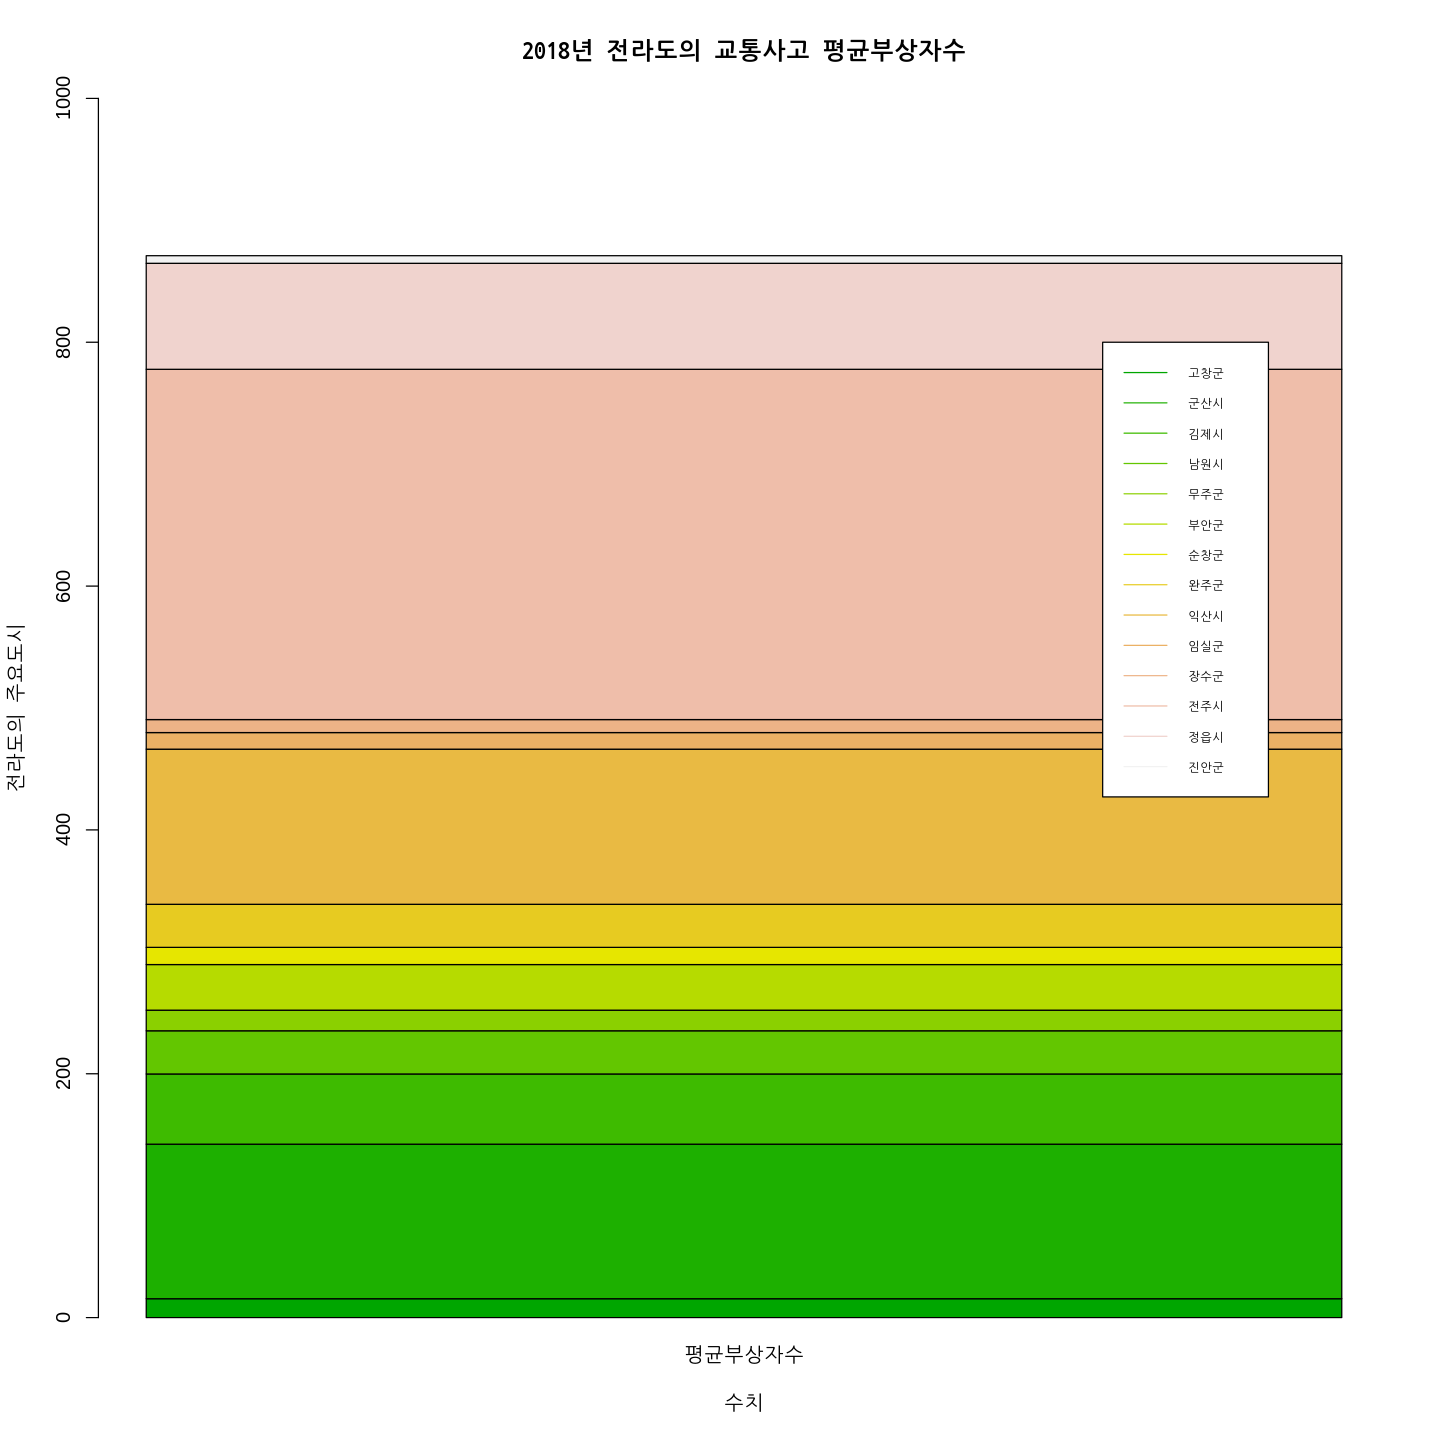

In [85]:
options(repr.plot.width=12, repr.plot.height=12)

mdf2 <- as.matrix(df3[-1])
barplot(mdf2, col = terrain.colors(14), ylim = c(0,1000))
title(main = "2018년 전라도의 교통사고 평균부상자수", xlab = "수치", ylab = "전라도의 주요도시")
legend(1 , 800, cex = 0.6, unique(df3$시군구), col = terrain.colors(14), lty = 1, lwd=1)

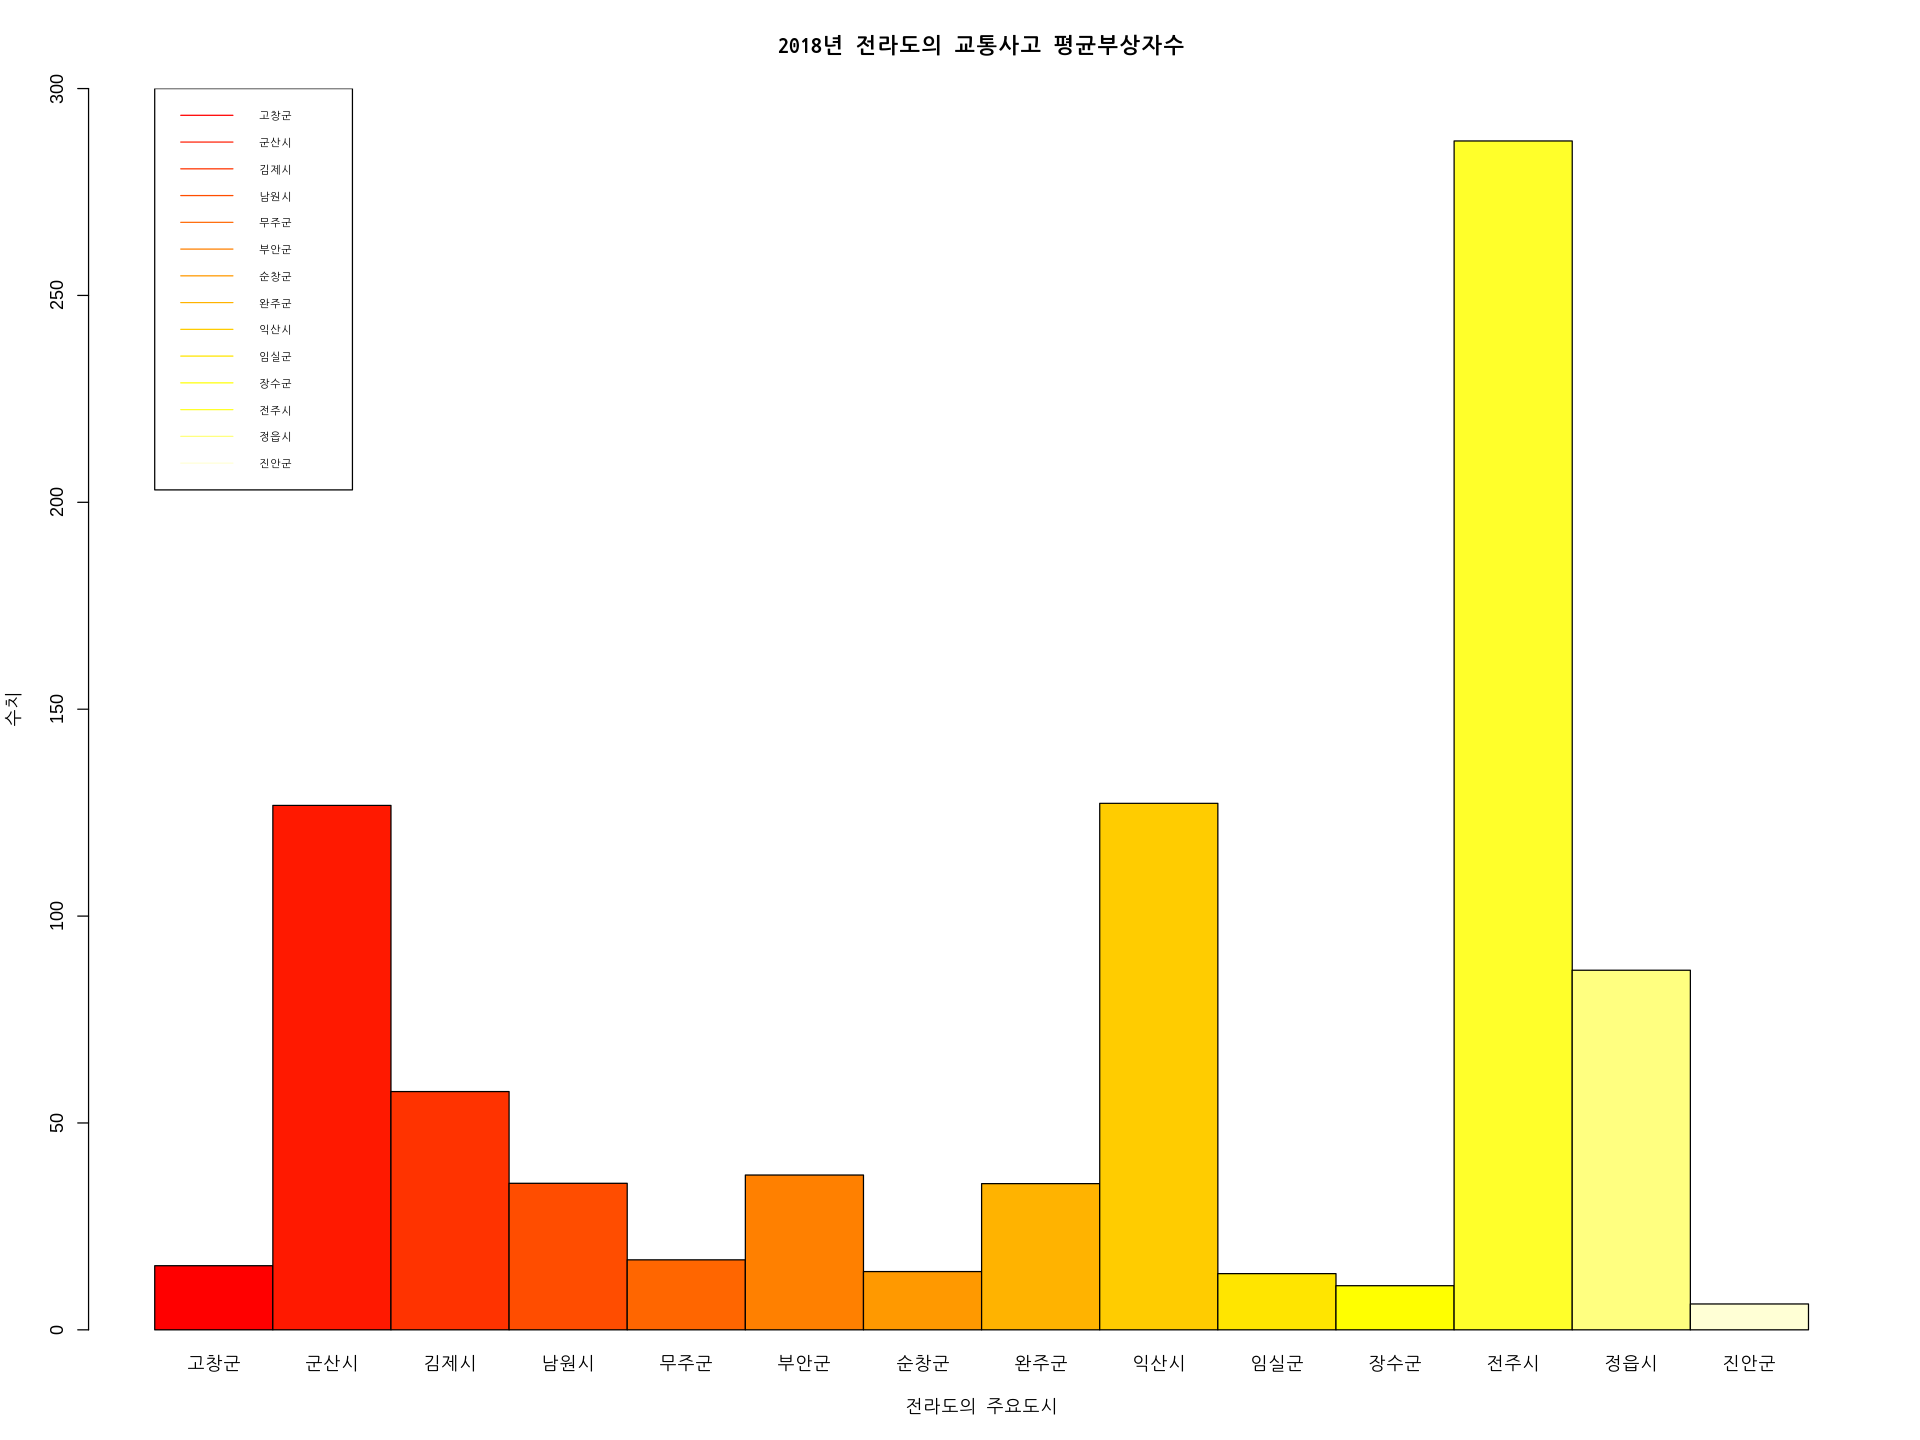

In [86]:
mdf2 <- as.matrix(df3[-1])

options(repr.plot.width=16, repr.plot.height=12)

par(cex = 0.9)
barplot(mdf2, beside =T, col = heat.colors(14), ylim = c(0,300), names.arg = df3$시군구)
title(main = "2018년 전라도의 교통사고 평균부상자수", xlab = "전라도의 주요도시", ylab = "수치")
legend(1 ,300, cex = 0.6, unique(df3$시군구), col = heat.colors(14), lty = 1, lwd=1)

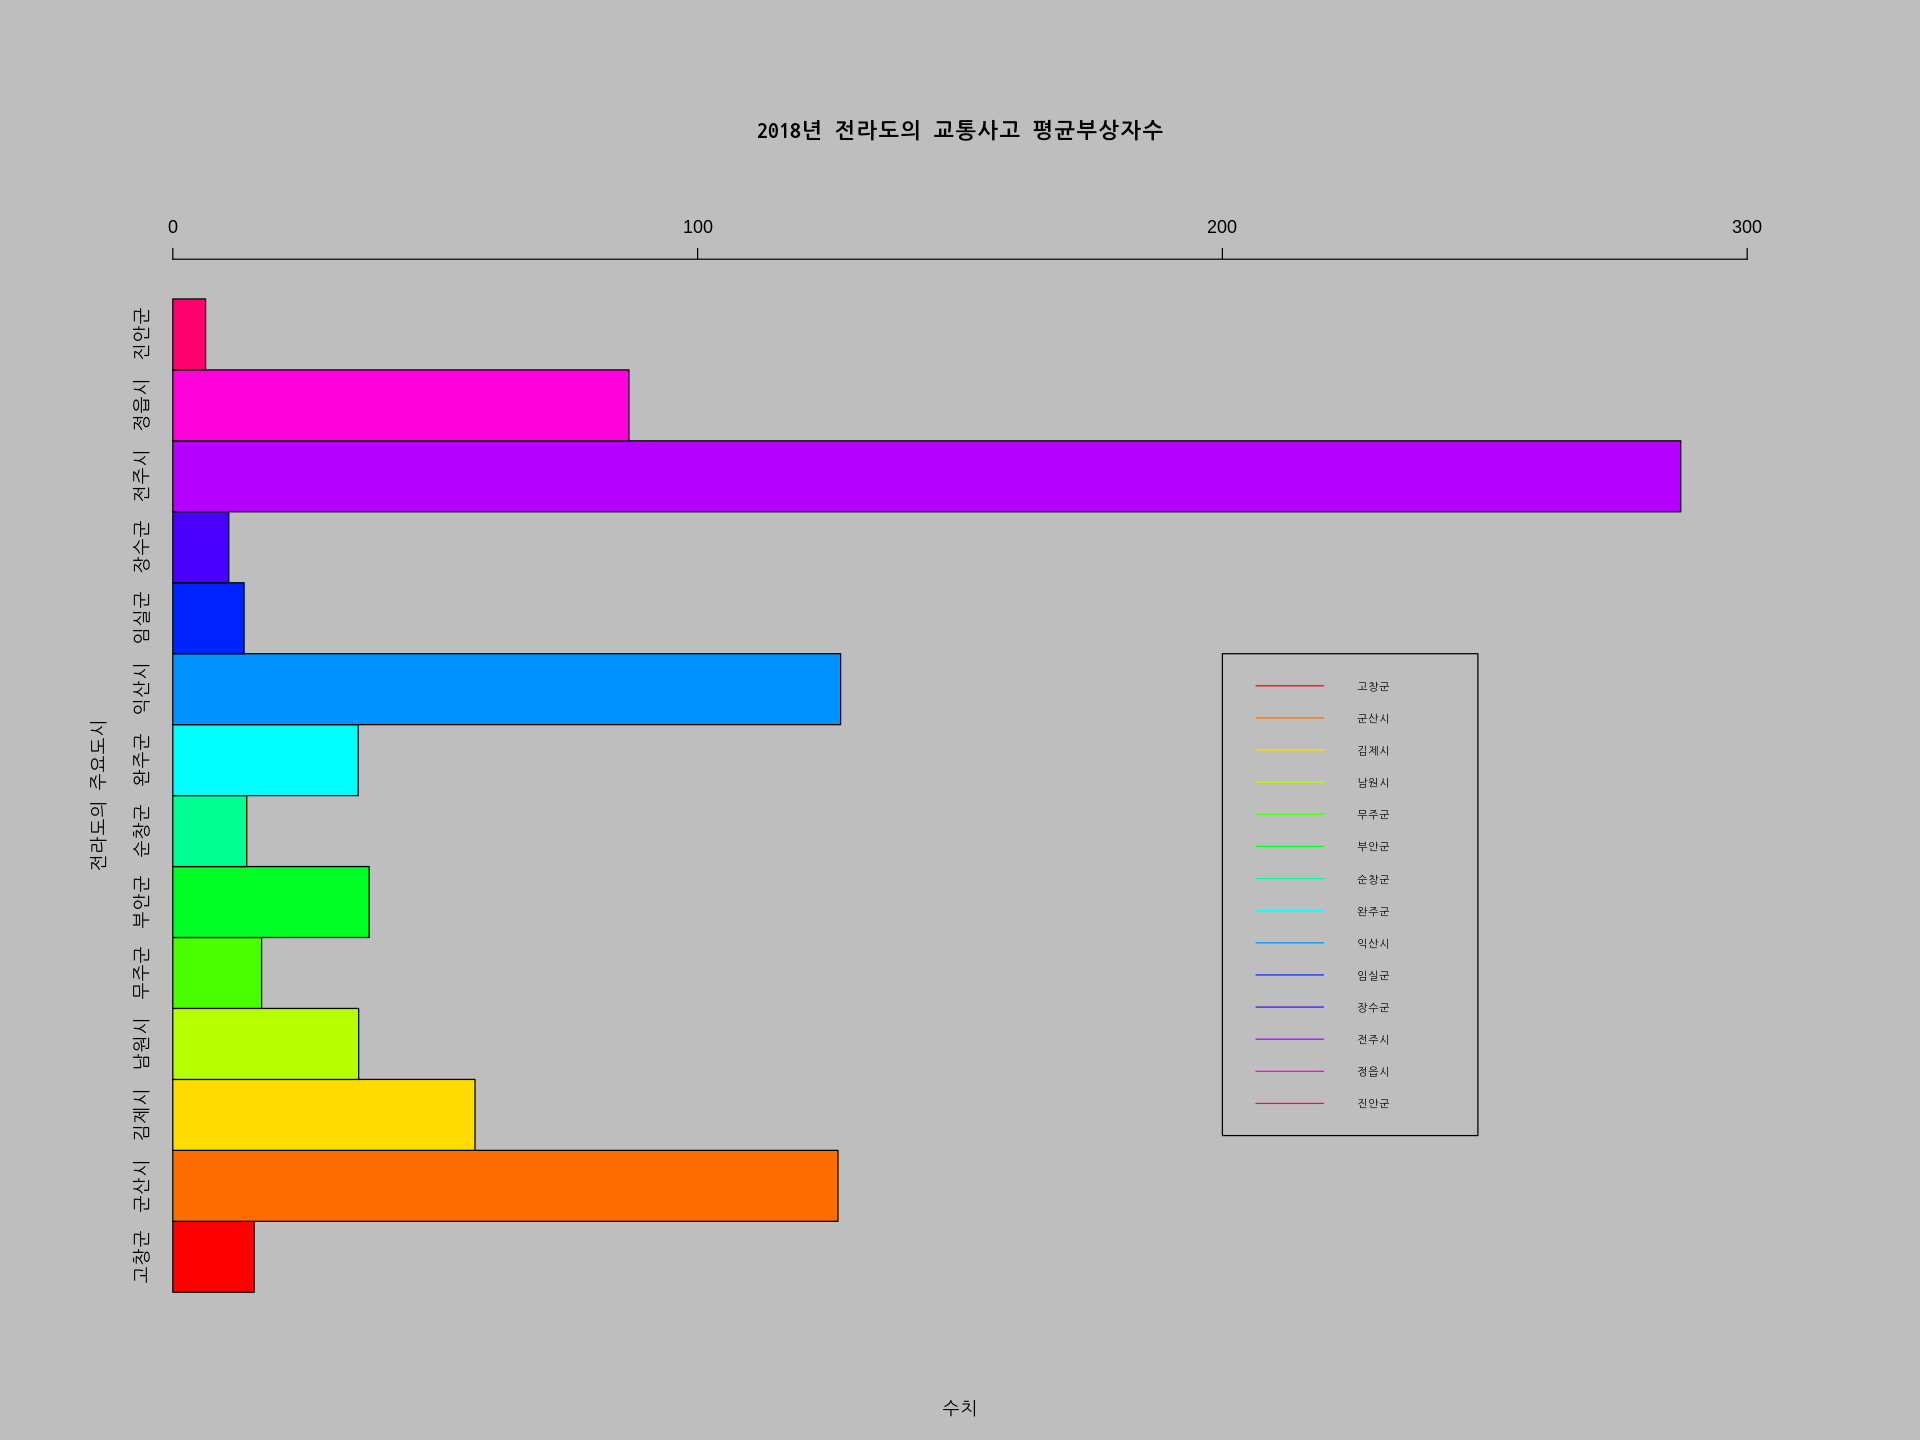

In [111]:
options(repr.plot.width=16, repr.plot.height=12)

mdf2 <- as.matrix(df3[-1])
par(cex = 0.9, bg = 'gray', mar = c(5, 8, 12, 8))

barplot(mdf2, beside =T, horiz = T, axes = F, col = rainbow(14), xlim = c(0,300), names.arg = df3$시군구, mgp = c(2,1,4))
title(main = "2018년 전라도의 교통사고 평균부상자수", ylab = "전라도의 주요도시", xlab = "수치")
axis(3, at = c(0,100,200,300))
legend(200 , 10, cex = 0.6, unique(df3$시군구), col = rainbow(14), lty = 1, lwd=1)

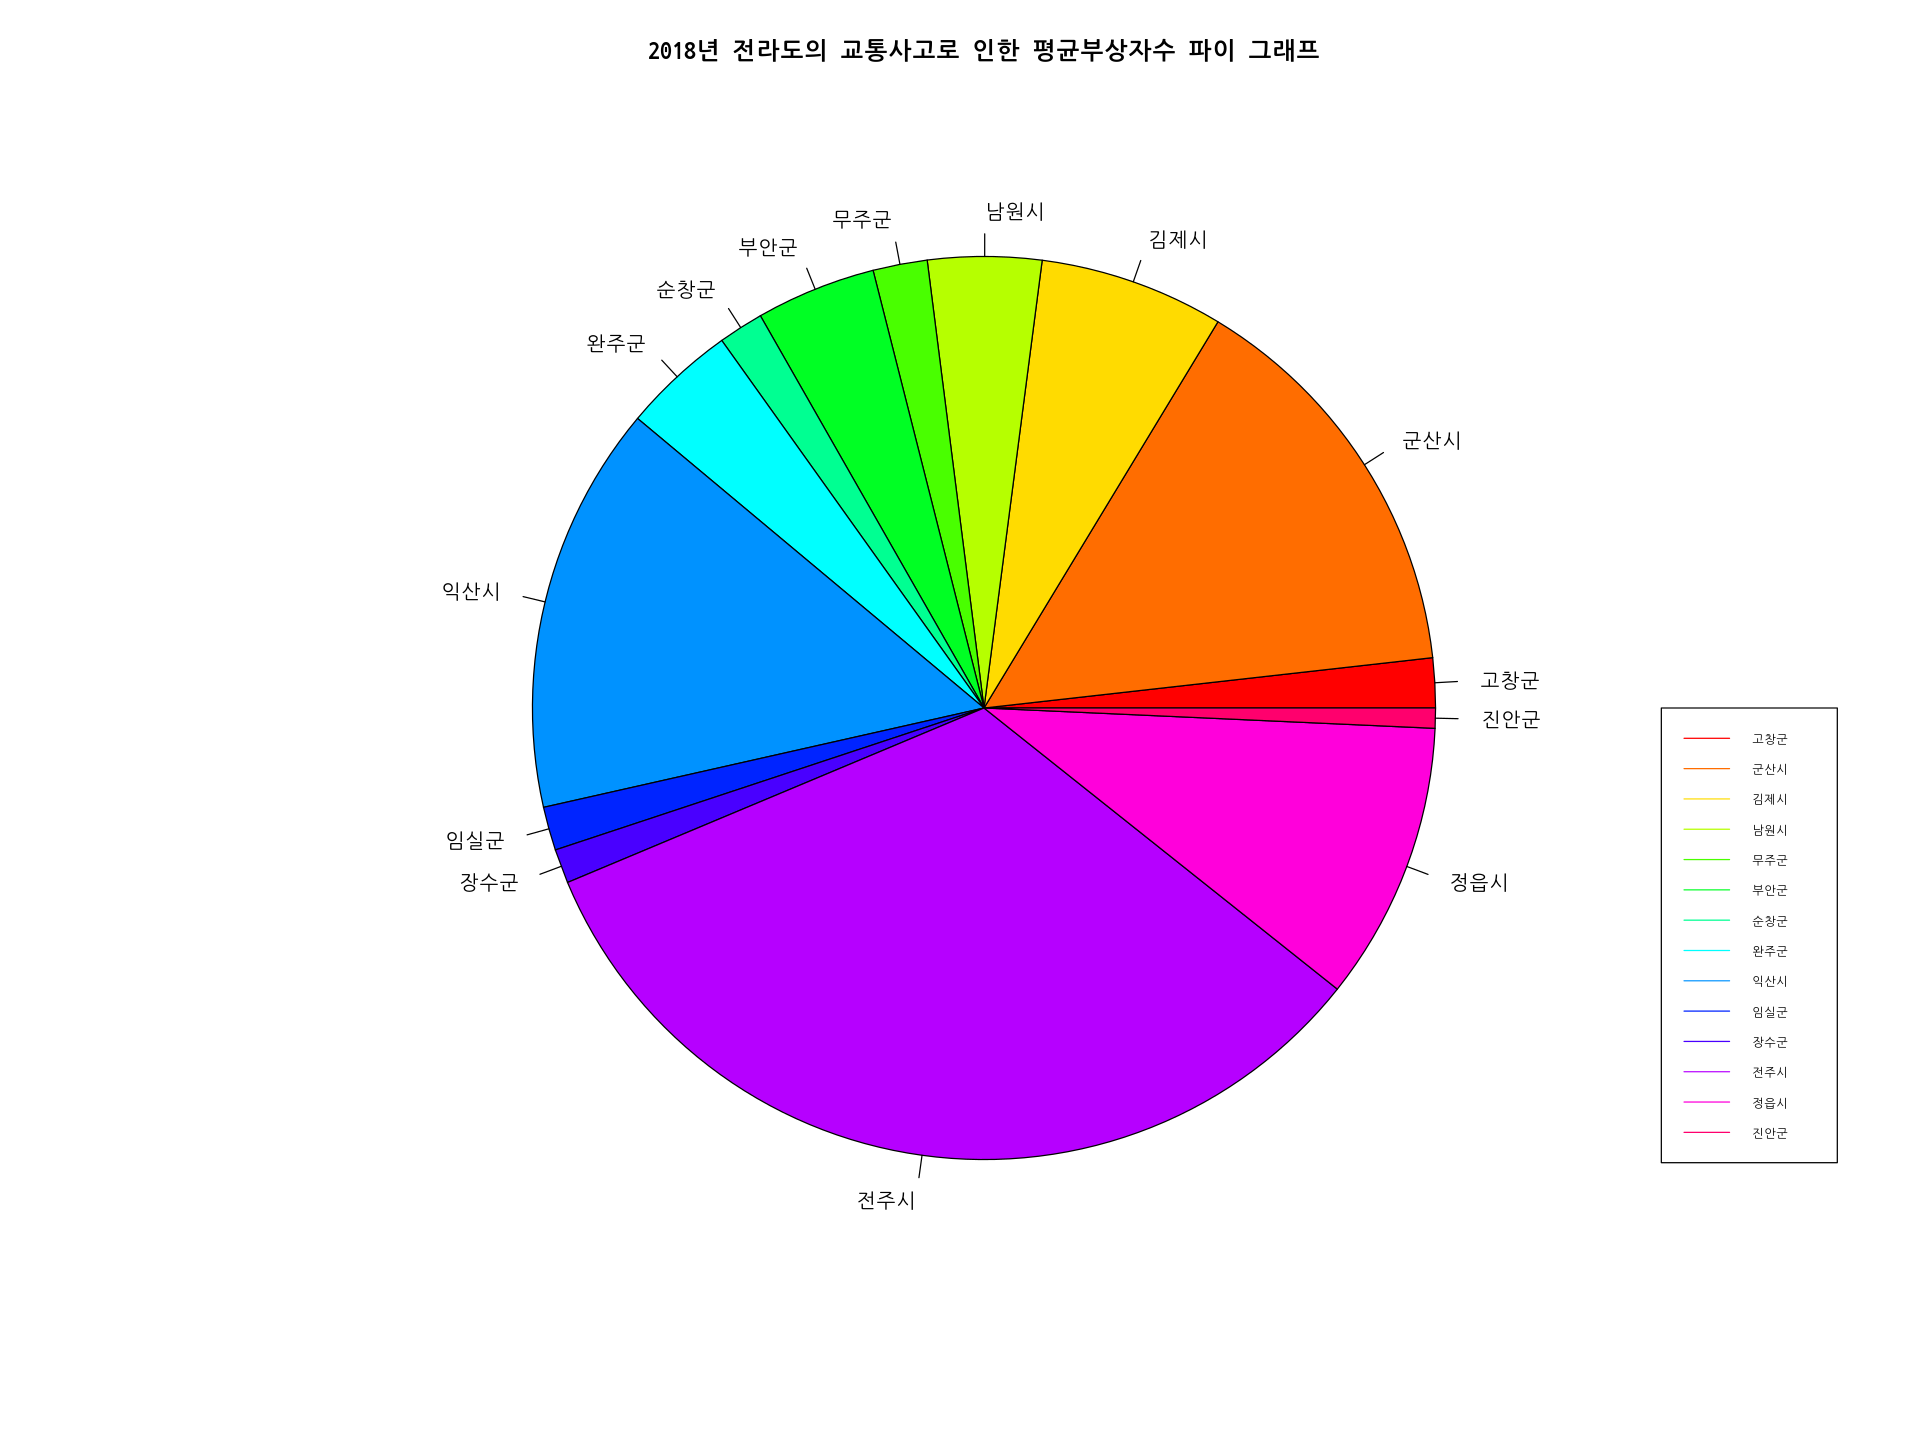

In [88]:
pie(df3$평균부상자수, labels = unique(df3$시군구), col = rainbow(14), main = "2018년 전라도의 교통사고로 인한 평균부상자수 파이 그래프")
legend(1.2 , 0, cex = 0.6, unique(df3$시군구), col = rainbow(14), lty = 1, lwd=1)

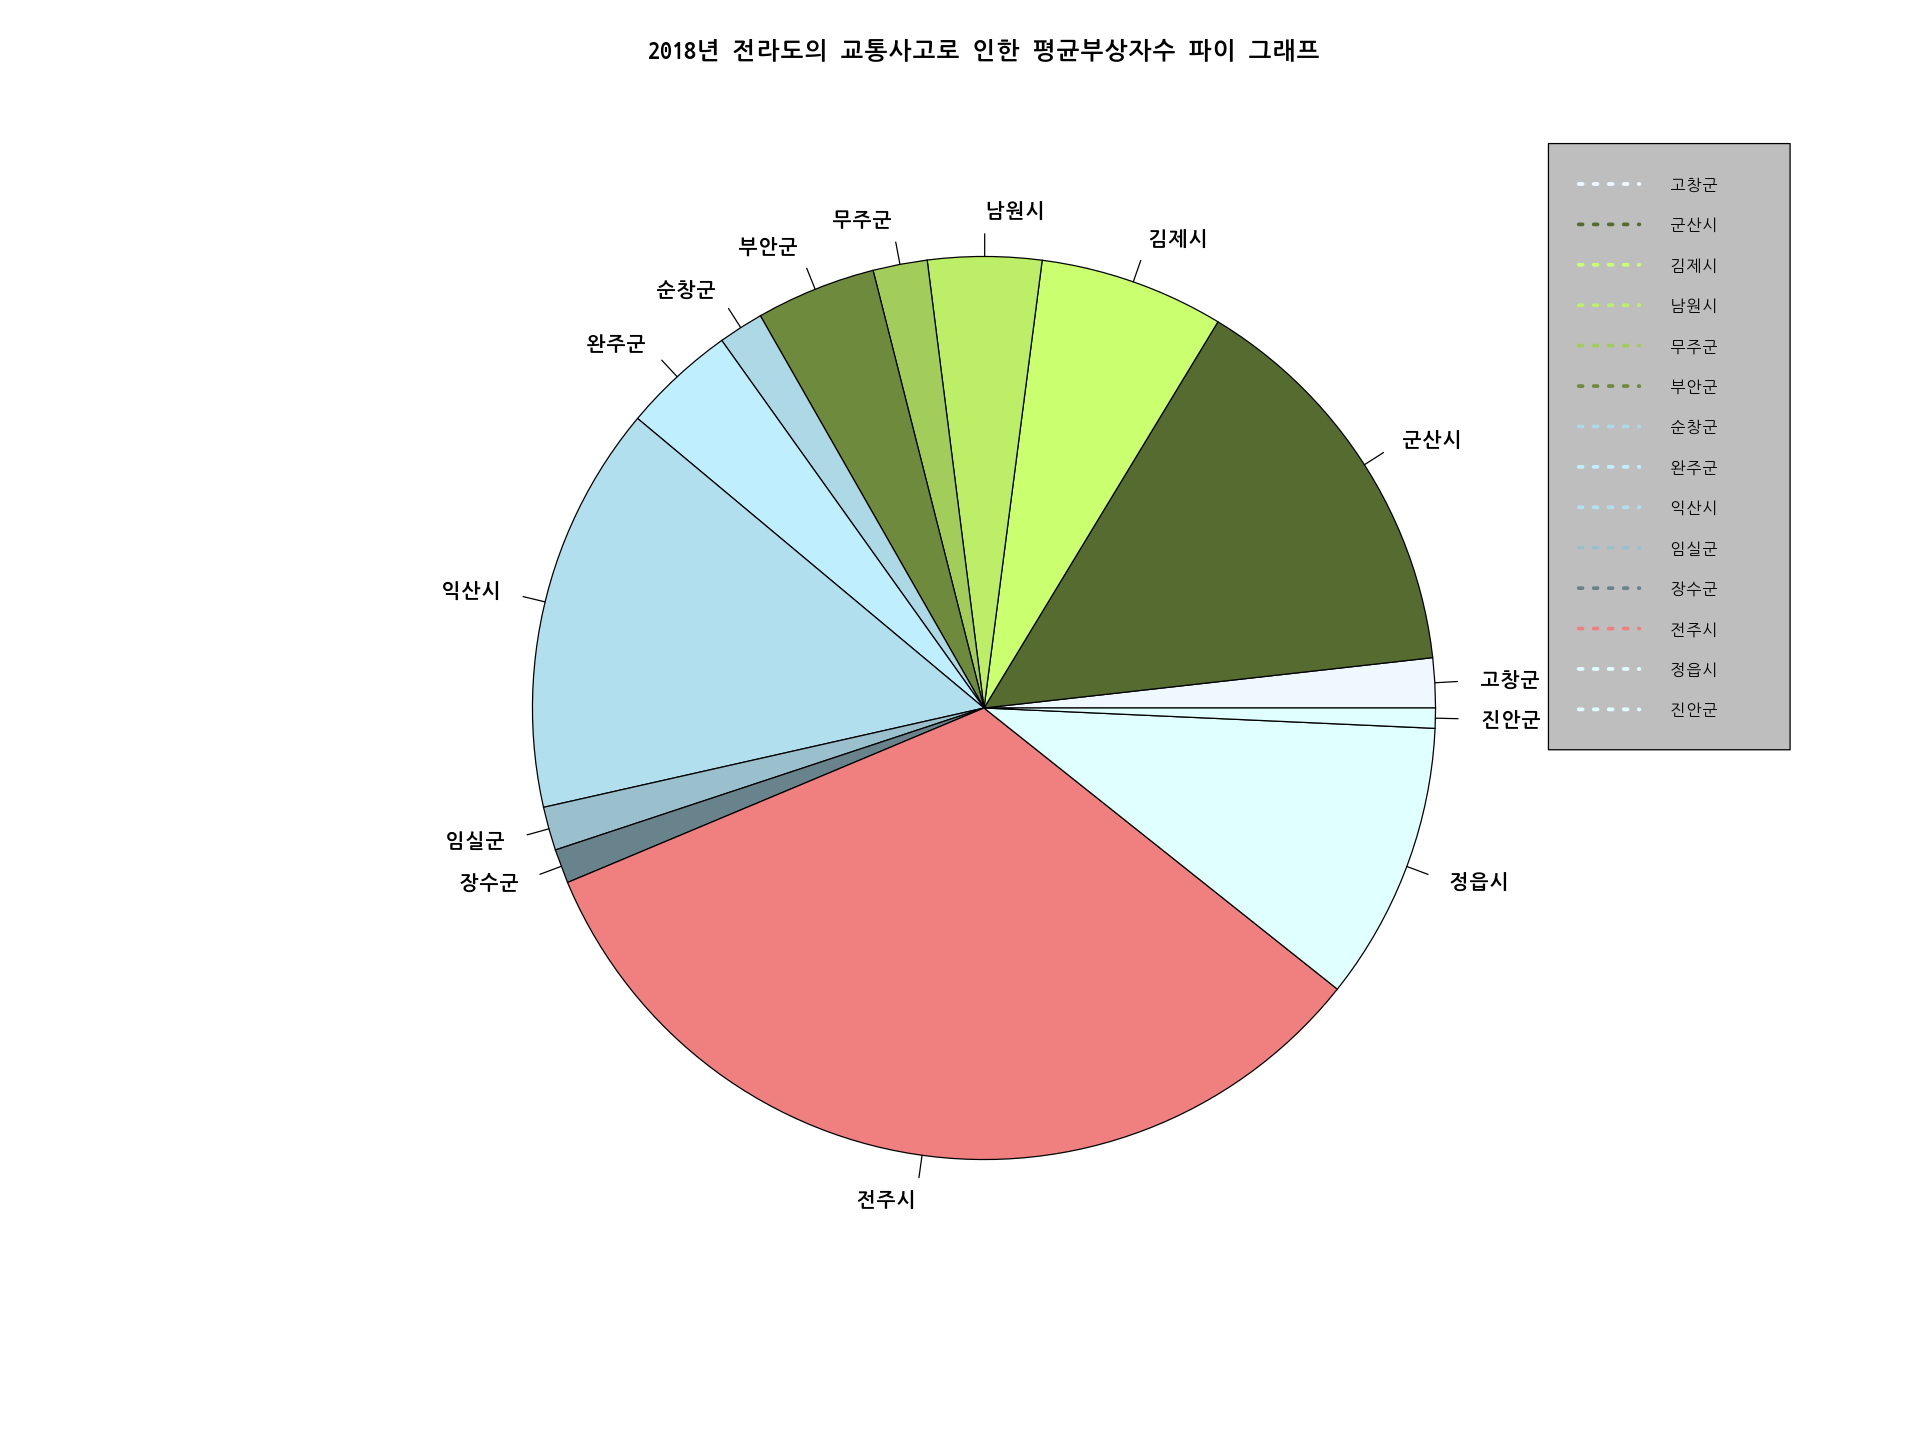

In [89]:
li <- grep('li', colors(), value= T)

pie(df3$평균부상자수, labels = unique(df3$시군구), col = li[1:14], main = "2018년 전라도의 교통사고로 인한 평균부상자수 파이 그래프", font = 2)
legend(1 , 1, cex = 0.8, unique(df3$시군구), col = li[1:14], lty = 3, lwd=3, bg = 'gray')

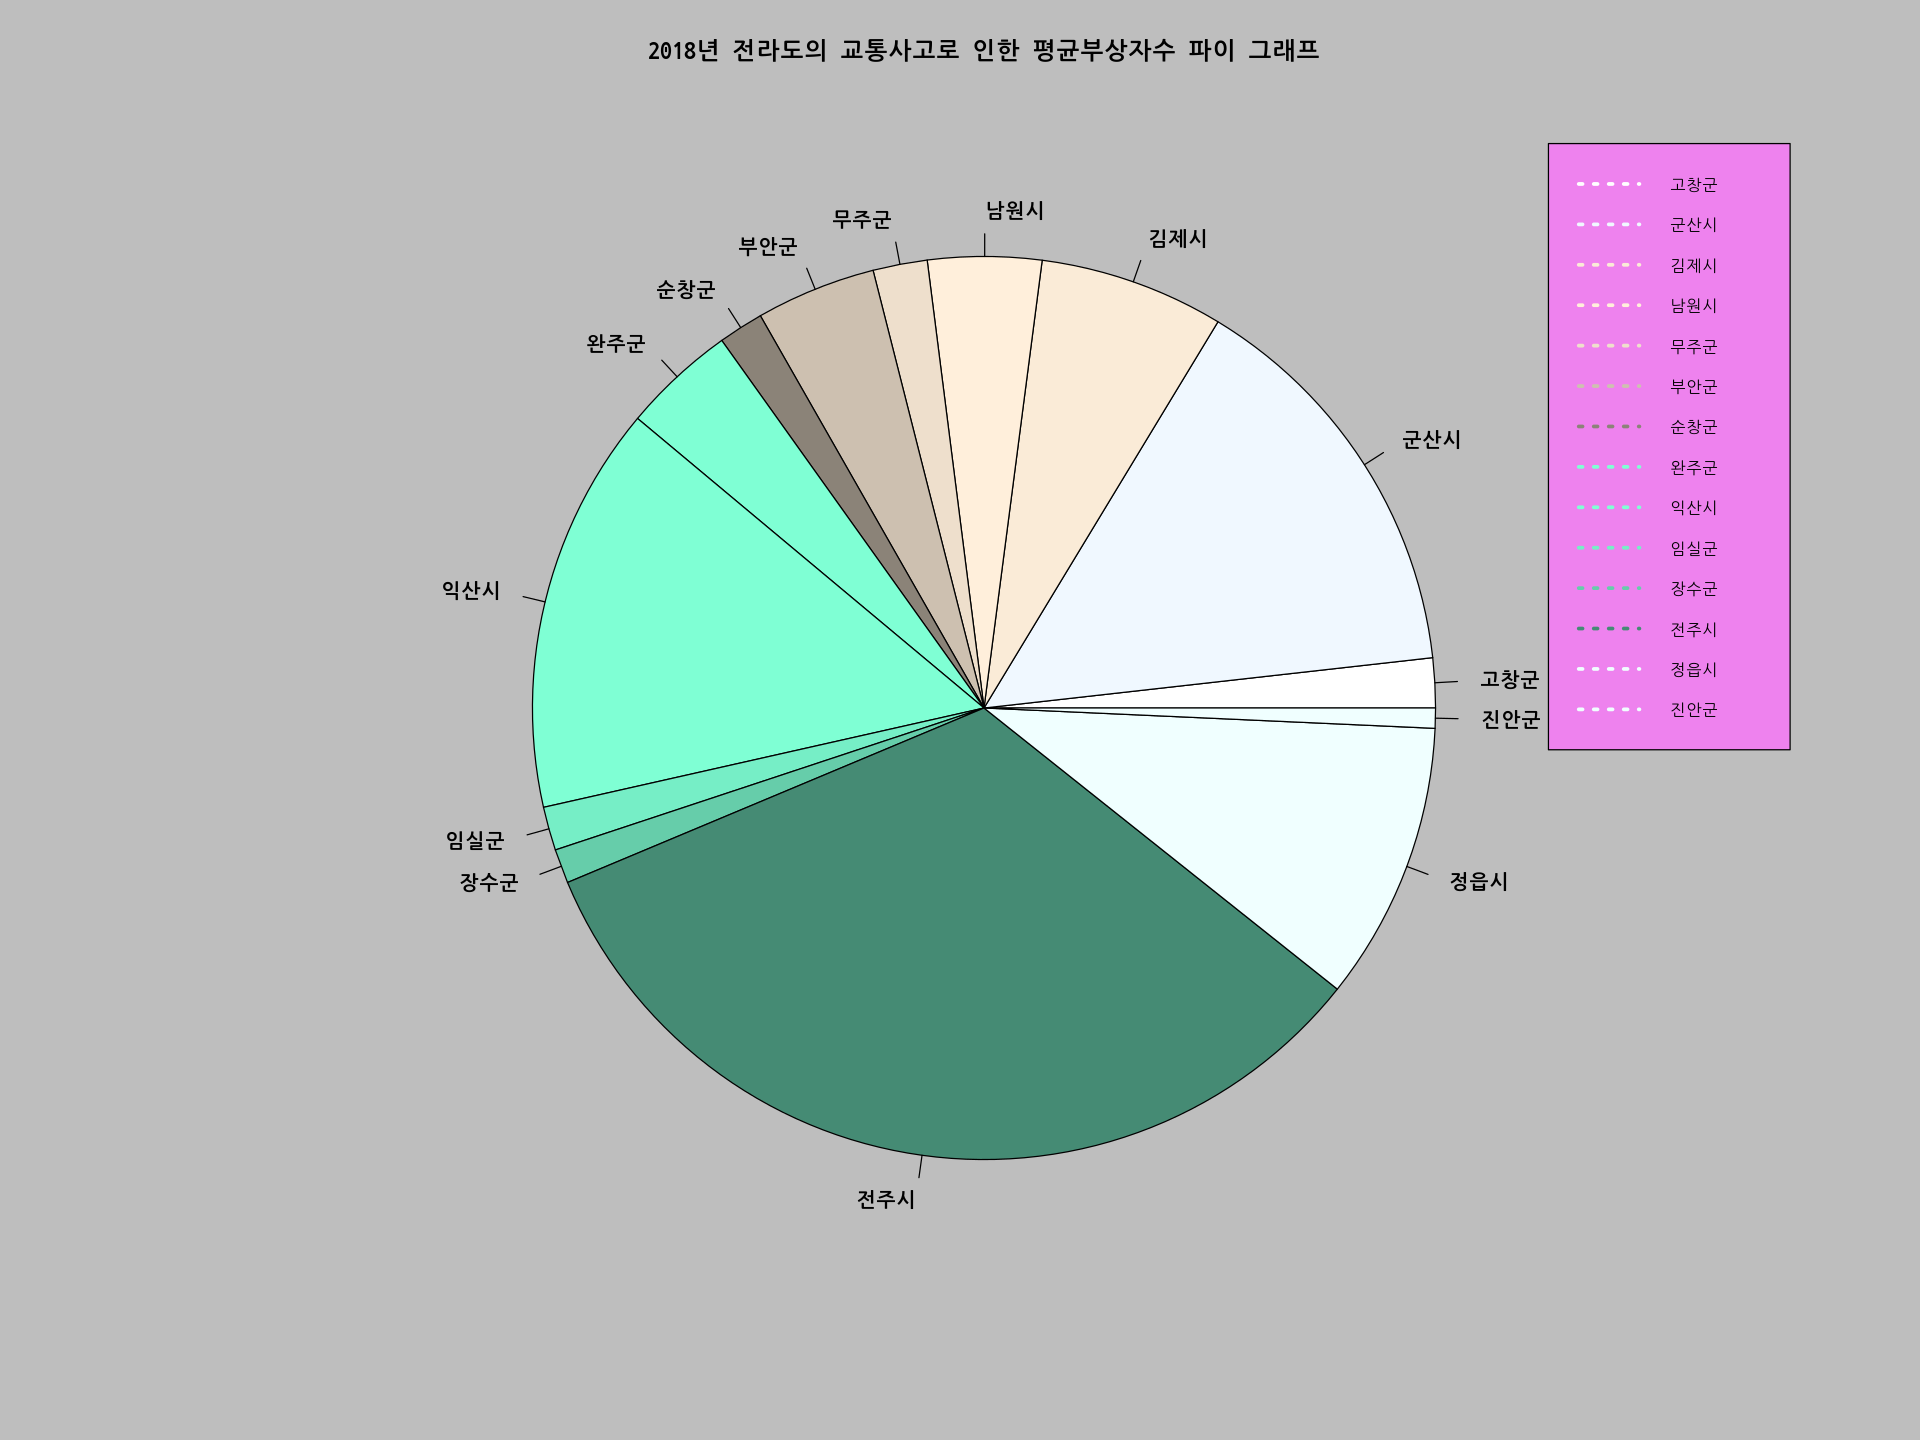

In [90]:
ex <- grep('e', colors(), value= T)

par(bg = 'gray')
pie(df3$평균부상자수, labels = unique(df3$시군구), col = ex[1:14], main = "2018년 전라도의 교통사고로 인한 평균부상자수 파이 그래프", font = 2)
legend(1 , 1, cex = 0.8, unique(df3$시군구), col = ex[1:14], lty = 3, lwd=3, bg = 'violet')